In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import plotly.graph_objects as go
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from time import process_time 
from src.FunctionsProperties import *
import statsmodels.api as sm
mpl.rcParams['axes.linewidth'] = 1.4 #set the value globally

In [2]:
make_results_folders()

In [3]:
df = pd.read_csv("../../data/all_data.txt", delimiter=" ")
df = df[df["alpha_g"]>=1.0]
df.to_csv("../../data/all_data.txt", index=False, sep=' ')
df.head()

N  dim  alpha_a  alpha_g  N_samples  short_mean  short_err  \
0  160000    1      1.5      2.0         32   17.016344   0.179353   
1  160000    1      1.2      2.0         22   15.856327   0.206126   
2  160000    1     11.0      2.0         13   22.203923   0.320422   
3  160000    1      2.0      4.0         14   18.810779   0.258948   
4  160000    1      2.0      1.0         13   20.459969   0.803095   

   short_err_per  diameter_mean  diameter_err  diameter_err_per  \
0       1.054003      43.781250      0.538319          1.229565   
1       1.299964      41.681818      0.589909          1.415268   
2       1.443088      54.076923      2.525413          4.670039   
3       1.376592      47.428571      0.816817          1.722204   
4       3.925202      51.384615      1.806464          3.515574   

   ass_coeff_mean  ass_coeff_err  ass_coeff_err_per  
0       -0.024530       0.000853           3.476212  
1       -0.035214       0.001480           4.203271  
2        0.060780       0.000569           0.936218  
3       -0.010559       0.000919           8.701416  
4       -0.011740       0.001629          13.872442

In [4]:
N = [5000, 10000, 20000, 40000, 80000, 100000, 160000, 320000]
dim = [1,2,3,4]
alpha_filter = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
parameters_calculate(df, N, dim, alpha_filter)

## CALCULATE THE PROPERTIES AS FUNCTION $\alpha_G$ FOR MULTIPLIES $N$

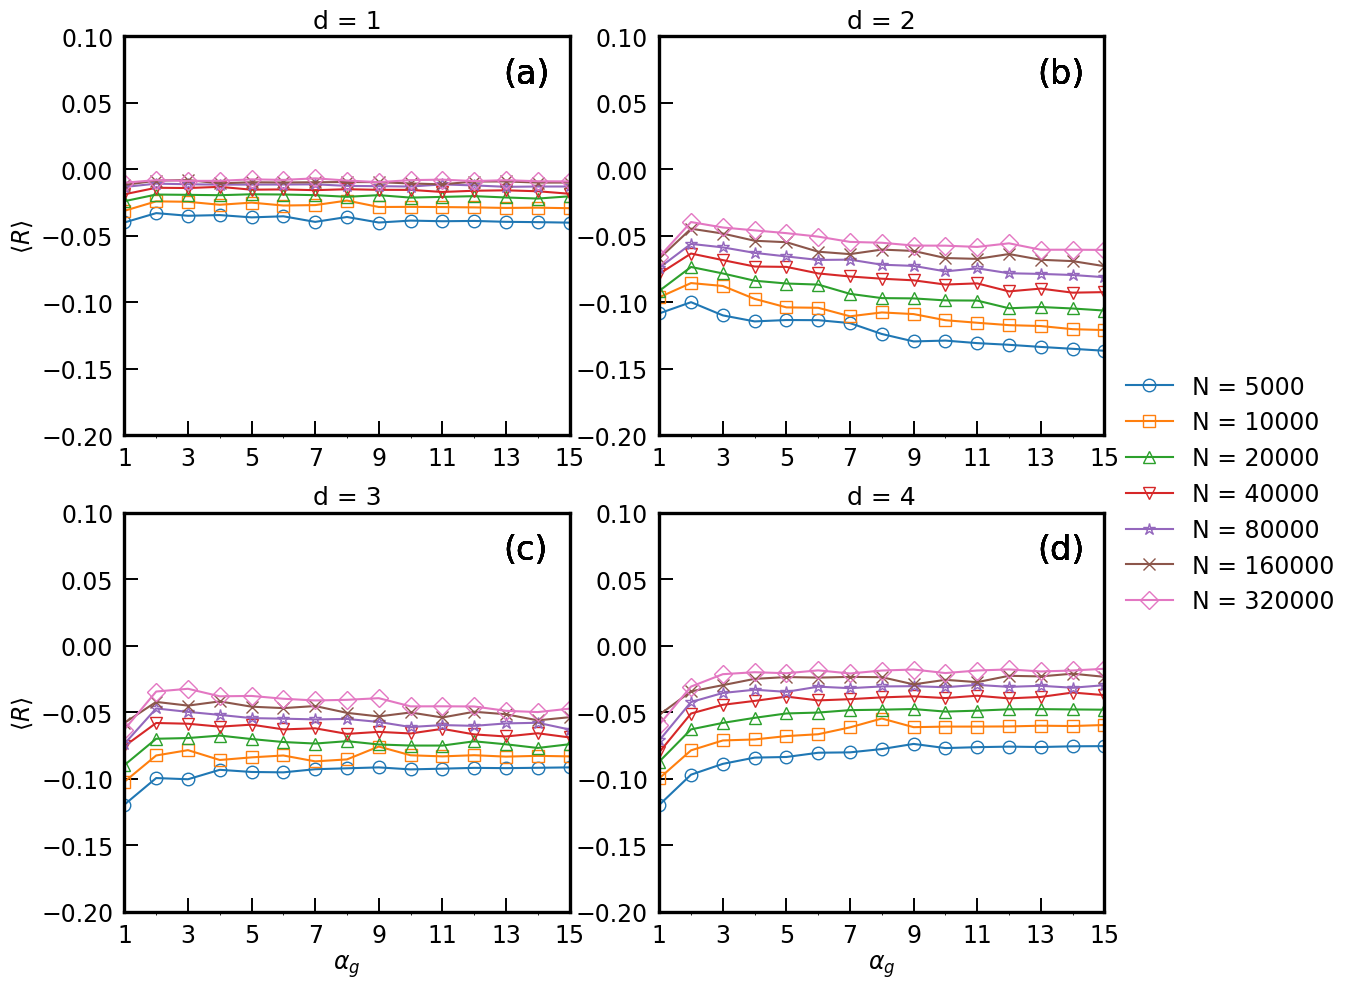

In [5]:
#R/LOG(N) VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 9
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]

colors = ['#1f77b4',  # Azul
         '#ff7f0e',  # Laranja
         '#2ca02c',  # Verde
         '#d62728',  # Vermelho
         '#9467bd',  # Roxo
         '#8c564b',  # Marrom
         '#e377c2']  # Rosa

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
]

lab = ["(a)", "(b)", "(c)", "(d)"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        # ax.plot(df_ord['alpha_g'], df_ord['ass_coeff_mean']/np.log(N[i]), linestyle='-', marker=markers[i],
        #         label=labels[i], markersize=markersize, markerfacecolor='none')
        ax.plot(df_ord['alpha_g'], df_ord['ass_coeff_mean'], linestyle='-', marker=markers[i],
                label=labels[i], markersize=markersize, markerfacecolor='none')
        ax.text(x=12.9, y=.065, s=lab[j], fontsize=24, color="black")
    j += 1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([-.2, 0.10])
    #ax.set_ylim([-.02, .02])
    #ax.set_yticks(np.linspace(-0.02, 0.02, 5))  # Apenas 5 ticks no eixo y
    ax.set_title(f"d = {dim}", fontsize=18)
    ax.tick_params('both', direction='in', width=1.4, length=10, labelsize=17, pad=8)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])
    fl = 17
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=fl)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=fl)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 17}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.85)

plt.savefig("R_alpha_g.pdf", dpi=300, bbox_inches="tight", pad_inches=0.5)


plt.show()


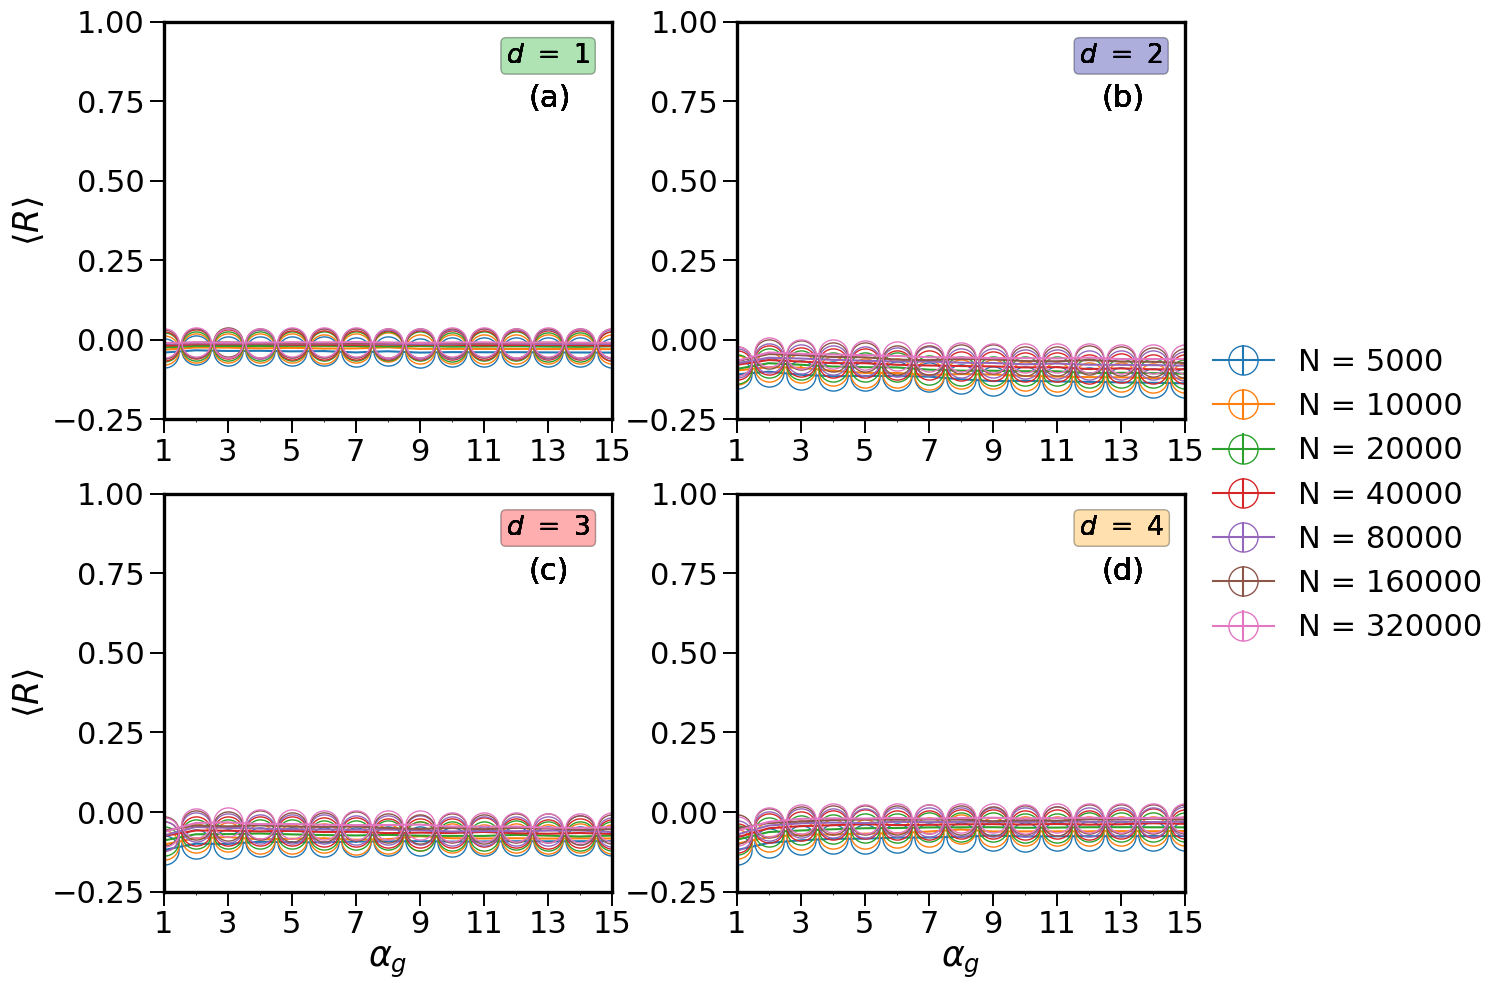

In [6]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_g'], df_ord['ass_coeff_mean'],
                    yerr=df_ord['ass_coeff_err'], linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=11.7, y=.87, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=12.4, y=.73, s=lab[j], fontsize=22, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([-.25, 1.0])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])
    fl = 20
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig("../../results/alpha_g/R_multi_N_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

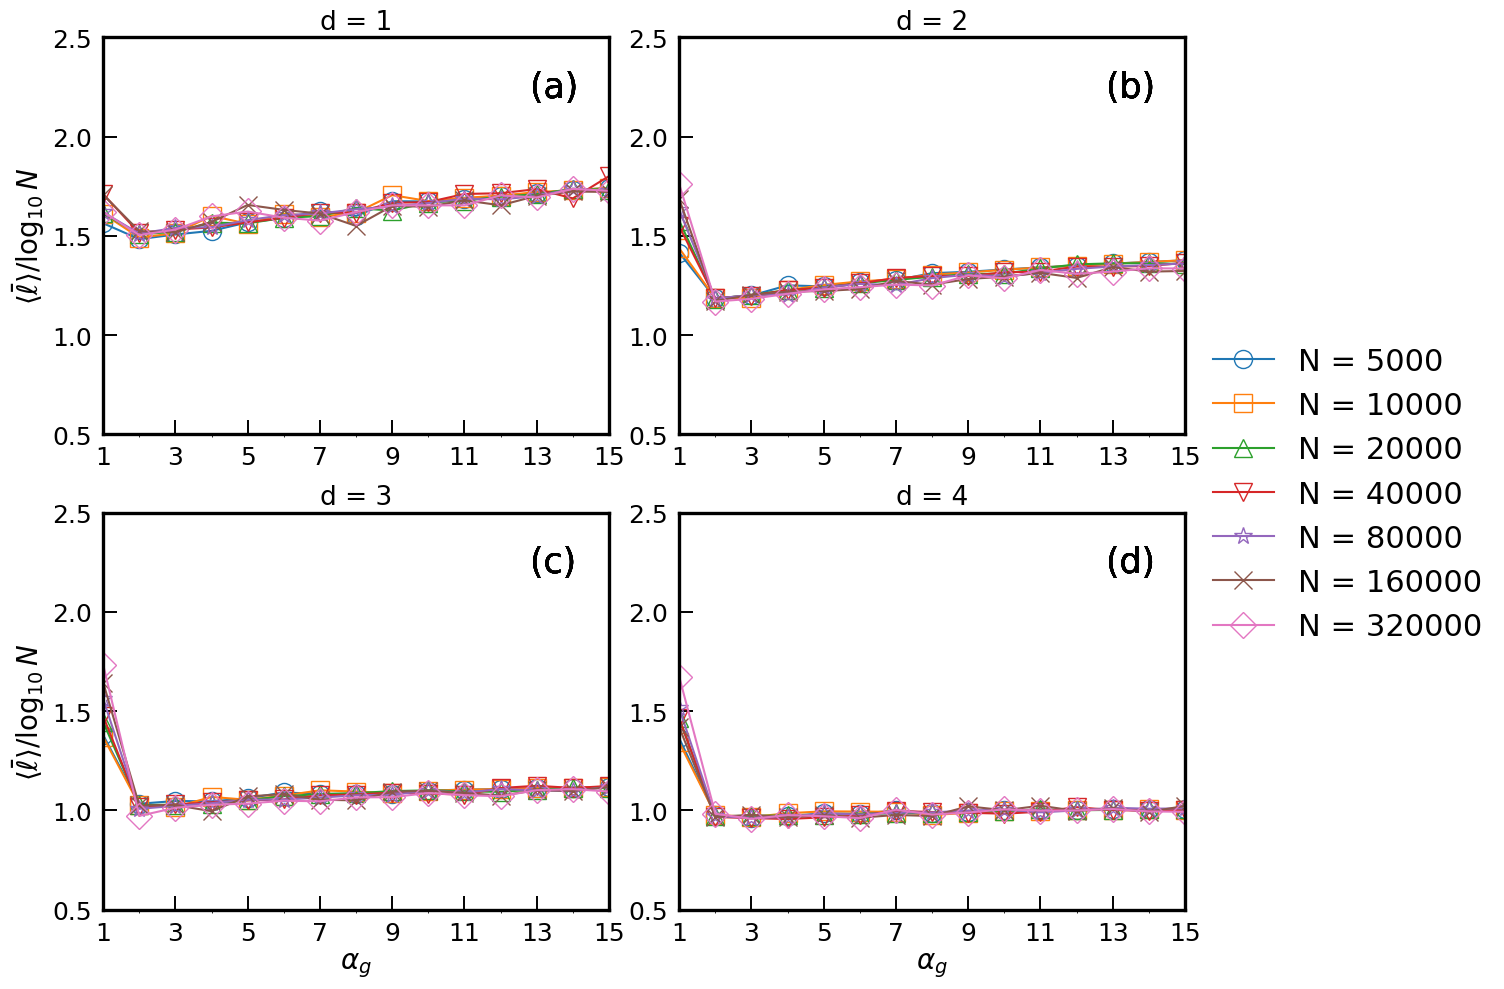

In [7]:
#SHORT/LOG(N) VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 13
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ['#1f77b4',  # Azul
         '#ff7f0e',  # Laranja
         '#2ca02c',  # Verde
         '#d62728',  # Vermelho
         '#9467bd',  # Roxo
         '#8c564b',  # Marrom
         '#e377c2']  # Rosa

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        # ax.errorbar(df_ord['alpha_g'], df_ord['short_mean']/np.log(N[i]),
        #             yerr=df_ord['short_err']/np.log(N[i]), linestyle='-', marker='o',
        #             label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.plot(df_ord['alpha_g'], df_ord['short_mean']/np.log(N[i]), linestyle='-', marker=markers[i],
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.text(x=12.2, y=4.5, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
         #       color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=12.8, y=2.2, s=lab[j], fontsize=25, color="black")
        
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([0.5, 2.5])
    ax.tick_params('both', width=1.4, length=10, labelsize=18, direction='in', pad= 8)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])
    ax.set_title(f"d = {dim}", fontsize=19)
    # Condições para exibir rótulos dos eixos em subplots específicos
    fl = 20
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=fl)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle / \log_{10}{N}$", size=fl)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_g/short_logN_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

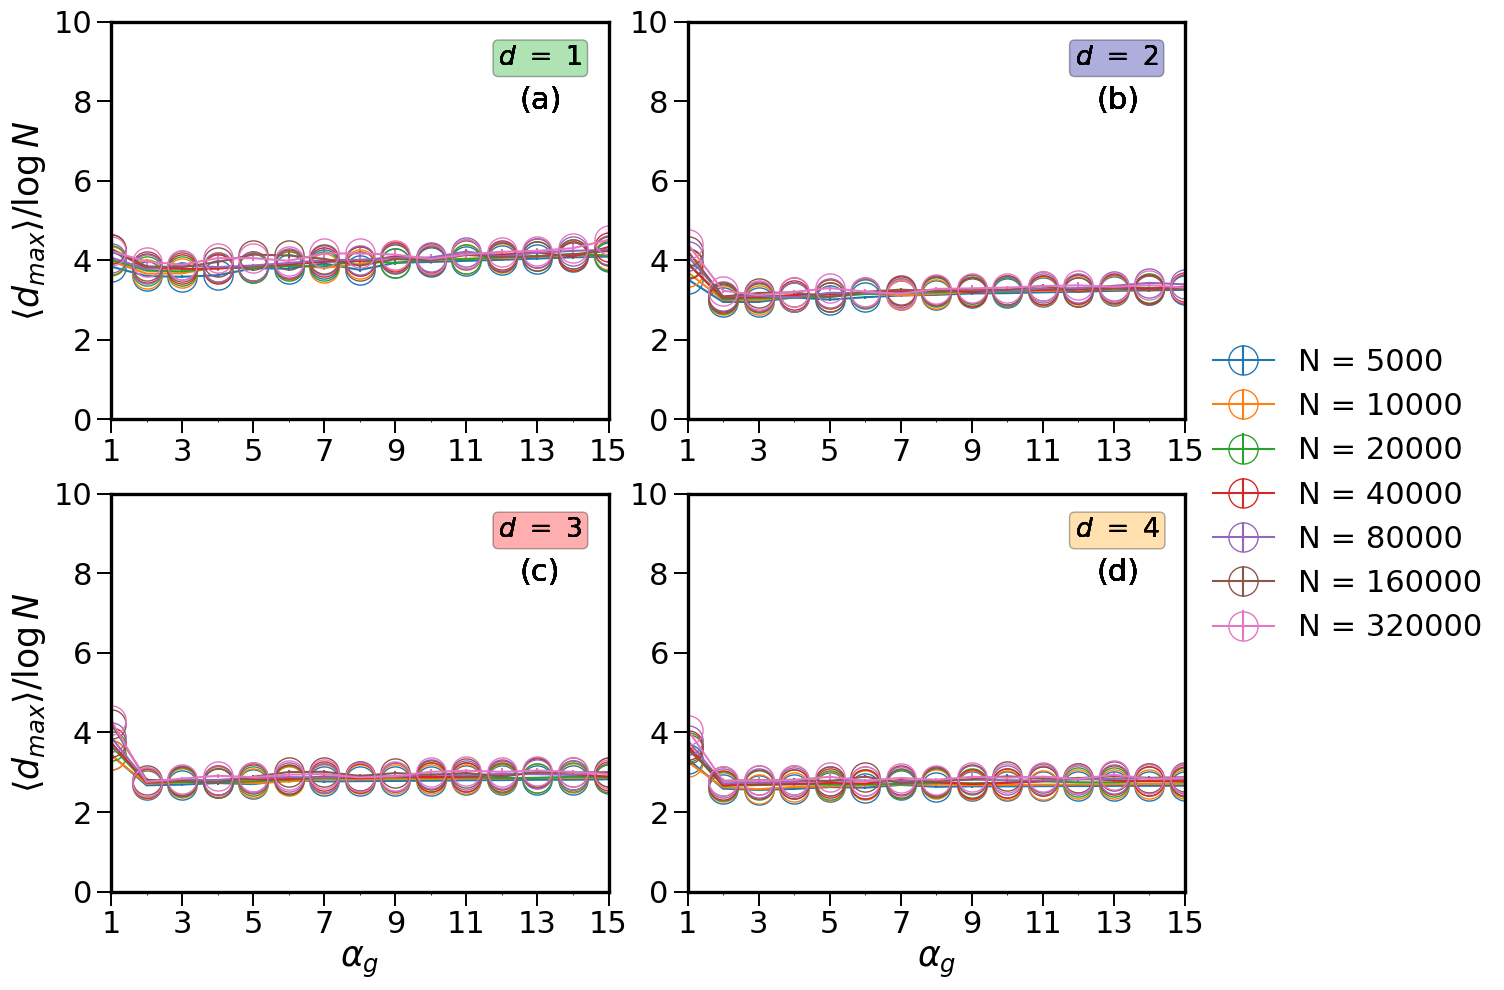

In [8]:
#DIAMETER/LOG(N) VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_g'], df_ord['diameter_mean']/np.log(N[i]),
                    yerr=df_ord['diameter_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=11.9, y=8.9, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=12.5, y=7.8, s=lab[j], fontsize=22, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([0, 10])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle / \log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig("../../results/alpha_g/diameter_logN_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

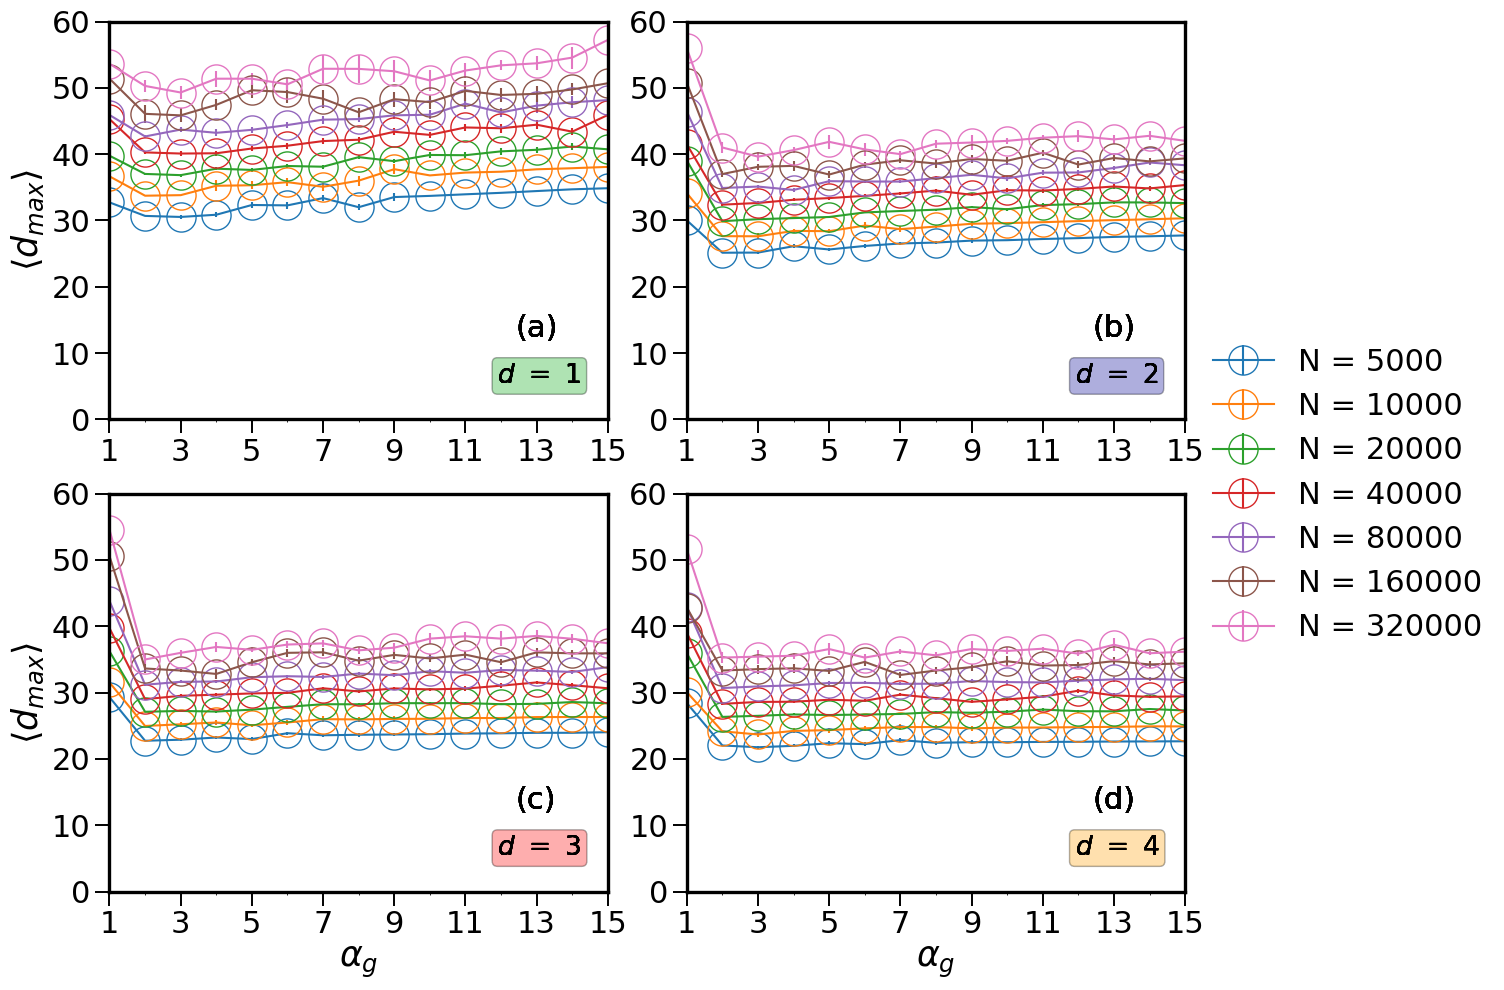

In [9]:
#DIAMETER VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_g'], df_ord['diameter_mean'],
                    yerr=df_ord['diameter_err'], linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=11.9, y=5.5, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=12.4, y=12.5, s=lab[j], fontsize=22, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([0, 60])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig("../../results/alpha_g/diameter_multi_N_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

## CALCULATE THE PROPERTIES AS FUNCTION $\alpha_A$ FOR MULTIPLIES $N$

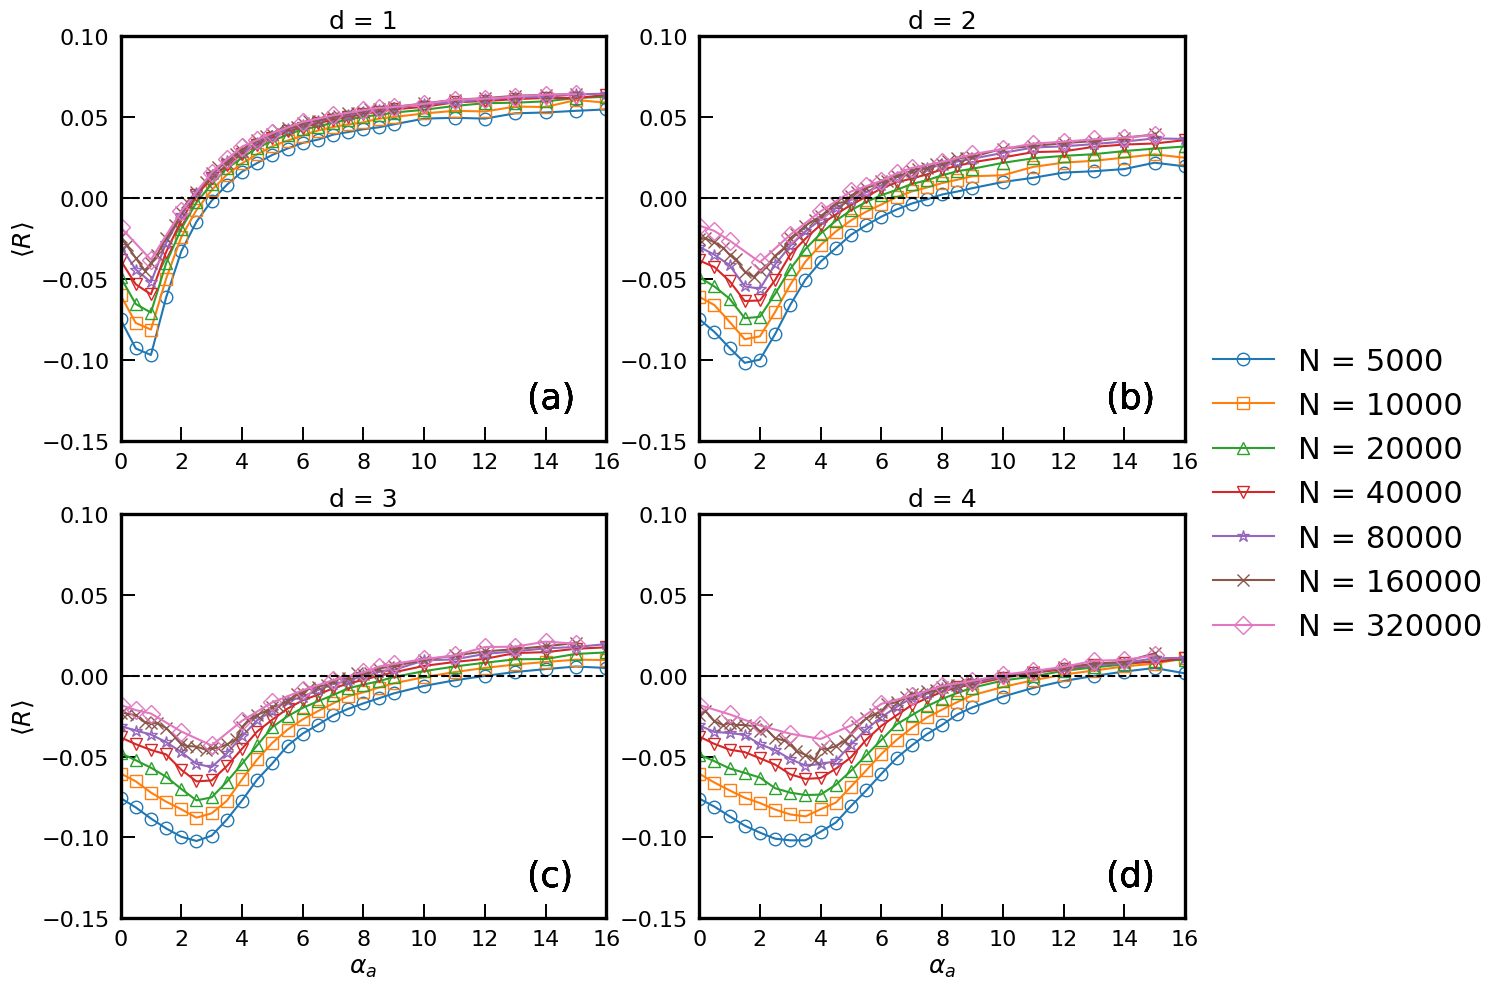

In [10]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 9
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ['#1f77b4',  # Azul
         '#ff7f0e',  # Laranja
         '#2ca02c',  # Verde
         '#d62728',  # Vermelho
         '#9467bd',  # Roxo
         '#8c564b',  # Marrom
         '#e377c2']  # Rosa

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        # ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean'],
        #             yerr=df_ord['ass_coeff_err'], linestyle='-', marker='o',
        #             label=labels[i], markersize=markersize, markerfacecolor='none')
        ax.plot(df_ord['alpha_a'], df_ord['ass_coeff_mean'], linestyle='-', marker=markers[i],
                    label=labels[i], markersize=markersize, markerfacecolor='none', markeredgecolor=colors[i])
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        # ax.text(x=12.2, y=-.13, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #         color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=13.4, y=-.13, s=lab[j], fontsize=25, color="black")
    ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([-.15, .10])
    ax.tick_params('both', width=1.4, length=10, labelsize=16, direction='in', pad=8)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])
    ax.set_title(f"d = {dim}", fontsize=18)
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=18)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=18)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/R_multi_N_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

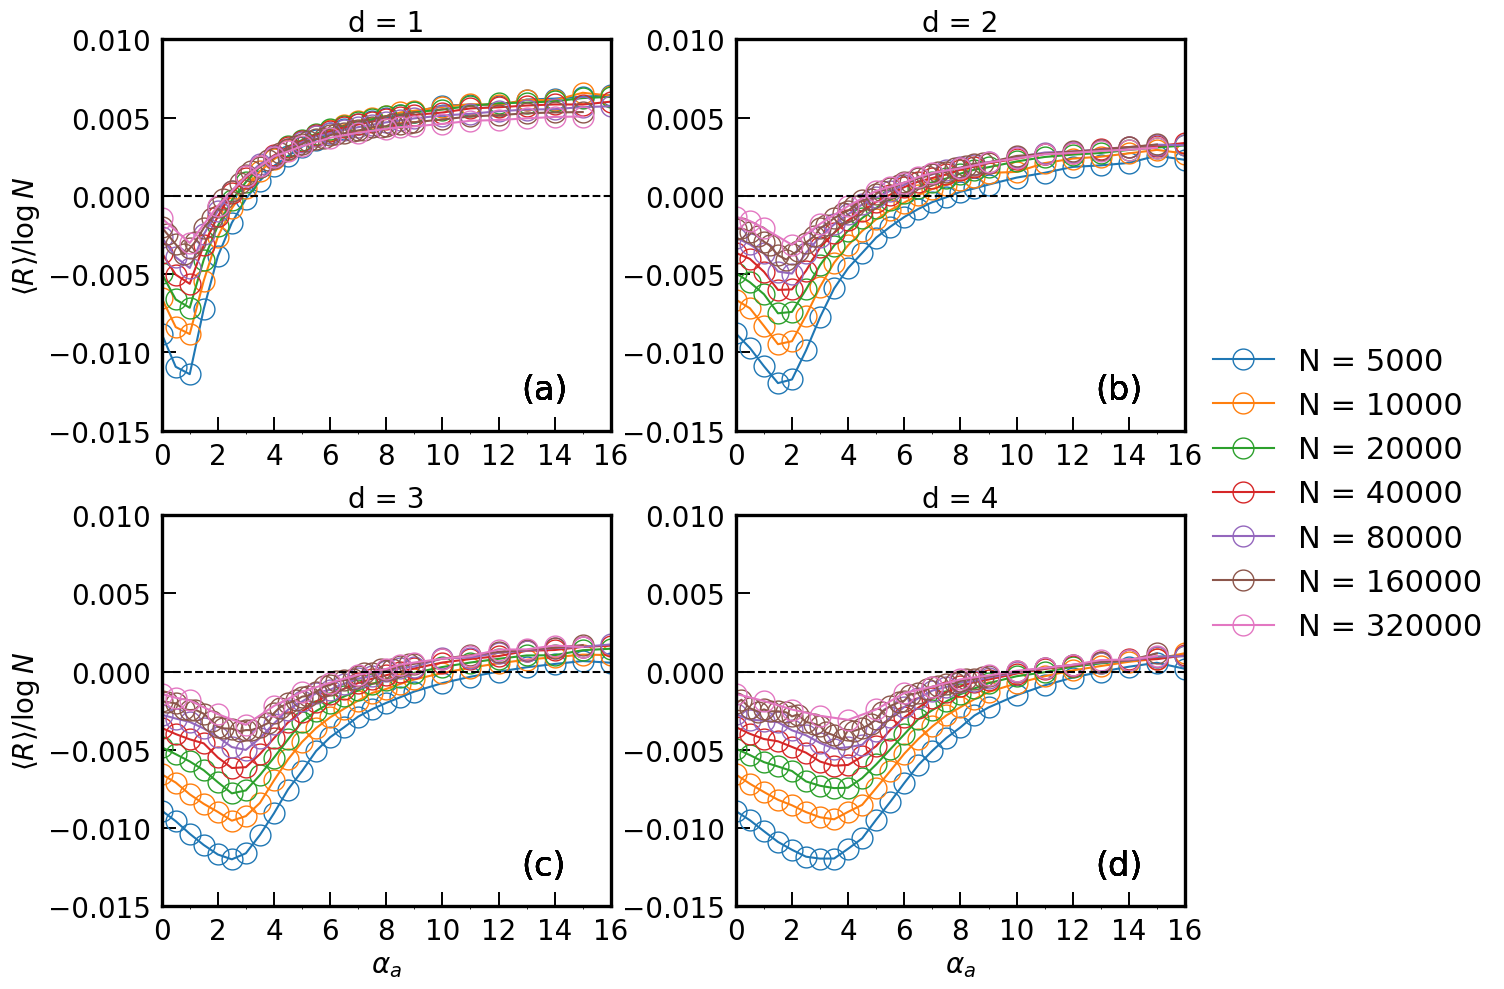

In [11]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 15
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        # ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean']/np.log(N[i]),
        #             yerr=df_ord['ass_coeff_err']/np.log(N[i]), linestyle='-', marker='o',
        #             label=labels[i], markersize=markersize, markerfacecolor='none')
        ax.plot(df_ord['alpha_a'], df_ord['ass_coeff_mean']/np.log(N[i]), linestyle='-', marker='o',
            label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        # ax.text(x=11.7, y=-.013, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #         color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))

        ax.text(x=12.8, y=-.013, s=lab[j], fontsize=24, color="black")
    ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([-.015, .010])
    ax.tick_params('both', width=1.4, length=10, labelsize=20, direction='in', pad = 8)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])
    ax.set_title(f"d = {dim}", fontsize=20)
    fl = 20
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=fl)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle / \log{N}$", size=fl)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig("../../results/alpha_a/R_logN_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

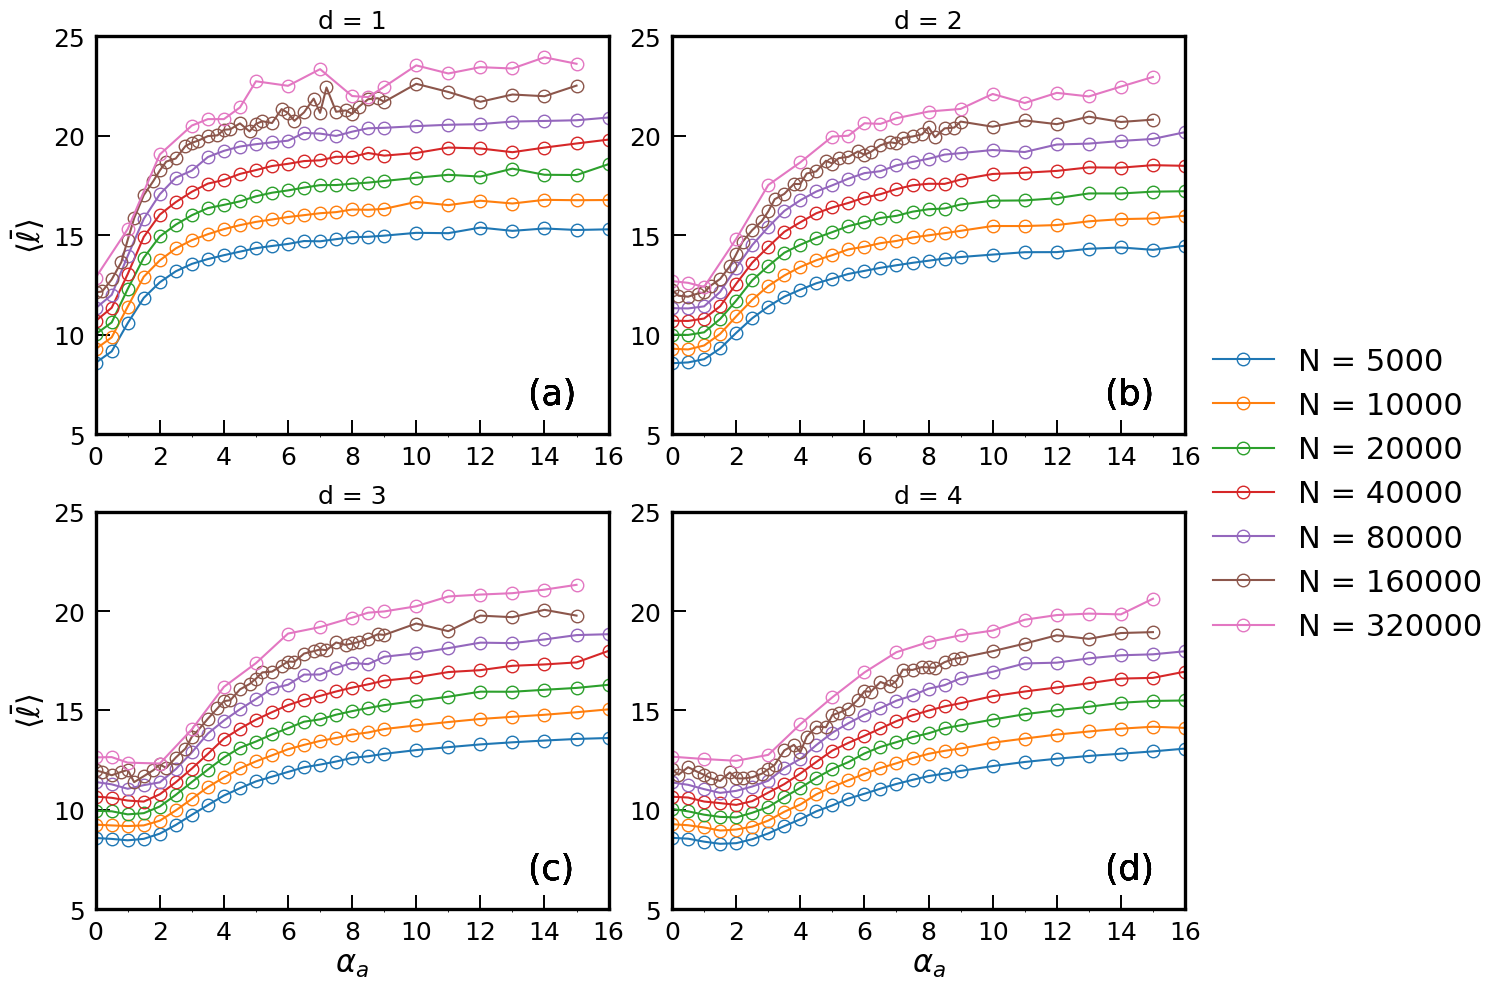

In [12]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 9
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
#colors = ["#03AC13", "#00019a", "#fe0000", "orange"]
colors = ['#1f77b4',  # Azul
         '#ff7f0e',  # Laranja
         '#2ca02c',  # Verde
         '#d62728',  # Vermelho
         '#9467bd',  # Roxo
         '#8c564b',  # Marrom
         '#e377c2']  # Rosa
#dim = [1,2,3,4]
j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        # ax.errorbar(df_ord['alpha_a'], df_ord['short_mean'],
        #             yerr=df_ord['short_err'], linestyle='-', marker='o',
        #             label=labels[i], markersize=markersize, markerfacecolor='none')
        ax.plot(df_ord['alpha_a'], df_ord['short_mean'], linestyle='-', marker='o',
            label=labels[i], markersize=markersize, markerfacecolor='none', markeredgecolor=colors[i])
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        # ax.text(x=12.4, y=6.5, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #         color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=13.5, y=6.5, s=lab[j], fontsize=25, color="black")
        ax.set_title(f"d = {dim}", fontsize=18)
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([5, 25])
    ax.tick_params('both', width=1.4, length=10, labelsize=18, direction='in', pad =8)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=22)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", size=22)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/short_multi_N_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

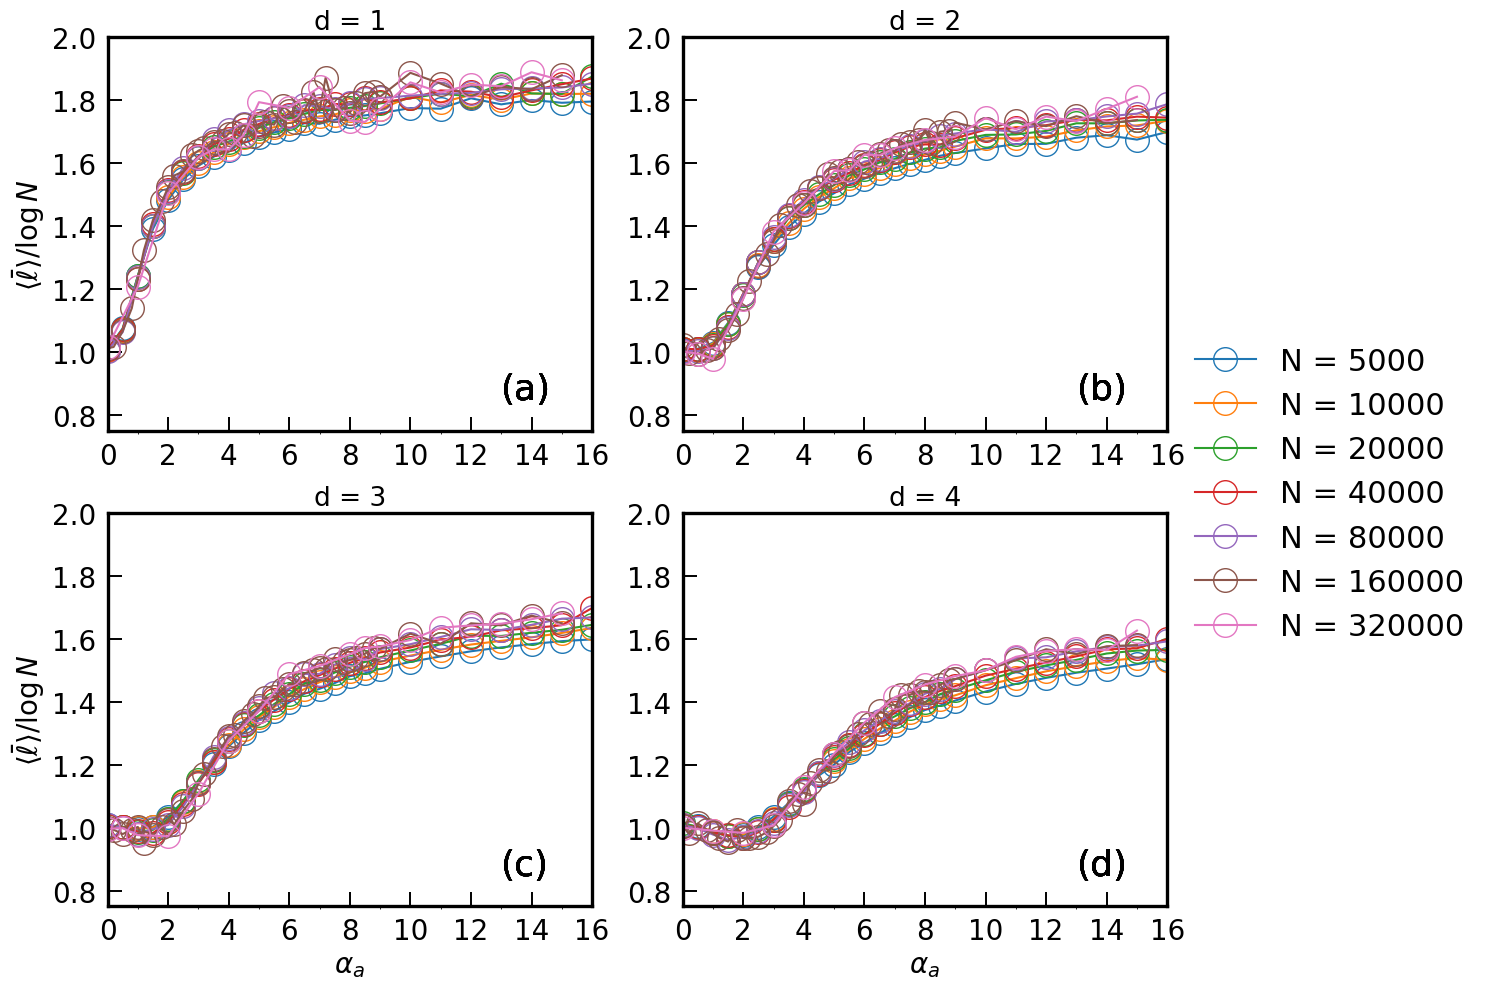

In [13]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 17
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        # ax.errorbar(df_ord['alpha_a'], df_ord['short_mean']/np.log(N[i]),
        #             yerr=df_ord['short_err']/np.log(N[i]), linestyle='-', marker='o',
        #             label=labels[i], markersize=markersize, markerfacecolor='none')
        ax.errorbar(df_ord['alpha_a'], df_ord['short_mean']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        # ax.text(x=12.4, y=0.83, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #         color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=13, y=.85, s=lab[j], fontsize=26, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([0.75, 2])
    
    ax.set_title(f"d = {dim}", fontsize=19)
    
    ax.tick_params('both', width=1.4, length=10, labelsize=20, direction='in', pad = 8)
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])
    fl = 20
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=fl)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle / \log{N}$", size=fl)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao 9lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig("../../results/alpha_a/short_logN_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

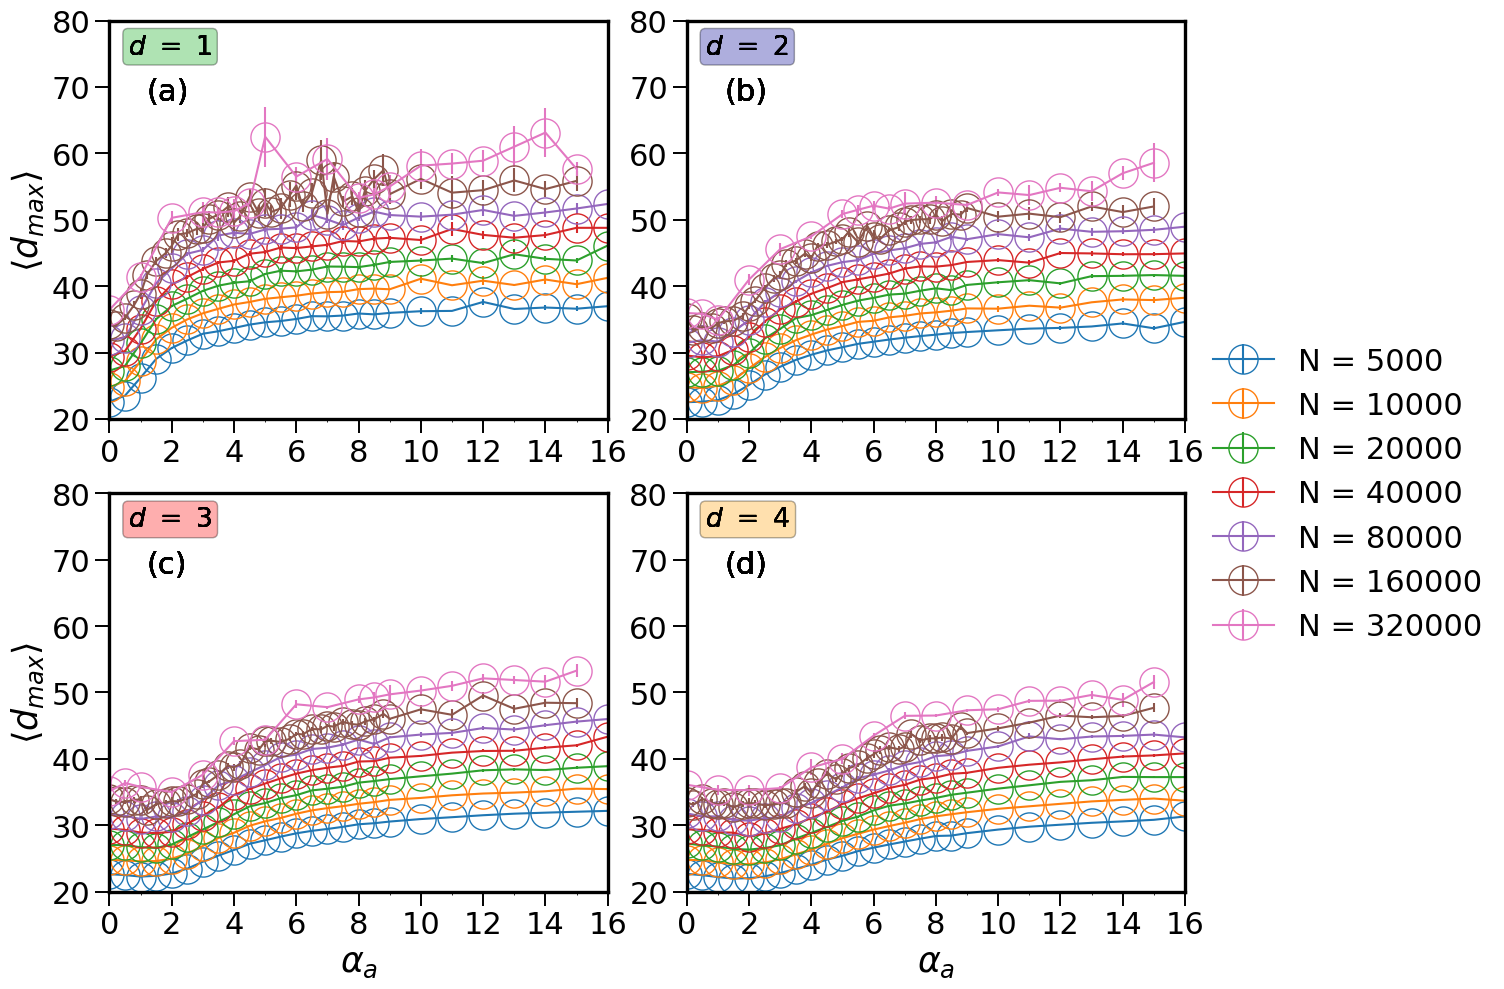

In [14]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['diameter_mean'],
                    yerr=df_ord['diameter_err'], linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=.6, y=75, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=1.2, y=68, s=lab[j], fontsize=22, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([20, 80])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig("../../results/alpha_a/diameter_multi_N_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

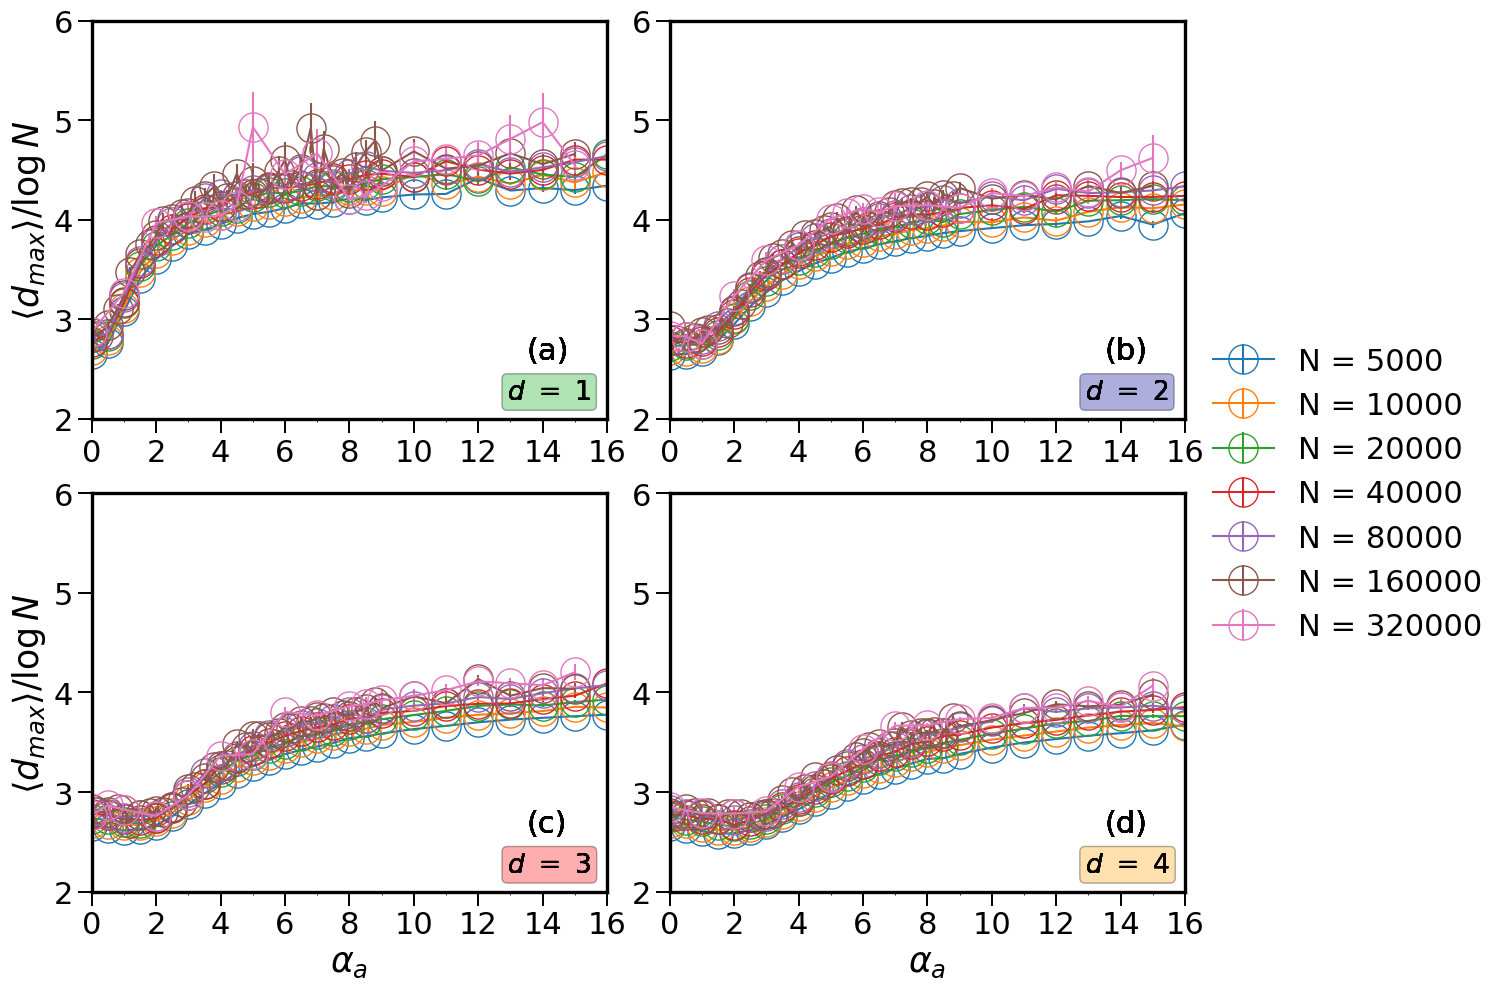

In [15]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['diameter_mean']/np.log(N[i]),
                    yerr=df_ord['diameter_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=12.9, y=2.2, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=13.5, y=2.6, s=lab[j], fontsize=22, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([2, 6.0])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle/\log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig("../../results/alpha_a/diameter_logN_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

## CALCULATE THE PROPERTIES LINEAR REGRESSION

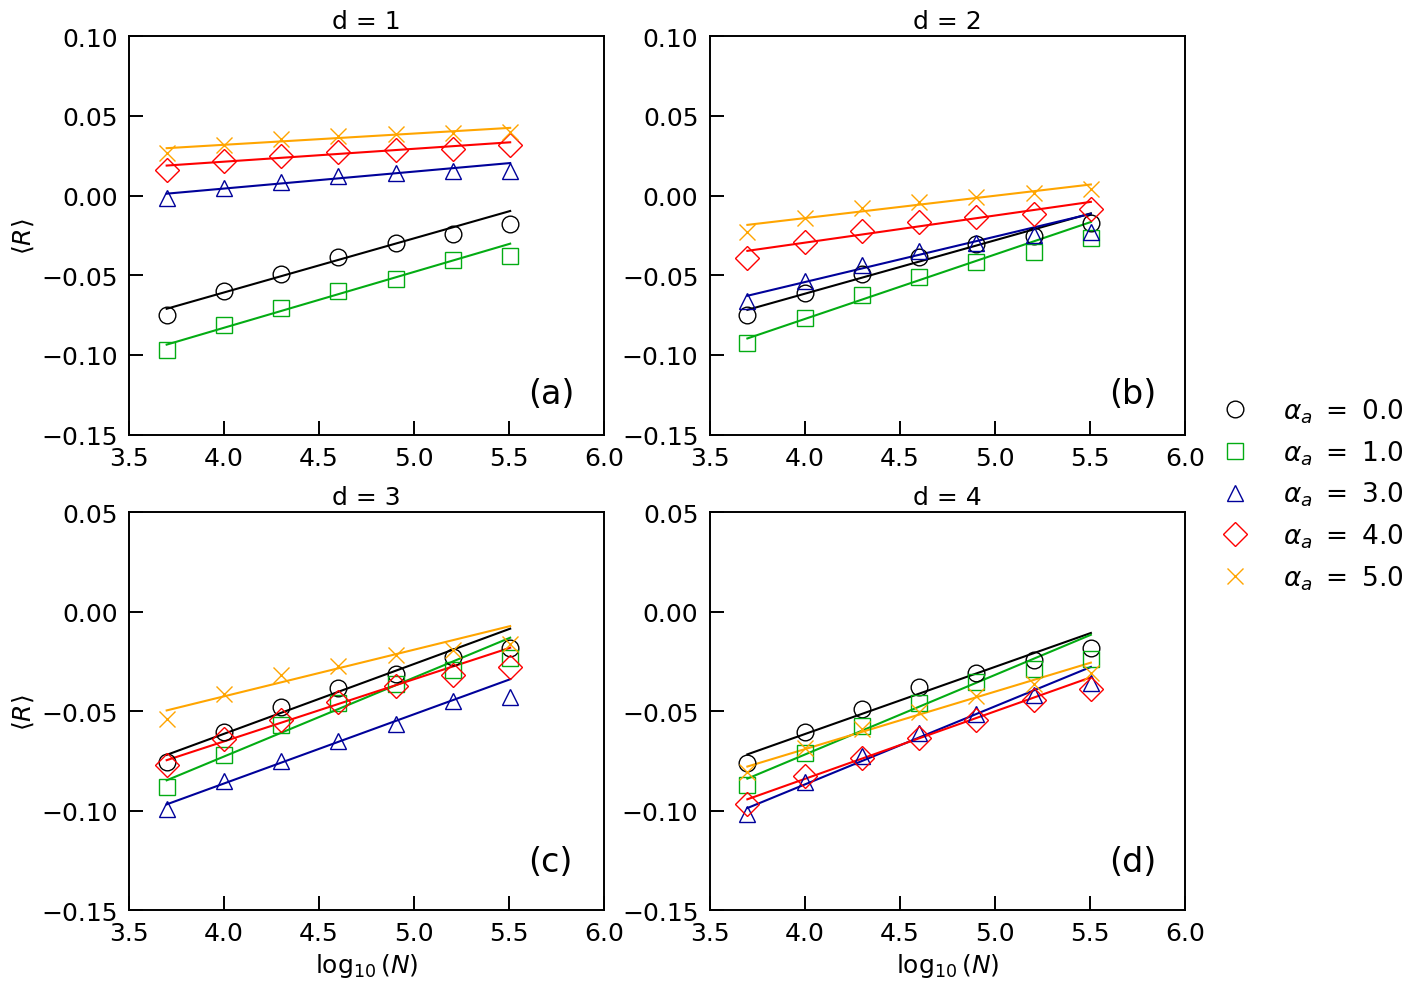

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Dados e configurações
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
markers = ['o', 's', '^', 'D', 'x']
colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0

# Certifique-se de que a variável "lab" esteja definida
lab = ["(a)", "(b)", "(c)", "(d)"]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Facilita o acesso aos subplots com índice linear
markersize = 12
thickness_axes = 1.4

# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    count = 0
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter_plot:
        N_aux = []
        prop = []
        prop_err = []
        
        # Loop sobre os diferentes valores de N
        for n in N:
            # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
            df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
            df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
            
            # Adiciona os dados ao gráfico
            if not df_dim_alpha_a.empty:
                N_aux.append(n)
                prop.append(df_dim_alpha_a["ass_coeff_mean"].tolist()[0])
                prop_err.append(df_dim_alpha_a["ass_coeff_err"].tolist()[0])
        
        regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
        ax.errorbar(np.log10(N_aux), prop, linestyle='None', marker=markers[count],
                    label=rf"$\alpha_a$ $=$ ${alpha}$", markersize=markersize,
                    markerfacecolor='none', color=colors[count])
        ax.plot(np.log10(N_aux), regression, color=colors[count], label="_nolegend_")
        count += 1
    
    # Define a posição do texto para cada subplot
    if dim_idx in [0, 1]:
        x_p, y_p = 5.6, -0.13
    else:
        x_p, y_p = 5.6, -0.13  # Se desejar alterar para outra posição nos subplots inferiores, ajuste aqui.
    ax.text(x=x_p, y=y_p, s=lab[count_box], fontsize=24, color="black")
    count_box += 1
    
    # Define os limites e configurações dos eixos
    ax.set_xlim([3.5, 6])
    if dim_idx < 2:  # Subplots da primeira linha
        ax.set_ylim([-0.15, 0.10])
    else:           # Subplots da segunda linha
        ax.set_ylim([-0.15, 0.05])
        
    ax.tick_params('both', width=1.4, length=10, labelsize=18, direction='in', pad=8)
    ax.set_title(f"d = {dim}", fontsize=18)
    
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:
        ax.set_xlabel(r"$\log_{10}(N)$", size=18)
    if dim_idx % 2 == 0:
        ax.set_ylabel(r"$\langle R \rangle$", size=18)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot],
           prop={"size": 19}, fancybox=True, framealpha=0.0, loc='center left',
           bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/N/R_linear_N.pdf", dpi=300)
plt.show()


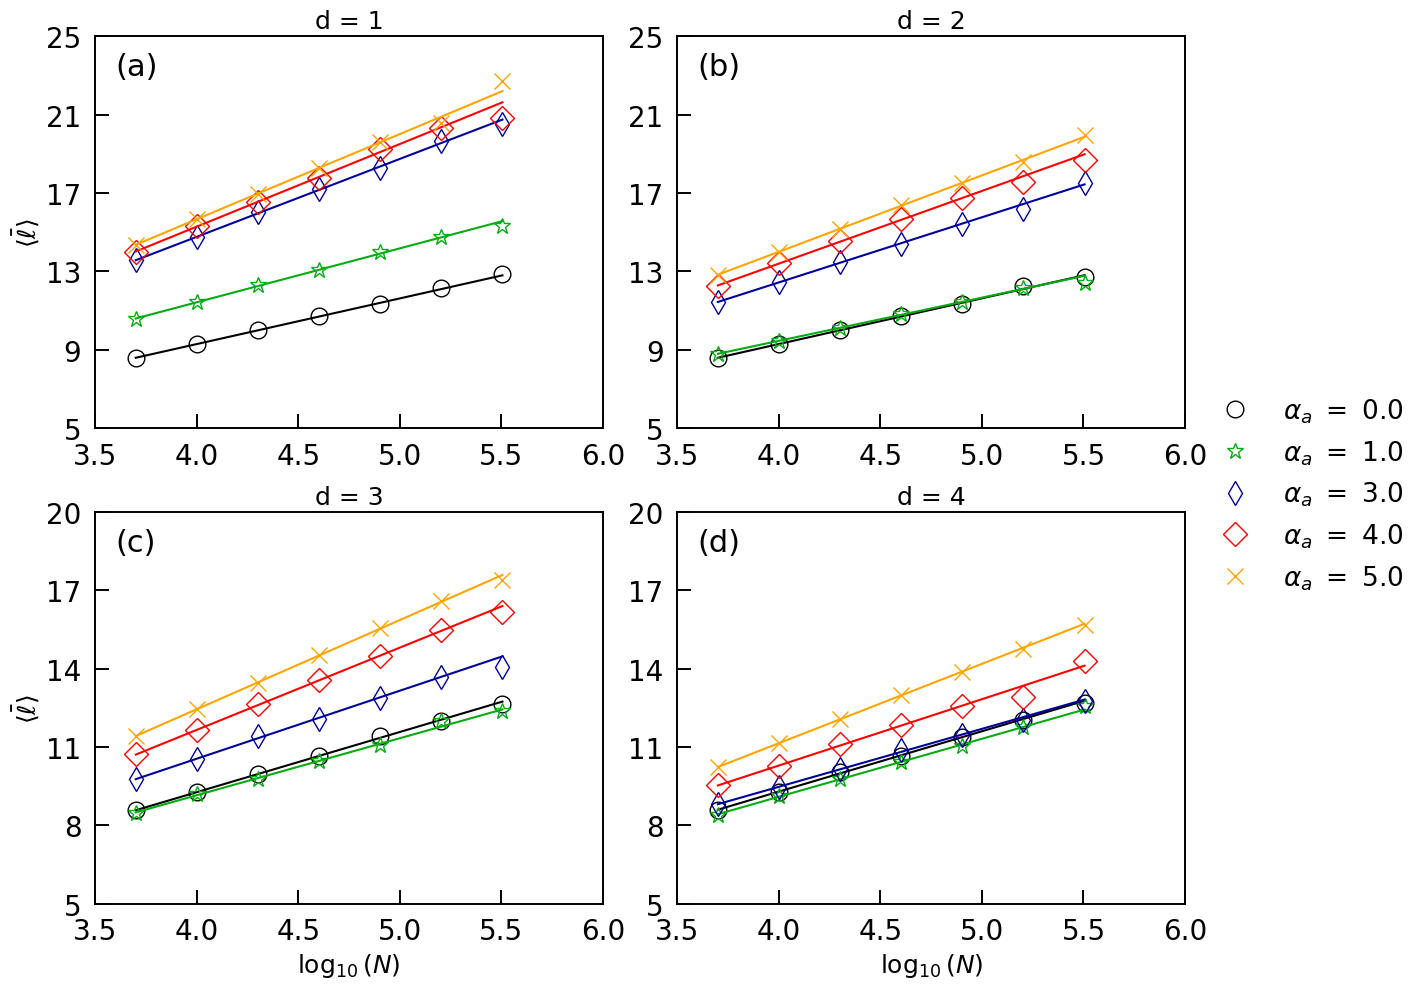

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
# Cores para os gráficos; note que a lista foi redefinida para 5 cores
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]

colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0

# Certifique-se de que a variável "lab" esteja definida, por exemplo:
lab = ["(a)", "(b)", "(c)", "(d)"]
markers = ['o', '*', 'd', 'D', 'x']

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Facilita o acesso aos subplots com um índice linear

markersize = 12
thickness_axes = 1.4

# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    count = 0
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    
    for alpha in alpha_filter_plot:
        N_aux = []
        prop = []
        prop_err = []
        
        # Loop sobre os diferentes valores de N
        for n in N:
            # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
            df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
            df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
            
            # Adiciona os dados ao gráfico se o filtro retornar dados
            if not df_dim_alpha_a.empty:
                N_aux.append(n)
                prop.append(df_dim_alpha_a["short_mean"].tolist()[0])
                prop_err.append(df_dim_alpha_a["short_err"].tolist()[0])
                
        regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
        
        # Plota os dados e o ajuste
        ax.plot(np.log10(N_aux), prop, linestyle='None', marker=markers[count],
                label=rf"$\alpha_a$ $=$ ${alpha}$", markersize=markersize,
                markerfacecolor='none', color=colors[count])
        ax.plot(np.log10(N_aux), regression, color=colors[count], label="_nolegend_")
        count += 1
    
    # Define a posição do texto conforme o subplot:
    if dim_idx in [0, 1]:
        x_p, y_p = 3.6, 23
    else:
        x_p, y_p = 3.6, 18.5
    ax.text(x=x_p, y=y_p, s=lab[count_box], fontsize=22, color="black")
    count_box += 1
    
    # Define os limites e configurações dos eixos
    ax.set_xlim([3.5, 6])
    ax.set_title(f"d = {dim}", fontsize=18)
    
    # Define limites do eixo y conforme a posição do subplot
    if dim_idx < 2:  # Subplots da primeira linha
        ax.set_ylim([5, 25])
    else:           # Subplots da segunda linha
        ax.set_ylim([5, 20])
    
    # Configura os ticks do eixo y para ter exatamente 6 ticks (inclusos os limites)
    ymin, ymax = ax.get_ylim()
    ax.set_yticks(np.linspace(ymin, ymax, 6))
    
    ax.tick_params('both', width=1.4, length=10, labelsize=20, direction='in', pad=10)
    
    # Configura os rótulos dos eixos para subplots específicos
    if dim_idx in [2, 3]:
        ax.set_xlabel(r"$\log_{10}(N)$", size=18)
    if dim_idx % 2 == 0:
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", size=18)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot],
           prop={"size": 19}, fancybox=True, framealpha=0.0, loc='center left',
           bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda

plt.savefig("../../results/N/short_linear_N.pdf", dpi=300)
plt.show()


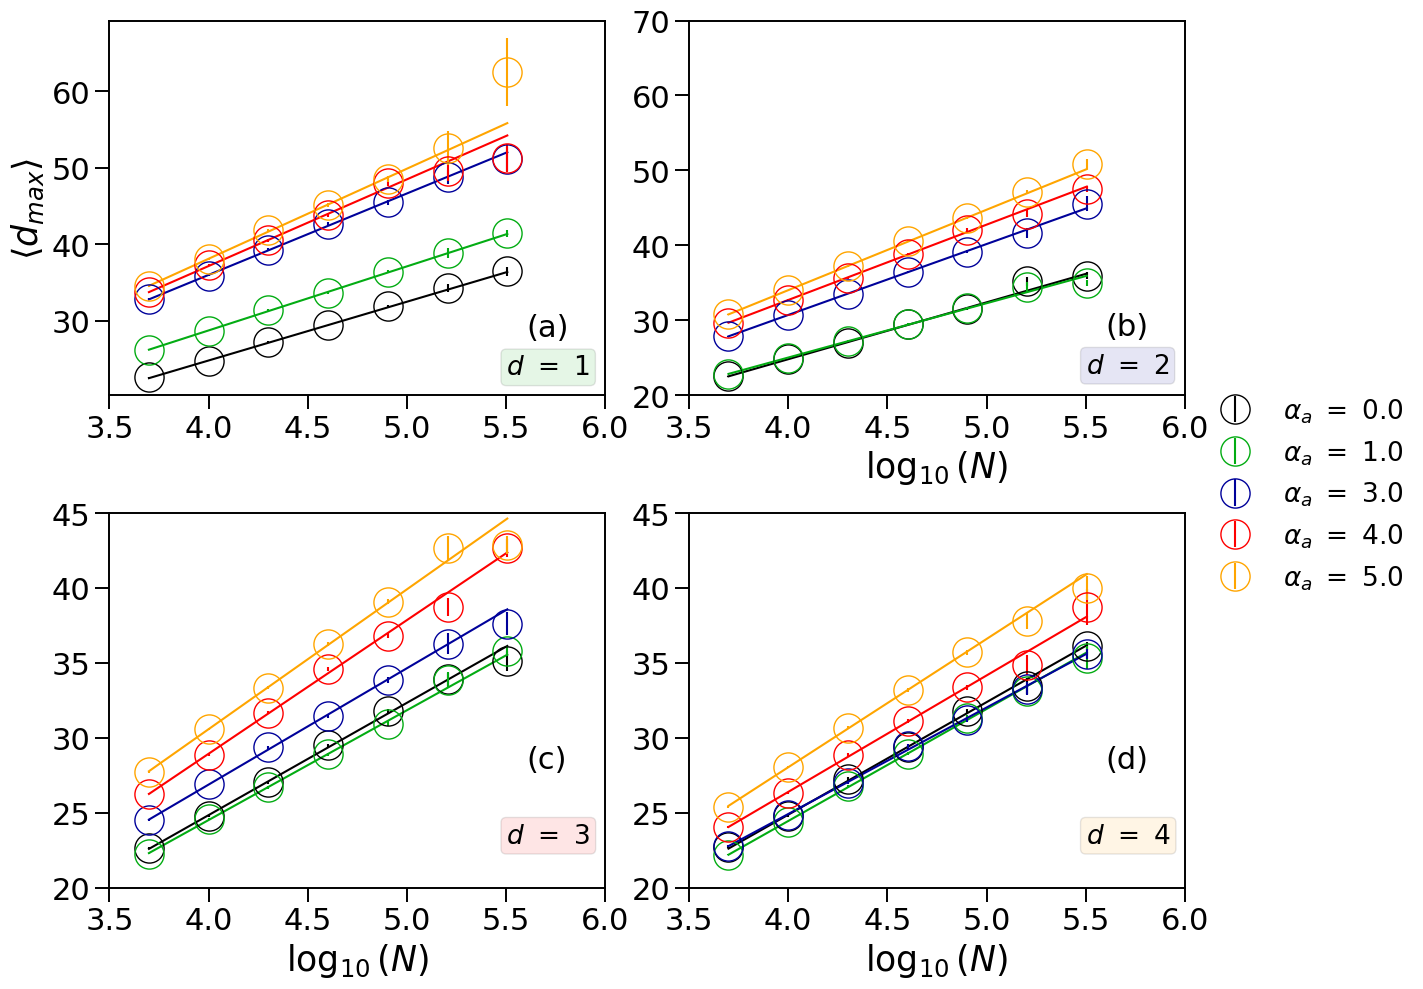

In [18]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
markersize = 21
thickness_axes = 1.4
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]

colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    count = 0
    
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter_plot:
        N_aux = []
        prop = []
        prop_err = []
        
        # Loop sobre os diferentes valores de N
        for n in N:
            # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
            df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
            df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
            
            # Adiciona os dados ao gráfico
            if not df_dim_alpha_a.empty:  # Verifica se o filtro retornou dados
                N_aux.append(n)
                prop.append(df_dim_alpha_a["diameter_mean"].tolist()[0])
                prop_err.append(df_dim_alpha_a["diameter_err"].tolist()[0])
        regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
        #print(type(np.log(N_aux)))
        # Plota o gráfico para o valor atual de alpha_a
        ax.errorbar(np.log10(N_aux), prop, yerr=prop_err, linestyle='None', marker='o',
                    label=rf"$\alpha_a$ $=$ ${alpha}$", markersize=markersize, markerfacecolor='none', color=colors[count])
        ax.plot(np.log10(N_aux), regression,color=colors[count],label="_nolegend_")
        count += 1
    
    ax.text(x=5.5, y=23, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        color="black",bbox=dict(facecolor=colors_box[count_box], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
    ax.text(x=5.6, y=28, s=lab[count_box], fontsize=22, color="black")
    count_box +=1
    
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([3.5, 6])

    #ax.set_ylim([20, 70])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    #ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\log_{10}(N)$", size=25)
        ax.set_ylim([20, 45])

    elif dim_idx in [1, 2]:  # Subplots na última linha
        ax.set_xlabel(r"$\log_{10}(N)$", size=25)
        ax.set_ylim([20, 70])
    
    elif dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle$", size=25)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot], prop={"size": 19}, 
           fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig("../../results/N/diameter_linear_N.pdf", dpi=300)
plt.show()

## CALCULATE LINEAR COEFFICIENT VERSUS $\alpha_a$

In [19]:
# Linear Regression calculate
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter = [0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
dimensions = [1, 2, 3, 4]

coeff_all = {"alpha_a":[], "alpha_g":[], "dim":[], 
             "A_ass":[], "A_ass_err":[], "B_ass":[], "B_ass_err":[],
             "A_diameter":[], "A_diameter_err":[], "B_diameter":[], "B_diameter_err":[],
             "A_short":[], "A_short_err":[], "B_short":[], "B_short_err":[]}

properties = ["ass", "diameter", "short"]

# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
        
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter:
        N_aux = []
        prop = []
        prop_err = []
        
        for j in range(len(properties)):
            # Loop sobre os diferentes valores de N
            for n in N:
                # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
                df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
                df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
                
                # Adiciona os dados ao gráfico
                if not df_dim_alpha_a.empty:  # Verifica se o filtro retornou dados
                    N_aux.append(n)
                    if(properties[j]=="ass"):
                        prop_name = "ass_coeff_mean"
                        prop_name_err = "ass_coeff_err"
                    
                    elif(properties[j]=="diameter"):
                        prop_name = "diameter_mean"
                        prop_name_err = "diameter_err"
                    
                    elif(properties[j]=="short"):
                        prop_name = "short_mean"
                        prop_name_err = "short_err"
                    
                    prop.append(df_dim_alpha_a[prop_name].tolist()[0])
                    prop_err.append(df_dim_alpha_a[prop_name_err].tolist()[0])

            regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=True)
                
            coeff_all[f"A_{properties[j]}"].append(regression[0])
            coeff_all[f"B_{properties[j]}"].append(regression[1])
            coeff_all[f"A_{properties[j]}_err"].append(regression[2])
            coeff_all[f"B_{properties[j]}_err"].append(regression[3])
            
        coeff_all["alpha_a"].append(alpha)
        coeff_all["dim"].append(dim)
        coeff_all["alpha_g"].append(2)

df_coeff = pd.DataFrame(data=coeff_all)
df_coeff.to_csv("../../data/coeff_linear.txt", sep=' ', index=False)
df_coeff.head()

alpha_a  alpha_g  dim     A_ass  A_ass_err     B_ass  B_ass_err  \
0      0.0        2    1  0.014757   0.001106 -0.196697   0.010589   
1      1.0        2    1  0.015235   0.001110 -0.223264   0.010921   
2      3.0        2    1  0.004621   0.000659 -0.038111   0.006726   
3      4.0        2    1  0.003513   0.000498 -0.011045   0.005158   
4      5.0        2    1  0.003067   0.000505  0.003671   0.005302   

   A_diameter  A_diameter_err  B_diameter  B_diameter_err   A_short  \
0    0.014369        0.059029   -0.191748        0.565066  0.012576   
1    0.014734        0.058307   -0.216749        0.573596  0.012880   
2    0.004499        0.020610   -0.036711        0.210217  0.003880   
3    0.003424        0.016163   -0.010022        0.167301  0.002915   
4    0.003003        0.013552    0.004417        0.142206  0.002607   

   A_short_err   B_short  B_short_err  
0     0.077094 -0.168997     0.737982  
1     0.070767 -0.193168     0.696151  
2     0.029722 -0.029534     0.303164  
3     0.024064 -0.004158     0.249079  
4     0.020786  0.009058     0.218119

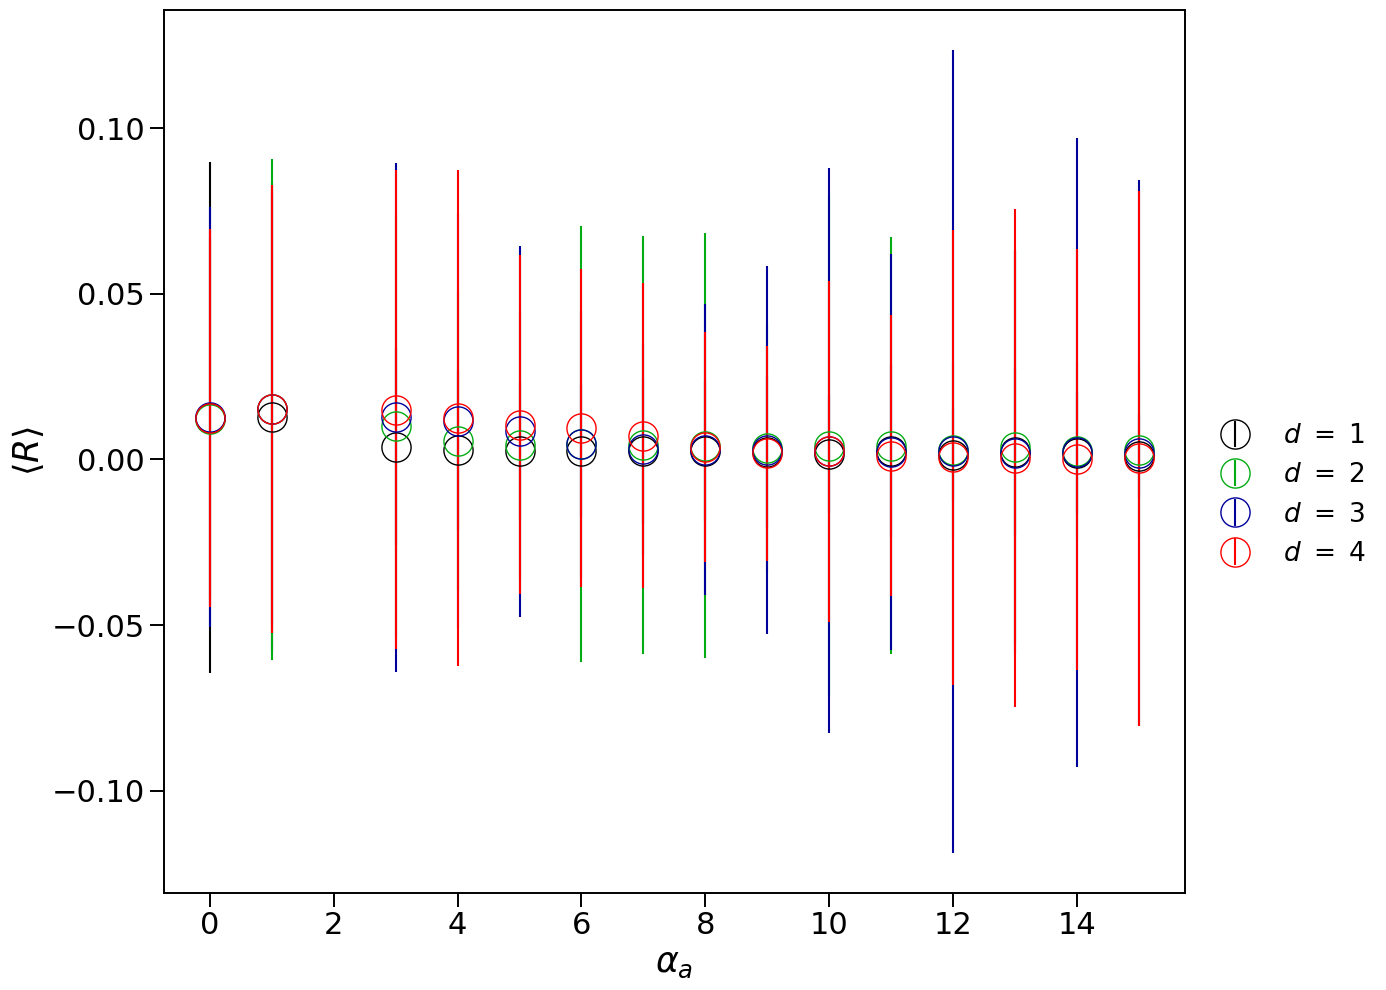

In [20]:
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

# Configuração da figura e subplots 2x2
fig, ax = plt.subplots(figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
markersize = 21
thickness_axes = 1.4
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]

colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
count = 0
for dim_idx, dim in enumerate(dimensions):
    df_dim = df_coeff[df_coeff["dim"]==dim]
    # Plota o gráfico para o valor atual de alpha_a
    ax.errorbar(df_dim["alpha_a"], df_dim["A_short"], yerr=df_dim["A_short_err"], linestyle='None', marker='o',
                label=rf"$\alpha_a$ $=$ ${alpha}$", markersize=markersize, markerfacecolor='none', color=colors[count])
    #ax.plot(np.log10(N_aux), regression,color=colors[count],label="_nolegend_")
    count += 1
    
    #ax.text(x=5.5, y=23, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
     #   color="black",bbox=dict(facecolor=colors_box[count_box], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
    
    count_box +=1
    
    # Define os limites e configurações do eixo x e y
    #ax.set_xlim([3.5, 6])
    #ax.set_ylim([20, 70])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    #ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$d$ $=$ ${dim}$" for dim in dimensions], prop={"size": 19}, 
           fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig("../../results/N/ass_linear_coeff.pdf", dpi=300)
plt.show()

## PLOT TO UNIQUE N VALUE ($N$ $=$ $160000$) WITH $\alpha_g$ $=$ $2.0$

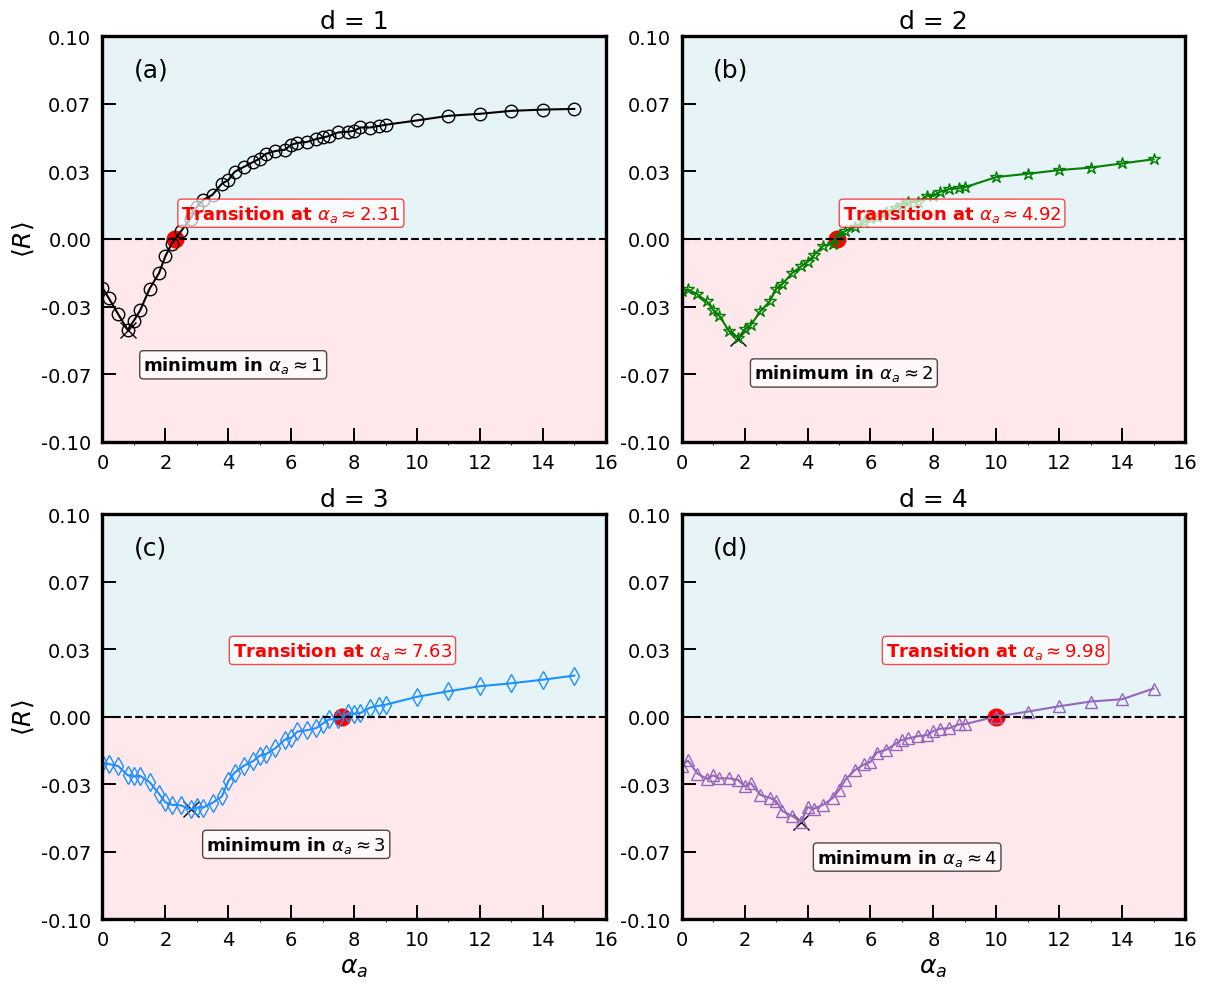

In [21]:
# Configuração inicial
N = 160000
dimensions = [1, 2, 3, 4]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
linestyles = ['-' for _ in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markersize = 9
markers = ["o", "*", "d", "^"]
colors = ["#000000", "green", "#1E90FF", '#9467bd']
lab = ["(a)", "(b)", "(c)", "(d)"]
j = 0
fl = 18
for dim_idx, dim in enumerate(dimensions):
    axes[dim_idx].axhspan(0, 0.10, facecolor='lightblue', alpha=0.3)  # Azul na parte superior
    axes[dim_idx].axhspan(-0.10, 0, facecolor='lightpink', alpha=0.3)  # Rosa na parte inferior
    ax = axes[dim_idx]
    df_dim = df[(df['dim'] == dim) & (df['N'] == N)]
    df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
    df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

    min_row = df_ord.loc[df_ord['ass_coeff_mean'].idxmin()]
    alpha_min = min_row['alpha_a']
    value_min = min_row['ass_coeff_mean']
    
    # Adiciona marcador no ponto mínimo
    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', label='_nolegend_')
    
    ax.text(min(alpha_min + 0.5, 14.5), max(value_min - 0.02, -0.09),
            rf"minimum in $\alpha_a \approx {dim}$",
            fontsize=13, color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))
    
    # Encontra a interseção com y = 0
    x_intercept, y_intercept = find_intersection(df_ord['alpha_a'].values, df_ord['ass_coeff_mean'].values)
    if x_intercept is not None:
        ax.plot(x_intercept, y_intercept, 'o', markersize=12, color='red', label='_nolegend_')
        
        ax.text(x_intercept if dim_idx >= 2 else min(x_intercept + 0.2, 13.8),
                y_intercept + 0.03 if dim_idx >= 2 else max(y_intercept + 0.01, -0.07),
                rf"Transition at $\alpha_a \approx {x_intercept:.2f}$",
                fontsize=13, color='red', weight='bold',
                bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.2', alpha=0.7),
                ha='center' if dim_idx >= 2 else 'left')
    
    ax.plot(df_ord['alpha_a'], df_ord['ass_coeff_mean'], linestyle='-', marker=markers[j],
            label=dim, markersize=markersize, color=colors[j], markerfacecolor='none')
    ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    ax.text(x=1.0, y=.08, s=lab[j], fontsize=18, color="black")
    j += 1

    ax.set_xlim([0.0, 15])
    ax.set_ylim([-0.10, 0.10])
    # Define 7 ticks igualmente espaçados, garantindo que 0.00 esteja centralizado
    ticks = np.linspace(-0.10, 0.10, 7)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"{tick:.2f}" for tick in ticks])
    ax.tick_params('both', width=1.4, length=10, labelsize=14, direction='in', pad=8)
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])
    ax.set_title(f"d = {dim}", fontsize=18)
    
    if dim_idx in [2, 3]:
        ax.set_xlabel(r"$\alpha_a$", size=fl)
    if dim_idx % 2 == 0:
        ax.set_ylabel(r"$\langle R \rangle$", size=fl)

    for spine in ax.spines.values():
        spine.set_linewidth(2.4)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig(f"../../results/alpha_a/R_N_{N}_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()


In [22]:
df_parms = pd.read_csv("../../data/coeff_linear.txt", sep=' ')
df_parms.head()

alpha_a  alpha_g  dim     A_ass  A_ass_err     B_ass  B_ass_err  \
0      0.0        2    1  0.014757   0.001106 -0.196697   0.010589   
1      1.0        2    1  0.015235   0.001110 -0.223264   0.010921   
2      3.0        2    1  0.004621   0.000659 -0.038111   0.006726   
3      4.0        2    1  0.003513   0.000498 -0.011045   0.005158   
4      5.0        2    1  0.003067   0.000505  0.003671   0.005302   

   A_diameter  A_diameter_err  B_diameter  B_diameter_err   A_short  \
0    0.014369        0.059029   -0.191748        0.565066  0.012576   
1    0.014734        0.058307   -0.216749        0.573596  0.012880   
2    0.004499        0.020610   -0.036711        0.210217  0.003880   
3    0.003424        0.016163   -0.010022        0.167301  0.002915   
4    0.003003        0.013552    0.004417        0.142206  0.002607   

   A_short_err   B_short  B_short_err  
0     0.077094 -0.168997     0.737982  
1     0.070767 -0.193168     0.696151  
2     0.029722 -0.029534     0.303164  
3     0.024064 -0.004158     0.249079  
4     0.020786  0.009058     0.218119

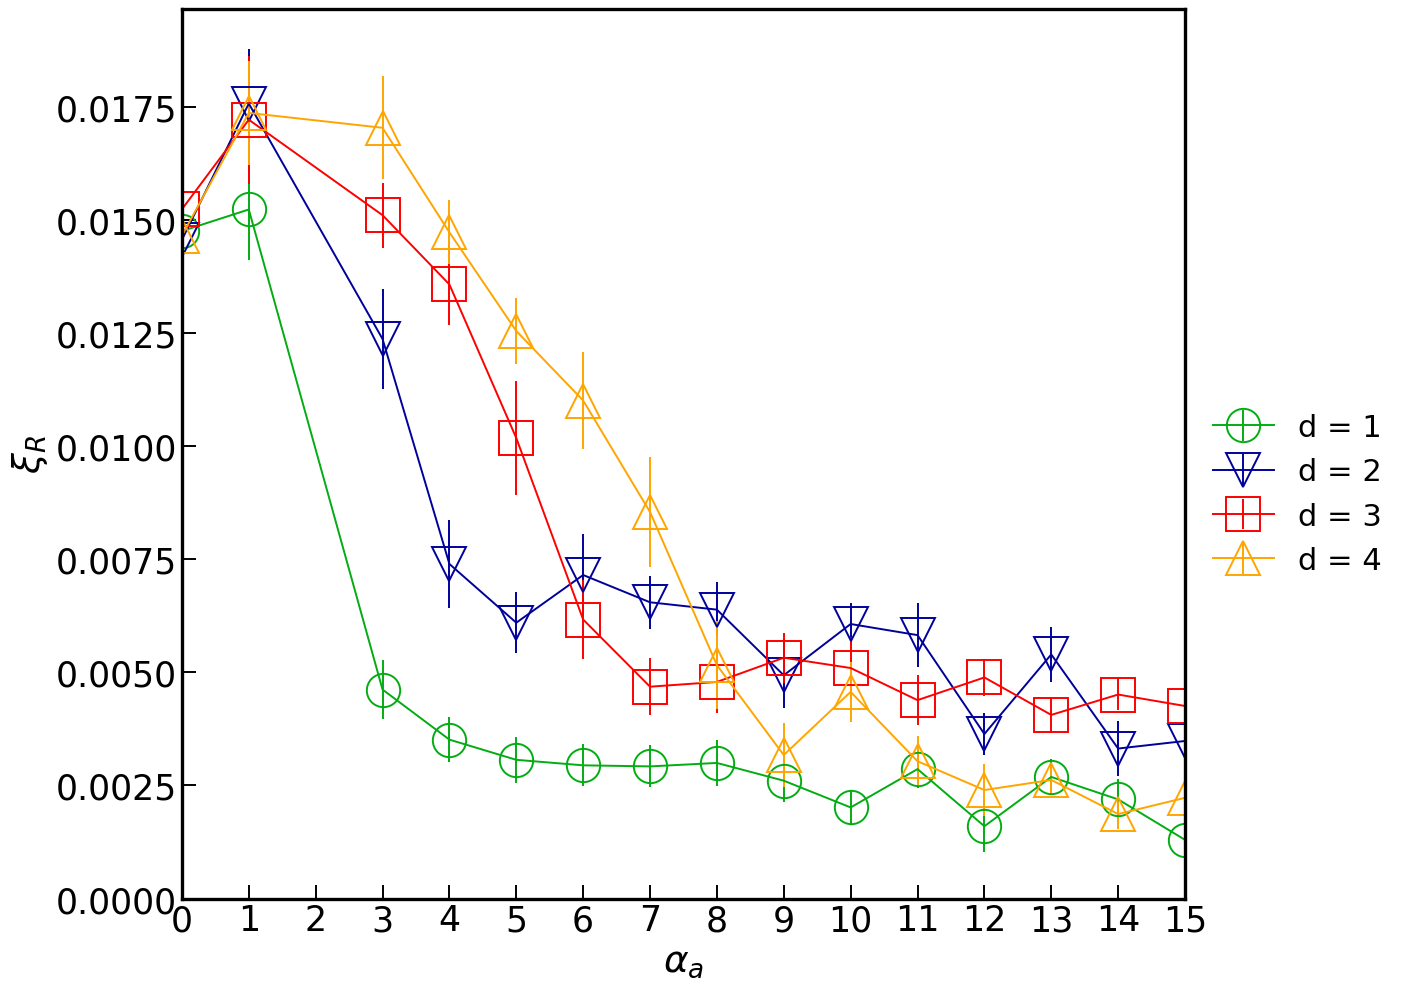

In [23]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = 160000
dimensions = [1, 2, 3, 4]
# Configuração da figura e subplots 2x2
fig, ax = plt.subplots(figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markers = ['o', 'v', 's', '^', 'D']
markersize = 24
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim in dimensions:
    # Filtra o DataFrame para a dimensão e valor de N desejados
    df_dim_alpha_a = df_parms[(df_parms['dim'] == dim)]
    df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

    # # Calcula o mínimo
    # min_row = df_ord.loc[df_ord['short_mean'].idxmin()]
    # alpha_min = min_row['alpha_a']
    # value_min = min_row['short_mean']

    # Adiciona marcador no ponto mínimo
    #    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', label='_nolegend_')

    # Adiciona anotação para destacar o ponto
    # ax.text(alpha_min + 0.5, value_min - 0.02,
    #         rf"minimum in $\alpha_a \approx {dim}$",
    #         fontsize=15, color='black', weight='bold',
    #         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))


    # Cria o gráfico de erro
    ax.errorbar(df_ord['alpha_a'], df_ord['A_ass'],
                yerr=df_ord['A_ass_err'], linestyle='-', lw=1.4, marker=markers[j], mew=1.4,
                label=dim, markersize=markersize, color=colors[j] ,markerfacecolor='none')
    j+=1
#ax.hlines(y=0.0, xmin=0.0, xmax=15.0, linestyle='--', color='k', label="_nolegend_")
#ax.text(x=1.3, y=.08, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))

# Define os limites e configurações do eixo x e y
ax.set_xlim([0, 15])
#ax.set_ylim([-0.1, .08])
ax.tick_params('both', width=1.4, length=10, direction='in' ,labelsize=25)
# Define os multiplicadores dos ticks no eixo x com um step de 2
ax.xaxis.set_major_locator(MultipleLocator(1))


# Condições para exibir rótulos dos eixos em subplots específicos
ax.set_xlabel(r"$\alpha_a$", size=27)

ax.set_ylabel(r"$ \xi_R $", size=27)

# Define a espessura das bordas
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig(f"../../results/alpha_a/R_qsi_alpha_a_full.svg", dpi=300, bbox_inches="tight")
plt.show()

In [24]:
# # Configuração da figura e subplots 2x2
# fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
# labels = [f"N = {n}" for n in N]
# markersize = 13
# dimensions = [1, 2, 3, 4]
# markers = ["o", "*", "D", "^"]
# colors = ["#000000", "#FF0000", "#1E90FF", "#3CB371"]

# # Loop sobre cada dimensão e gera o gráfico correspondente
# for dim_idx, dim in enumerate(dimensions):
#     ax = axes[dim_idx]  # Seleciona o subplot correspondente
#     for i in range(len(N)):
#         # Filtra o DataFrame para a dimensão e valor de N desejados
#         df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
#         df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
#         df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

#         # Plota apenas os pontos sem conectar com linhas
#         ax.scatter(df_ord['alpha_a'], df_ord['short_mean'], marker=markers[i],
#                    label=labels[i], s=markersize**2, facecolors='none', edgecolors=colors[i] )

#     # Define os limites e configurações do eixo x e y
#     ax.set_xlim([0.0, 6.0])
#     ax.set_ylim([5, 25])
#     ax.tick_params('both', width=1.4, length=10, labelsize=18, direction='out', pad=4)
#     ax.set_title(f"d = {dim}", fontsize=18)

#     # Define os multiplicadores dos ticks no eixo x com um step de 1
#     ax.xaxis.set_major_locator(MultipleLocator(1))
    
#     ax.yaxis.set_major_locator(MultipleLocator(5.0))

#     fl = 18
#     # Condições para exibir rótulos dos eixos em subplots específicos
#     if dim_idx in [2, 3]:  # Subplots na última linha
#         ax.set_xlabel(r"$\alpha_a$", size=fl)
#     if dim_idx % 2 == 0:  # Subplots na primeira coluna
#         ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", size=fl)

#     # Define a espessura das bordas
#     thickness_axes = 2.4
#     for spine in ax.spines.values():
#         spine.set_linewidth(thickness_axes)

# # Cria uma legenda comum ao lado da figura
# fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
#            loc='center left', bbox_to_anchor=(0.84, 0.5))

# # Ajusta o layout para evitar sobreposição
# plt.tight_layout()
# plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda

# # Exibe o gráfico
# plt.show()

In [25]:
# # Configuração da figura e subplots 2x2
# fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
# labels = [f"N = {n}" for n in N]
# markersize = 13
# dimensions = [1, 2, 3, 4]
# markers = ["o", "*", "D", "^"]
# colors = ["#000000", "#FF0000", "#1E90FF", "#3CB371"]

# # Loop sobre cada dimensão e gera o gráfico correspondente
# for dim_idx, dim in enumerate(dimensions):
#     ax = axes[dim_idx]  # Seleciona o subplot correspondente
#     for i in range(len(N)):
#         # Filtra o DataFrame para a dimensão e valor de N desejados
#         df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
#         df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
#         df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

#         # Plota apenas os pontos sem conectar com linhas
#         ax.scatter(df_ord['alpha_a'], df_ord['ass_coeff_mean'], marker=markers[i],
#                    label=labels[i], s=markersize**2, facecolors='none', edgecolors=colors[i] )

#     # Define os limites e configurações do eixo x e y
#     ax.set_xlim([0.0, 6.0])
#     #ax.set_ylim([5, 25])
#     ax.tick_params('both', width=1.4, length=10, labelsize=18, direction='out', pad=4)
#     ax.set_title(f"d = {dim}", fontsize=18)

#     # Define os multiplicadores dos ticks no eixo x com um step de 1
#     ax.xaxis.set_major_locator(MultipleLocator(1))
    
#     ax.yaxis.set_major_locator(MultipleLocator(.025))

#     fl = 18
#     # Condições para exibir rótulos dos eixos em subplots específicos
#     if dim_idx in [2, 3]:  # Subplots na última linha
#         ax.set_xlabel(r"$\alpha_a$", size=fl)
#     if dim_idx % 2 == 0:  # Subplots na primeira coluna
#         ax.set_ylabel(r"$\langle R \rangle$", size=fl)

#     # Define a espessura das bordas
#     thickness_axes = 2.4
#     for spine in ax.spines.values():
#         spine.set_linewidth(thickness_axes)

# # Cria uma legenda comum ao lado da figura
# fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
#            loc='center left', bbox_to_anchor=(0.84, 0.5))

# # Ajusta o layout para evitar sobreposição
# plt.tight_layout()
# plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
# # Exibe o gráfico
# plt.show()

In [26]:
import numpy as np

def find_intersections(x, y):
    """
    Encontra todas as interseções entre os pontos dados (x, y) e a reta y = 0.

    Parâmetros:
    x : array-like : Coordenadas x dos pontos de dados
    y : array-like : Coordenadas y dos pontos de dados

    Retorna:
    intersecoes : Lista de tuples [(x_intercept1, 0), (x_intercept2, 0), ...]
    """
    intersecoes = []

    # Percorre os pontos para encontrar trocas de sinal
    for i in range(len(y) - 1):
        if y[i] * y[i + 1] < 0:  # Troca de sinal indica interseção
            x1, x2 = x[i], x[i + 1]
            y1, y2 = y[i], y[i + 1]
            
            # Cálculo da interseção por interpolação linear
            x_intercept = x1 - (y1 * (x2 - x1)) / (y2 - y1)
            
            intersecoes.append((x_intercept, 0))  # Adiciona o ponto de interseção

    return intersecoes if intersecoes else None  # Retorna None se não houver interseções


In [27]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
parms_intercept = {"N":[], "dim":[], "alpha_intercept":[]}
dimensions = [1,2,3,4]
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")
        
        x = df_ord['alpha_a'].values
        y = df_ord['ass_coeff_mean'].values
        
        x_int, y_int = find_intersection(x, y)
        
        parms_intercept["N"].append(N[i])
        parms_intercept["dim"].append(int(dim))
        parms_intercept["alpha_intercept"].append(float(x_int))

In [28]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

parms_min = {"N":[], "dim":[], "alpha_min":[], "R_min":[]}
dimensions = [1,2,3,4]

for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")
        
        x = df_ord['alpha_a'].values
        y = df_ord['ass_coeff_mean'].values
        
        x_min = [float(i) for i,j in zip(x,y) if j == min(y)]
        y_min = [float(j) for i,j in zip(x,y) if j == min(y)]
        
        parms_min["N"].append(N[i])
        parms_min["dim"].append(int(dim))
        parms_min["alpha_min"].append(x_min[0])
        parms_min["R_min"].append(y_min[0])

In [29]:
df_min = pd.DataFrame(data=parms_min)
df_min

N  dim  alpha_min     R_min
0     5000    1        1.0 -0.097051
1    10000    1        1.0 -0.081341
2    20000    1        1.0 -0.070834
3    40000    1        1.0 -0.059542
4    80000    1        1.0 -0.052072
5   160000    1        0.8 -0.044812
6   320000    1        1.0 -0.038154
7     5000    2        1.5 -0.101904
8    10000    2        1.5 -0.087306
9    20000    2        1.5 -0.074314
10   40000    2        1.5 -0.063681
11   80000    2        2.0 -0.056074
12  160000    2        1.8 -0.048843
13  320000    2        2.0 -0.039663
14    5000    3        2.5 -0.102175
15   10000    3        2.5 -0.087757
16   20000    3        2.5 -0.077064
17   40000    3        2.5 -0.065316
18   80000    3        3.0 -0.056501
19  160000    3        2.8 -0.045718
20  320000    3        3.0 -0.043102
21    5000    4        3.0 -0.101783
22   10000    4        3.5 -0.086940
23   20000    4        3.5 -0.073742
24   40000    4        3.5 -0.063773
25   80000    4        3.5 -0.055586
26  160000    4        3.8 -0.051989
27  320000    4        4.0 -0.039062

In [30]:
df_int = pd.DataFrame(data=parms_intercept)
df_int

N  dim  alpha_intercept
0     5000    1         3.084023
1    10000    1         2.801724
2    20000    1         2.618852
3    40000    1         2.441081
4    80000    1         2.380192
5   160000    1         2.311881
6   320000    1         2.341005
7     5000    2         7.630280
8    10000    2         6.443218
9    20000    2         5.791861
10   40000    2         5.417193
11   80000    2         5.120770
12  160000    2         4.923711
13  320000    2         4.669536
14    5000    3        12.021654
15   10000    3        10.270792
16   20000    3         9.206142
17   40000    3         8.513976
18   80000    3         7.969670
19  160000    3         7.629228
20  320000    3         7.557862
21    5000    4        13.044149
22   10000    4        11.796999
23   20000    4        11.118611
24   40000    4        10.433229
25   80000    4        10.210528
26  160000    4         9.978414
27  320000    4         9.836271

In [31]:
d = 1
df_d = df_int[df_int["dim"]==d]
x = df_d["alpha_intercept"]
y = df_d["N"]
# plt.plot(df_d["alpha_intercept"], df_d["N"],'o')
# plt.savefig("df.pdf")
# plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def estimate_alpha_a_infinity(N_values, alpha_a_values):
    """
    Estima o valor de alpha_a quando N tende ao infinito e calcula o R² do ajuste.

    Parâmetros:
    N_values : array-like
        Valores de N (eixo x para o ajuste, representando o tamanho do sistema).
    alpha_a_values : array-like
        Valores correspondentes de alpha_a.

    Retorna:
    alpha_a_infinity : float
        Estimativa do valor assintótico de alpha_a para N → ∞.
    r_squared : float
        Coeficiente de determinação do ajuste.
    """
    
    # Definir o modelo assintótico
    def asymptotic_model(N, alpha_inf, C, p):
        return alpha_inf + C / (N**p)

    # Ajuste de curva com estimativas iniciais
    popt, _ = curve_fit(asymptotic_model, N_values, alpha_a_values, p0=[np.min(alpha_a_values), 1e5, 1])
    
    # Extração do valor assintótico de alpha_a
    alpha_a_infinity = popt[0]
    C = popt[1]
    p = popt[2]

    error_alpha_a_infinity = np.sqrt(_[0, 0]) # Uncertainty in alpha_a
    error_C = np.sqrt(_[1, 1])                # Uncertainty in C
    error_p = np.sqrt(_[2, 2])                # Uncertainty in p
    
    # Calcular as predições e o R²
    alpha_pred = asymptotic_model(N_values, *popt)
    ss_res = np.sum((alpha_a_values - alpha_pred)**2)
    ss_tot = np.sum((alpha_a_values - np.mean(alpha_a_values))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Gerar valores para plot
    N_fit = np.linspace(min(N_values), max(N_values) * 1.5, 100)
    alpha_fit = asymptotic_model(N_fit, *popt)
    
    # idx = np.argsort(N_fit)
    # N_fit_sorted = np.array(N_fit).flatten()[idx.flatten()]
    # alpha_fit_sorted = np.array(alpha_fit).flatten()[idx.flatten()]
    
    #Plotando os dados e o ajuste
    plt.figure(figsize=(8, 6))
    plt.scatter(N_values, alpha_a_values, color='red', label="Dados Originais")
    plt.plot(N_fit, alpha_fit, color='blue', linestyle="--", label="Ajuste Assintótico")
    plt.axhline(y=alpha_a_infinity, color='green', linestyle=":", label=f"$\\alpha_a^\\infty$ = {alpha_a_infinity:.4f}")
    plt.xscale("log")  # Escala logarítmica para melhor visualização
    plt.xlabel("N")
    plt.ylabel(r"$\alpha_a$")
    plt.title(r"Estimativa de $\alpha_a^\infty$ para $N \to \infty$")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return alpha_a_infinity, C, p, error_alpha_a_infinity, error_C ,error_p ,r_squared, N_values, alpha_a_values, N_fit, alpha_fit
    


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def estimate_alpha_a_infinity(N_values, alpha_a_values):
    """
    Estima o valor de alpha_a quando N tende ao infinito e calcula o R² do ajuste.

    Parâmetros:
    N_values : array-like
        Valores de N (eixo x para o ajuste, representando o tamanho do sistema).
    alpha_a_values : array-like
        Valores correspondentes de alpha_a.

    Retorna:
    alpha_a_infinity : float
        Estimativa do valor assintótico de alpha_a para N → ∞.
    r_squared : float
        Coeficiente de determinação do ajuste.
    """
    
    # Definir o modelo assintótico
    def asymptotic_model(N, alpha_inf, C, p):
        return alpha_inf + C / (N**p)

    # Ajuste de curva com estimativas iniciais
    popt, _ = curve_fit(asymptotic_model, N_values, alpha_a_values, p0=[np.min(alpha_a_values), 1e5, 1])
    
    # Extração do valor assintótico de alpha_a
    alpha_a_infinity = popt[0]
    C = popt[1]
    p = popt[2]

    error_alpha_a_infinity = np.sqrt(_[0, 0]) # Uncertainty in alpha_a
    error_C = np.sqrt(_[1, 1])                # Uncertainty in C
    error_p = np.sqrt(_[2, 2])                # Uncertainty in p
    
    # Calcular as predições e o R²
    alpha_pred = asymptotic_model(N_values, *popt)
    ss_res = np.sum((alpha_a_values - alpha_pred)**2)
    ss_tot = np.sum((alpha_a_values - np.mean(alpha_a_values))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Gerar valores para plot
    N_fit = np.linspace(min(N_values), max(N_values) * 1.5, 100)
    alpha_fit = asymptotic_model(N_fit, *popt)
    
    # idx = np.argsort(N_fit)
    # N_fit_sorted = np.array(N_fit).flatten()[idx.flatten()]
    # alpha_fit_sorted = np.array(alpha_fit).flatten()[idx.flatten()]
    
    #Plotando os dados e o ajuste
    plt.figure(figsize=(8, 6))
    plt.scatter(N_values, alpha_a_values, color='red', label="Dados Originais")
    plt.plot(N_fit, alpha_fit, color='blue', linestyle="--", label="Ajuste Assintótico")
    plt.axhline(y=alpha_a_infinity, color='green', linestyle=":", label=f"$\\alpha_a^\\infty$ = {alpha_a_infinity:.4f}")
    plt.xscale("log")  # Escala logarítmica para melhor visualização
    plt.xlabel("N")
    plt.ylabel(r"$\alpha_a$")
    plt.title(r"Estimativa de $\alpha_a^\infty$ para $N \to \infty$")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return alpha_a_infinity, C, p, error_alpha_a_infinity, error_C ,error_p ,r_squared, N_values, alpha_a_values, N_fit, alpha_fit

def estimate_alpha_a_infinity_power(N_values, alpha_a_values):
    """
    Modelo 1: Lei Potência Simples
    Modelo: αₐ(N) = αₐ^∞ + C / N^p

    Parâmetros:
        N_values : array-like
            Valores de N.
        alpha_a_values : array-like
            Valores correspondentes de αₐ.

    Retorna:
        alpha_inf       : float
            Estimativa de αₐ^∞.
        C               : float
            Parâmetro do termo corretivo.
        p               : float
            Expoente.
        error_alpha_inf : float
            Incerteza em αₐ^∞.
        error_C         : float
            Incerteza em C.
        error_p         : float
            Incerteza em p.
        r_squared       : float
            Coeficiente de determinação do ajuste.
        N_values        : array-like
            Dados originais de N.
        alpha_a_values  : array-like
            Dados originais de αₐ.
        N_fit           : array-like
            Valores de N para plot.
        alpha_fit       : array-like
            Valores do ajuste.
    """
    def asymptotic_model(N, alpha_inf, C, p):
        return alpha_inf + C / (N**p)

    popt, pcov = curve_fit(asymptotic_model, N_values, alpha_a_values, p0=[np.min(alpha_a_values), 1e5, 1])
    
    alpha_inf = popt[0]
    C = popt[1]
    p = popt[2]

    error_alpha_inf = np.sqrt(pcov[0, 0])
    error_C = np.sqrt(pcov[1, 1])
    error_p = np.sqrt(pcov[2, 2])
    
    # Cálculo do R²
    alpha_pred = asymptotic_model(N_values, *popt)
    ss_res = np.sum((alpha_a_values - alpha_pred)**2)
    ss_tot = np.sum((alpha_a_values - np.mean(alpha_a_values))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Geração de valores para plot
    N_fit = np.linspace(min(N_values), max(N_values) * 1.5, 100)
    alpha_fit = asymptotic_model(N_fit, *popt)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(N_values, alpha_a_values, color='red', label="Dados Originais")
    plt.plot(N_fit, alpha_fit, color='blue', linestyle="--", label="Ajuste Assintótico")
    plt.axhline(y=alpha_inf, color='green', linestyle=":", label=f"$\\alpha_a^\\infty$ = {alpha_inf:.4f}")
    plt.xscale("log")
    plt.xlabel("N")
    plt.ylabel(r"$\alpha_a$")
    plt.title(r"Estimativa de $\alpha_a^\infty$ (Modelo Power Law)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return alpha_inf, C, p, error_alpha_inf, error_C, error_p, r_squared, N_values, alpha_a_values, N_fit, alpha_fit

def estimate_alpha_a_infinity_shifted(N_values, alpha_a_values):
    """
    Modelo 2: Lei Potência Deslocada
    Modelo: αₐ(N) = αₐ^∞ + A / ( (N + N₀)^p )

    Parâmetros:
        N_values : array-like
            Valores de N.
        alpha_a_values : array-like
            Valores correspondentes de αₐ.

    Retorna:
        alpha_inf       : float
            Estimativa de αₐ^∞.
        A               : float
            Parâmetro multiplicativo.
        N0              : float
            Parâmetro de deslocamento.
        p               : float
            Expoente.
        error_alpha_inf : float
            Incerteza em αₐ^∞.
        error_A         : float
            Incerteza em A.
        error_N0        : float
            Incerteza em N₀.
        error_p         : float
            Incerteza em p.
        r_squared       : float
            Coeficiente de determinação do ajuste.
        N_values        : array-like
            Dados originais de N.
        alpha_a_values  : array-like
            Dados originais de αₐ.
        N_fit           : array-like
            Valores de N para plot.
        alpha_fit       : array-like
            Valores do ajuste.
    """
    def shifted_model(N, alpha_inf, A, N0, p):
        return alpha_inf + A / ((N + N0)**p)
    
    # Estimativa inicial: use valores que façam sentido para seus dados
    popt, pcov = curve_fit(shifted_model, N_values, alpha_a_values, p0=[np.min(alpha_a_values), 1e5, 1e3, 1])
    
    alpha_inf = popt[0]
    A = popt[1]
    N0 = popt[2]
    p = popt[3]
    
    error_alpha_inf = np.sqrt(pcov[0, 0])
    error_A = np.sqrt(pcov[1, 1])
    error_N0 = np.sqrt(pcov[2, 2])
    error_p = np.sqrt(pcov[3, 3])
    
    # Cálculo do R²
    alpha_pred = shifted_model(N_values, *popt)
    ss_res = np.sum((alpha_a_values - alpha_pred)**2)
    ss_tot = np.sum((alpha_a_values - np.mean(alpha_a_values))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Geração de valores para plot
    N_fit = np.linspace(min(N_values), max(N_values) * 1.5, 100)
    alpha_fit = shifted_model(N_fit, *popt)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(N_values, alpha_a_values, color='red', label="Dados Originais")
    plt.plot(N_fit, alpha_fit, color='blue', linestyle="--", label="Ajuste Assintótico")
    plt.axhline(y=alpha_inf, color='green', linestyle=":", label=f"$\\alpha_a^\\infty$ = {alpha_inf:.4f}")
    plt.xscale("log")
    plt.xlabel("N")
    plt.ylabel(r"$\alpha_a$")
    plt.title(r"Estimativa de $\alpha_a^\infty$ (Modelo Shifted Power Law)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return alpha_inf, A, N0, p, error_alpha_inf, error_A, error_N0, error_p, r_squared, N_values, alpha_a_values, N_fit, alpha_fit

def estimate_alpha_a_infinity_log(N_values, alpha_a_values):
    """
    Modelo 3: Correção Logarítmica
    Modelo: αₐ(N) = αₐ^∞ + A / ( (log(N))^p )

    Parâmetros:
        N_values : array-like
            Valores de N.
        alpha_a_values : array-like
            Valores correspondentes de αₐ.

    Retorna:
        alpha_inf       : float
            Estimativa de αₐ^∞.
        A               : float
            Parâmetro multiplicativo.
        p               : float
            Expoente.
        error_alpha_inf : float
            Incerteza em αₐ^∞.
        error_A         : float
            Incerteza em A.
        error_p         : float
            Incerteza em p.
        r_squared       : float
            Coeficiente de determinação do ajuste.
        N_values        : array-like
            Dados originais de N.
        alpha_a_values  : array-like
            Dados originais de αₐ.
        N_fit           : array-like
            Valores de N para plot.
        alpha_fit       : array-like
            Valores do ajuste.
    """
    def log_model(N, alpha_inf, A, p):
        return alpha_inf + A / (np.log(N)**p)
    
    popt, pcov = curve_fit(log_model, N_values, alpha_a_values, p0=[np.min(alpha_a_values), 1e5, 1])
    
    alpha_inf = popt[0]
    A = popt[1]
    p = popt[2]
    
    error_alpha_inf = np.sqrt(pcov[0, 0])
    error_A = np.sqrt(pcov[1, 1])
    error_p = np.sqrt(pcov[2, 2])
    
    # Cálculo do R²
    alpha_pred = log_model(N_values, *popt)
    ss_res = np.sum((alpha_a_values - alpha_pred)**2)
    ss_tot = np.sum((alpha_a_values - np.mean(alpha_a_values))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Geração de valores para plot
    N_fit = np.linspace(min(N_values), max(N_values) * 1.5, 100)
    alpha_fit = log_model(N_fit, *popt)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(N_values, alpha_a_values, color='red', label="Dados Originais")
    plt.plot(N_fit, alpha_fit, color='blue', linestyle="--", label="Ajuste Assintótico")
    plt.axhline(y=alpha_inf, color='green', linestyle=":", label=f"$\\alpha_a^\\infty$ = {alpha_inf:.4f}")
    plt.xscale("log")
    plt.xlabel("N")
    plt.ylabel(r"$\alpha_a$")
    plt.title(r"Estimativa de $\alpha_a^\infty$ (Modelo Logarithmic Correction)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return alpha_inf, A, p, error_alpha_inf, error_A, error_p, r_squared, N_values, alpha_a_values, N_fit, alpha_fit


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def estimate_alpha_a_infinity_power(N_values, alpha_a_values):
    """
    Modelo 1: Lei Potência Simples
    Modelo: αₐ(N) = αₐ^∞ + C / N^p

    Parâmetros:
        N_values : array-like
            Valores de N.
        alpha_a_values : array-like
            Valores correspondentes de αₐ.

    Retorna:
        alpha_inf       : float
            Estimativa de αₐ^∞.
        C               : float
            Parâmetro do termo corretivo.
        p               : float
            Expoente.
        error_alpha_inf : float
            Incerteza em αₐ^∞.
        error_C         : float
            Incerteza em C.
        error_p         : float
            Incerteza em p.
        r_squared       : float
            Coeficiente de determinação do ajuste.
        AIC             : float
            Akaike Information Criterion.
        BIC             : float
            Bayesian Information Criterion.
        N_values        : array-like
            Dados originais de N.
        alpha_a_values  : array-like
            Dados originais de αₐ.
        N_fit           : array-like
            Valores de N para plot.
        alpha_fit       : array-like
            Valores do ajuste.
    """
    def asymptotic_model(N, alpha_inf, C, p):
        return alpha_inf + C / (N**p)

    popt, pcov = curve_fit(asymptotic_model, N_values, alpha_a_values, p0=[np.min(alpha_a_values), 1e5, 1])
    
    alpha_inf = popt[0]
    C = popt[1]
    p = popt[2]

    error_alpha_inf = np.sqrt(pcov[0, 0])
    error_C = np.sqrt(pcov[1, 1])
    error_p = np.sqrt(pcov[2, 2])
    
    # Cálculo do R²
    alpha_pred = asymptotic_model(N_values, *popt)
    ss_res = np.sum((alpha_a_values - alpha_pred)**2)
    ss_tot = np.sum((alpha_a_values - np.mean(alpha_a_values))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Cálculo dos critérios de informação
    n = len(N_values)
    k = 3  # Número de parâmetros
    AIC = n * np.log(ss_res/n) + 2*k
    BIC = n * np.log(ss_res/n) + k * np.log(n)
    
    # Geração de valores para plot
    N_fit = np.linspace(min(N_values), max(N_values)*1.5, 100)
    alpha_fit = asymptotic_model(N_fit, *popt)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(N_values, alpha_a_values, color='red', label="Dados Originais")
    plt.plot(N_fit, alpha_fit, color='blue', linestyle="--", label="Ajuste Assintótico")
    plt.axhline(y=alpha_inf, color='green', linestyle=":", label=f"$\\alpha_a^\\infty$ = {alpha_inf:.4f}")
    plt.xscale("log")
    plt.xlabel("N")
    plt.ylabel(r"$\alpha_a$")
    plt.title(r"Estimativa de $\alpha_a^\infty$ (Modelo Power Law)")
    
    # Adiciona caixa de texto com R², AIC, BIC e incertezas
    info_text = (
        f"R² = {r_squared:.4f}\n"
        f"AIC = {AIC:.2f}\n"
        f"BIC = {BIC:.2f}\n"
        f"error_α∞ = {error_alpha_inf:.4f}\n"
        f"error_C = {error_C:.4f}\n"
        f"error_p = {error_p:.4f}"
    )
    plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.8, edgecolor="gray"))
    
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return alpha_inf, C, p, error_alpha_inf, error_C, error_p, r_squared, AIC, BIC, N_values, alpha_a_values, N_fit, alpha_fit


def estimate_alpha_a_infinity_shifted(N_values, alpha_a_values):
    """
    Modelo 2: Lei Potência Deslocada
    Modelo: αₐ(N) = αₐ^∞ + A / ((N + N₀)^p)

    Parâmetros:
        N_values : array-like
            Valores de N.
        alpha_a_values : array-like
            Valores correspondentes de αₐ.

    Retorna:
        alpha_inf       : float
            Estimativa de αₐ^∞.
        A               : float
            Parâmetro multiplicativo.
        N0              : float
            Parâmetro de deslocamento.
        p               : float
            Expoente.
        error_alpha_inf : float
            Incerteza em αₐ^∞.
        error_A         : float
            Incerteza em A.
        error_N0        : float
            Incerteza em N₀.
        error_p         : float
            Incerteza em p.
        r_squared       : float
            Coeficiente de determinação do ajuste.
        AIC             : float
            Akaike Information Criterion.
        BIC             : float
            Bayesian Information Criterion.
        N_values        : array-like
            Dados originais de N.
        alpha_a_values  : array-like
            Dados originais de αₐ.
        N_fit           : array-like
            Valores de N para plot.
        alpha_fit       : array-like
            Valores do ajuste.
    """
    def shifted_model(N, alpha_inf, A, N0, p):
        return alpha_inf + A / ((N + N0)**p)
    
    popt, pcov = curve_fit(shifted_model, N_values, alpha_a_values, p0=[np.min(alpha_a_values), 1e5, 1e3, 1])
    
    alpha_inf = popt[0]
    A = popt[1]
    N0 = popt[2]
    p = popt[3]
    
    error_alpha_inf = np.sqrt(pcov[0, 0])
    error_A = np.sqrt(pcov[1, 1])
    error_N0 = np.sqrt(pcov[2, 2])
    error_p = np.sqrt(pcov[3, 3])
    
    # Cálculo do R²
    alpha_pred = shifted_model(N_values, *popt)
    ss_res = np.sum((alpha_a_values - alpha_pred)**2)
    ss_tot = np.sum((alpha_a_values - np.mean(alpha_a_values))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Cálculo dos critérios de informação
    n = len(N_values)
    k = 4  # Número de parâmetros
    AIC = n * np.log(ss_res/n) + 2*k
    BIC = n * np.log(ss_res/n) + k * np.log(n)
    
    # Geração de valores para plot
    N_fit = np.linspace(min(N_values), max(N_values)*1.5, 100)
    alpha_fit = shifted_model(N_fit, *popt)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(N_values, alpha_a_values, color='red', label="Dados Originais")
    plt.plot(N_fit, alpha_fit, color='blue', linestyle="--", label="Ajuste Assintótico")
    plt.axhline(y=alpha_inf, color='green', linestyle=":", label=f"$\\alpha_a^\\infty$ = {alpha_inf:.4f}")
    plt.xscale("log")
    plt.xlabel("N")
    plt.ylabel(r"$\alpha_a$")
    plt.title(r"Estimativa de $\alpha_a^\infty$ (Modelo Shifted Power Law)")
    
    info_text = (
        f"R² = {r_squared:.4f}\n"
        f"AIC = {AIC:.2f}\n"
        f"BIC = {BIC:.2f}\n"
        f"error_α∞ = {error_alpha_inf:.4f}\n"
        f"error_A = {error_A:.4f}\n"
        f"error_N0 = {error_N0:.4f}\n"
        f"error_p = {error_p:.4f}"
    )
    plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.8, edgecolor="gray"))
    
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return alpha_inf, A, N0, p, error_alpha_inf, error_A, error_N0, error_p, r_squared, AIC, BIC, N_values, alpha_a_values, N_fit, alpha_fit


def estimate_alpha_a_infinity_log(N_values, alpha_a_values):
    """
    Modelo 3: Correção Logarítmica
    Modelo: αₐ(N) = αₐ^∞ + A / ((log(N))^p)

    Parâmetros:
        N_values : array-like
            Valores de N.
        alpha_a_values : array-like
            Valores correspondentes de αₐ.

    Retorna:
        alpha_inf       : float
            Estimativa de αₐ^∞.
        A               : float
            Parâmetro multiplicativo.
        p               : float
            Expoente.
        error_alpha_inf : float
            Incerteza em αₐ^∞.
        error_A         : float
            Incerteza em A.
        error_p         : float
            Incerteza em p.
        r_squared       : float
            Coeficiente de determinação do ajuste.
        AIC             : float
            Akaike Information Criterion.
        BIC             : float
            Bayesian Information Criterion.
        N_values        : array-like
            Dados originais de N.
        alpha_a_values  : array-like
            Dados originais de αₐ.
        N_fit           : array-like
            Valores de N para plot.
        alpha_fit       : array-like
            Valores do ajuste.
    """
    def log_model(N, alpha_inf, A, p):
        return alpha_inf + A / (np.log(N)**p)
    
    popt, pcov = curve_fit(log_model, N_values, alpha_a_values, p0=[np.min(alpha_a_values), 1e5, 1])
    
    alpha_inf = popt[0]
    A = popt[1]
    p = popt[2]
    
    error_alpha_inf = np.sqrt(pcov[0, 0])
    error_A = np.sqrt(pcov[1, 1])
    error_p = np.sqrt(pcov[2, 2])
    
    # Cálculo do R²
    alpha_pred = log_model(N_values, *popt)
    ss_res = np.sum((alpha_a_values - alpha_pred)**2)
    ss_tot = np.sum((alpha_a_values - np.mean(alpha_a_values))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Cálculo dos critérios de informação
    n = len(N_values)
    k = 3  # Número de parâmetros
    AIC = n * np.log(ss_res/n) + 2*k
    BIC = n * np.log(ss_res/n) + k * np.log(n)
    
    # Geração de valores para plot
    N_fit = np.linspace(min(N_values), max(N_values)*1.5, 100)
    alpha_fit = log_model(N_fit, *popt)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(N_values, alpha_a_values, color='red', label="Dados Originais")
    plt.plot(N_fit, alpha_fit, color='blue', linestyle="--", label="Ajuste Assintótico")
    plt.axhline(y=alpha_inf, color='green', linestyle=":", label=f"$\\alpha_a^\\infty$ = {alpha_inf:.4f}")
    plt.xscale("log")
    plt.xlabel("N")
    plt.ylabel(r"$\alpha_a$")
    plt.title(r"Estimativa de $\alpha_a^\infty$ (Modelo Logarithmic Correction)")
    
    info_text = (
        f"R² = {r_squared:.4f}\n"
        f"AIC = {AIC:.2f}\n"
        f"BIC = {BIC:.2f}\n"
        f"error_α∞ = {error_alpha_inf:.4f}\n"
        f"error_A = {error_A:.4f}\n"
        f"error_p = {error_p:.4f}"
    )
    plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.8, edgecolor="gray"))
    
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return alpha_inf, A, p, error_alpha_inf, error_A, error_p, r_squared, AIC, BIC, N_values, alpha_a_values, N_fit, alpha_fit


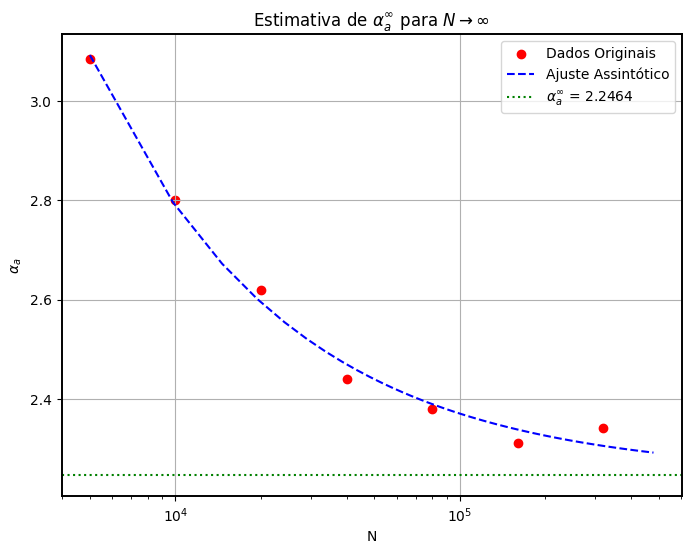

148.1587625579466


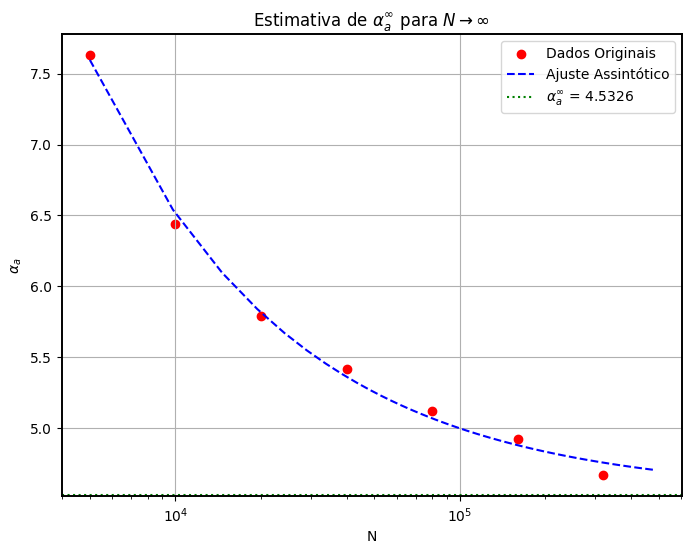

322.01364559936036


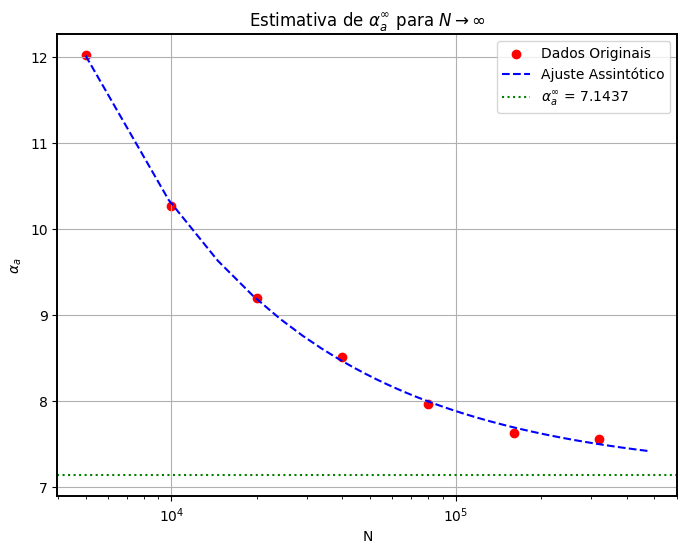

236.65894596865886


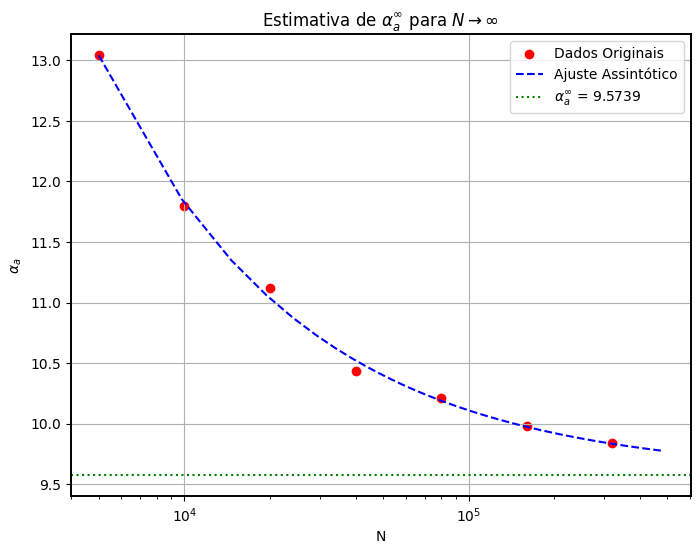

265.3422505070431


In [35]:
results_R_trans = {"dim":[], "alpha_a_infinity":[], "erro_alpha_a":[],
                   "C":[], "erro_C":[],"p":[],"erro_p":[],
                   "r_squared":[]}
dim = [1,2,3,4]
N_values = [[] for _ in range(len(dim))]
alpha_a_values = [[] for _ in range(len(dim))]

N_FIT = [[] for _ in range(len(dim))]
ALPHA_FIT = [[] for _ in range(len(dim))]

count = 0
for d in dim:
    df_d = df_int[df_int["dim"]==d]
    x = df_d["alpha_intercept"]
    y = df_d["N"]

    alpha_A_inf, c, P, err_alpha_A, err_c, err_P, R2, Nvalues, alphaA, N_fit, alpha_fit  = estimate_alpha_a_infinity(y, x)
    print(err_c)
    results_R_trans["dim"].append(d)
    results_R_trans["alpha_a_infinity"].append(alpha_A_inf)
    results_R_trans["erro_alpha_a"].append(err_alpha_A)
    results_R_trans["r_squared"].append(R2)
    
    results_R_trans["C"].append(c)
    results_R_trans["erro_C"].append(err_c)
    
    results_R_trans["p"].append(P)
    results_R_trans["erro_p"].append(err_P)
    
    N_values[count].append(Nvalues)
    alpha_a_values[count].append(alphaA)

    N_FIT[count].append(N_fit)
    ALPHA_FIT[count].append(alpha_fit)

    count += 1
    

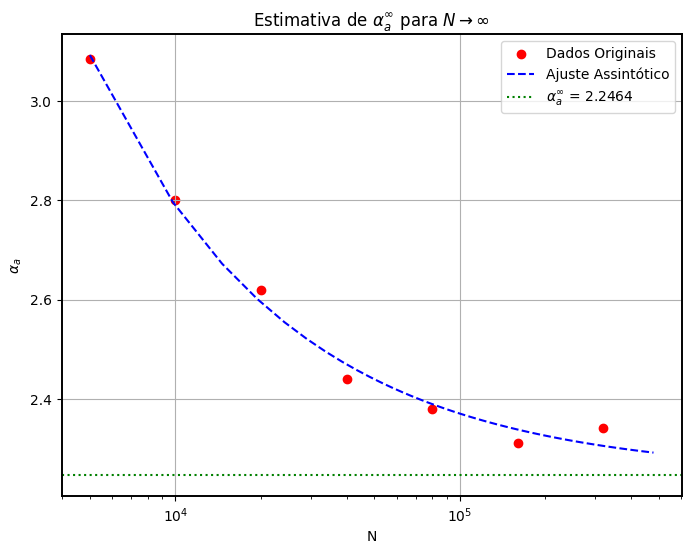

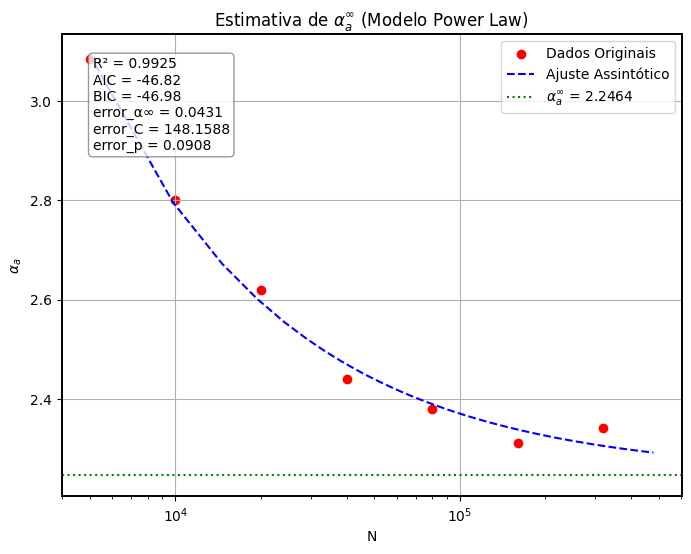

ValueError: too many values to unpack (expected 11)

In [36]:
results_R_trans = {"dim":[], "alpha_a_infinity":[], "erro_alpha_a":[],
                   "C":[], "erro_C":[],"p":[],"erro_p":[],
                   "r_squared":[]}
dim = [1,2,3,4]
N_values = [[] for _ in range(len(dim))]
alpha_a_values = [[] for _ in range(len(dim))]

N_FIT = [[] for _ in range(len(dim))]
ALPHA_FIT = [[] for _ in range(len(dim))]

count = 0
for d in dim:
    df_d = df_int[df_int["dim"]==d]
    x = df_d["alpha_intercept"]
    y = df_d["N"]
    estimate_alpha_a_infinity(y, x)
    
    
    alpha_a_infinity, C, p, error_alpha_a_infinity, error_C ,error_p ,r_squared, N_values, alpha_a_values, N_fit, alpha_fit  = estimate_alpha_a_infinity_power(y, x)
    
    results_R_trans["dim"].append(d)
    results_R_trans["alpha_a_infinity"].append(alpha_a_infinity)
    results_R_trans["erro_alpha_a"].append(error_alpha_a_infinity)
    results_R_trans["r_squared"].append(r_squared)
    
    results_R_trans["C"].append(C)
    results_R_trans["erro_C"].append(error_C)
    
    results_R_trans["p"].append(p)
    results_R_trans["erro_p"].append(error_p)
    
    N_values[count].append(N_values)
    alpha_a_values[count].append(alpha_a_values)

    N_FIT[count].append(N_fit)
    ALPHA_FIT[count].append(alpha_fit)

    count += 1
    

In [ ]:
results_R_trans = {"dim":[], "alpha_a_infinity":[], "erro_alpha_a":[],
                   "C":[], "erro_C":[],"p":[],"erro_p":[],
                   "r_squared":[]}
dim = [1,2,3,4]
N_values = [[] for _ in range(len(dim))]
alpha_a_values = [[] for _ in range(len(dim))]

N_FIT = [[] for _ in range(len(dim))]
ALPHA_FIT = [[] for _ in range(len(dim))]

count = 0
for d in dim:
    df_d = df_int[df_int["dim"]==d]
    x = df_d["alpha_intercept"]
    y = df_d["N"]

    T  = estimate_alpha_a_infinity_shifted(y,x)
    print(T[3],T[4],T[5])


In [ ]:
results_R_trans = {"dim":[], "alpha_a_infinity":[], "erro_alpha_a":[],
                   "C":[], "erro_C":[],"p":[],"erro_p":[],
                   "r_squared":[]}
dim = [1,2,3,4]
N_values = [[] for _ in range(len(dim))]
alpha_a_values = [[] for _ in range(len(dim))]

N_FIT = [[] for _ in range(len(dim))]
ALPHA_FIT = [[] for _ in range(len(dim))]

count = 0
for d in dim:
    df_d = df_int[df_int["dim"]==d]
    x = df_d["alpha_intercept"]
    y = df_d["N"]

    T  = estimate_alpha_a_infinity_log(y,x)
    print(T[3],T[4],T[5])


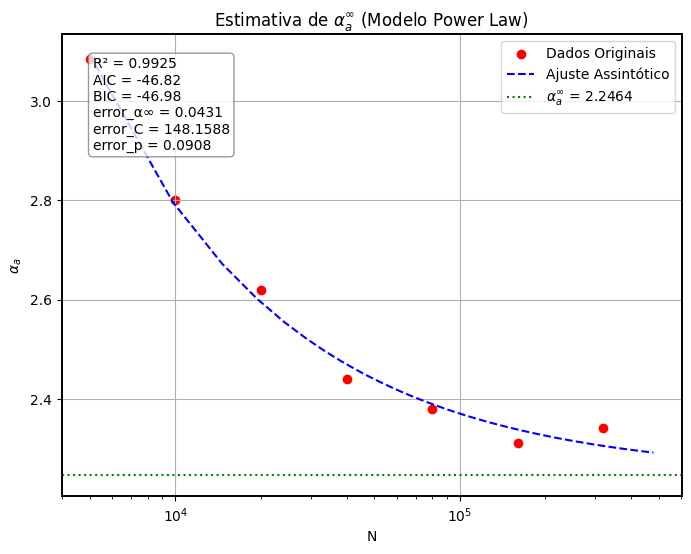

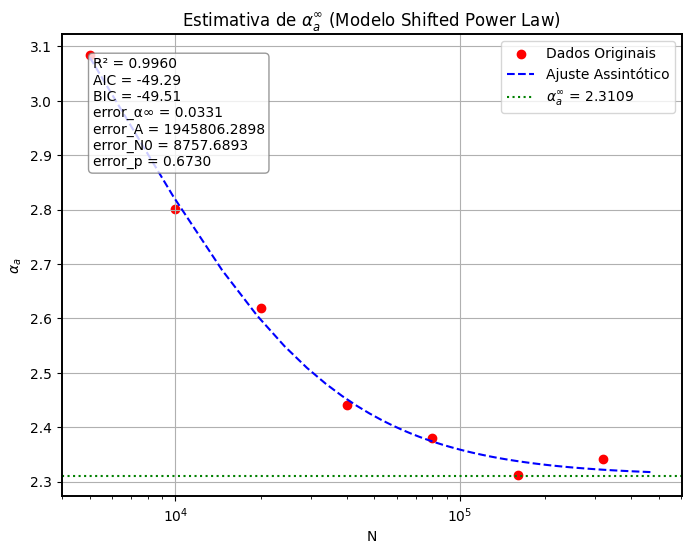

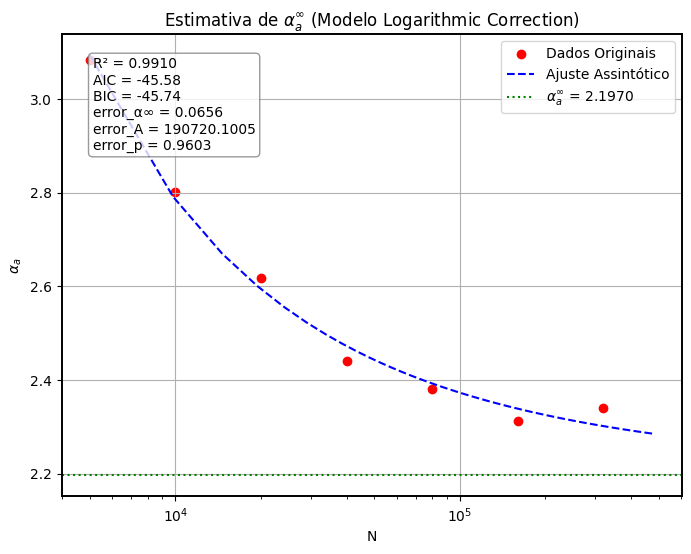

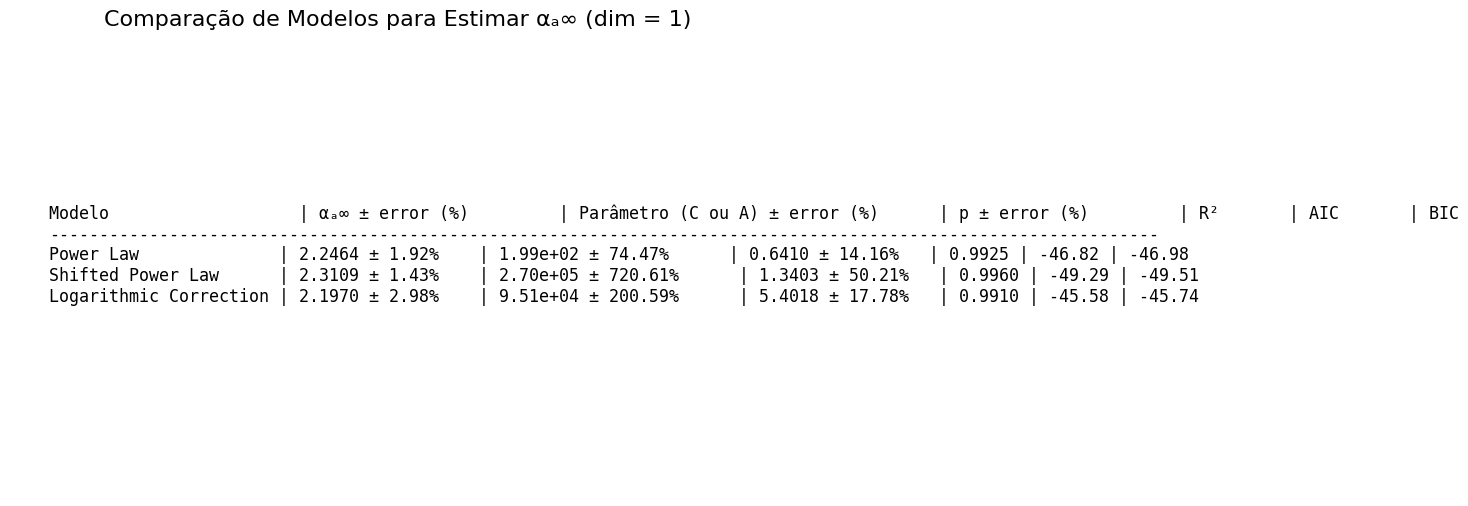

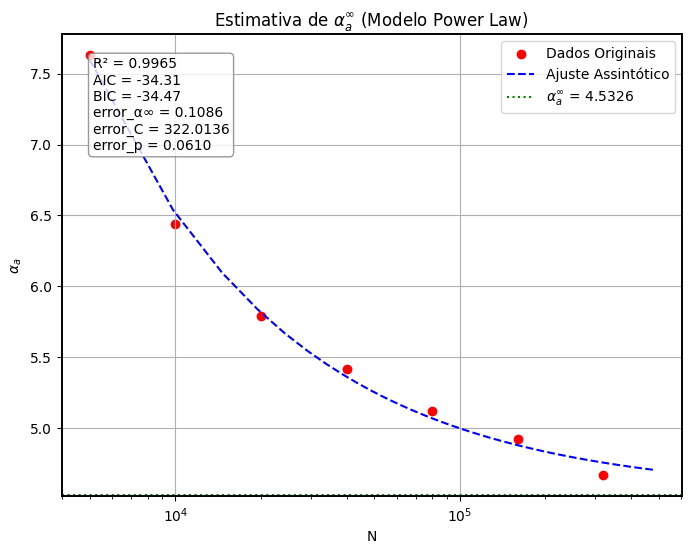

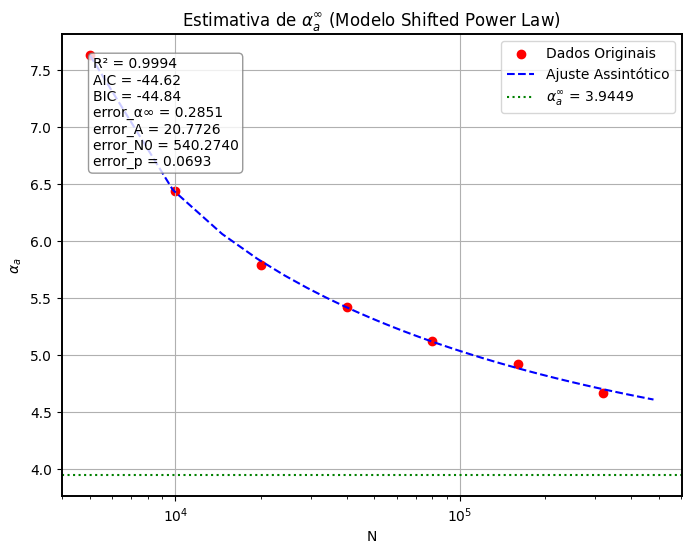

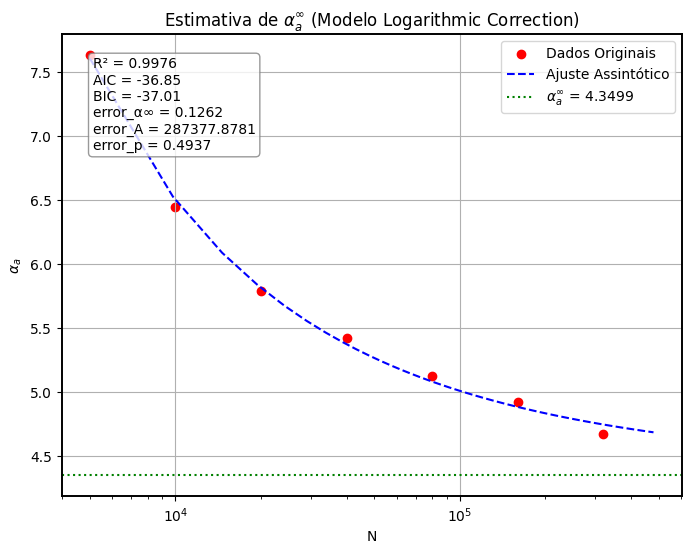

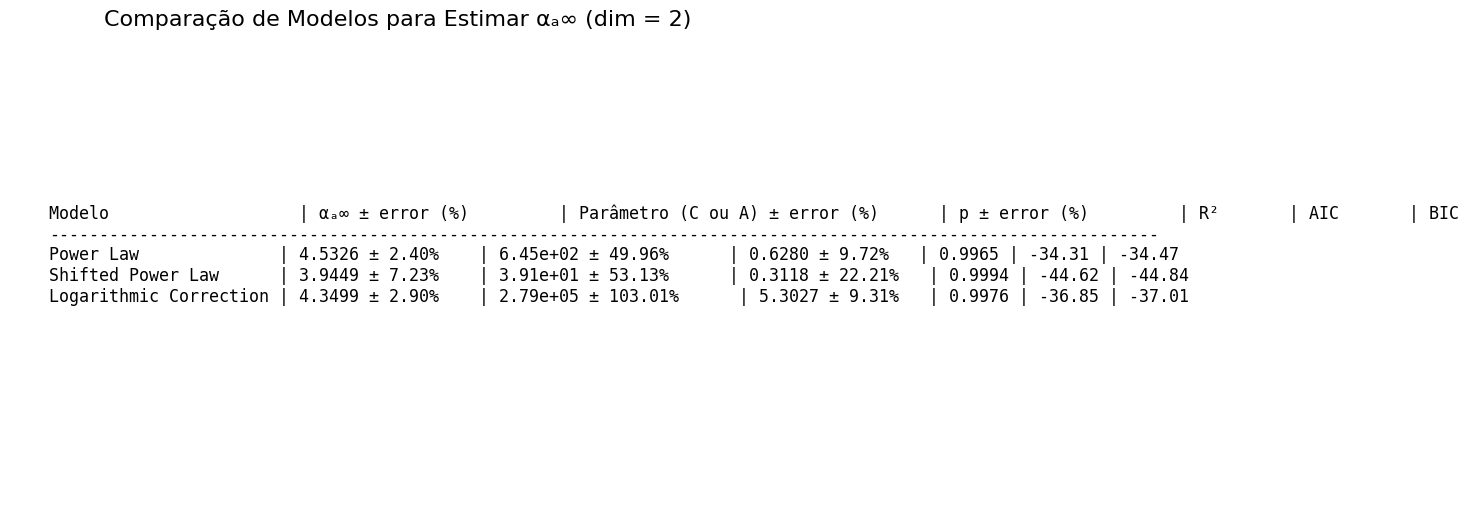

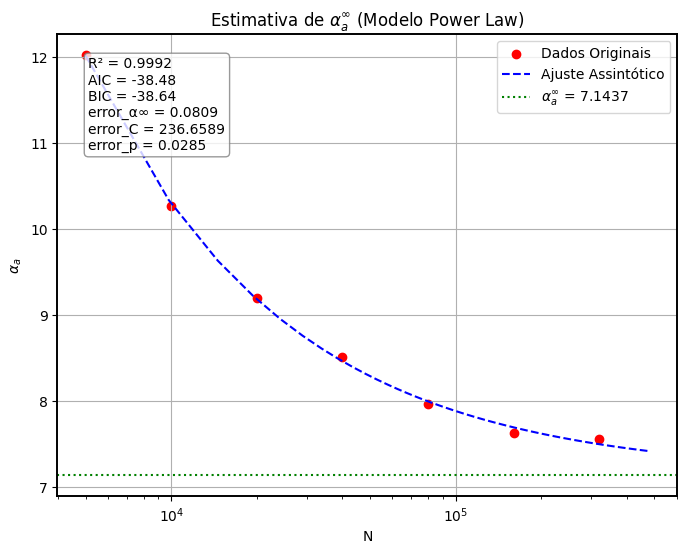

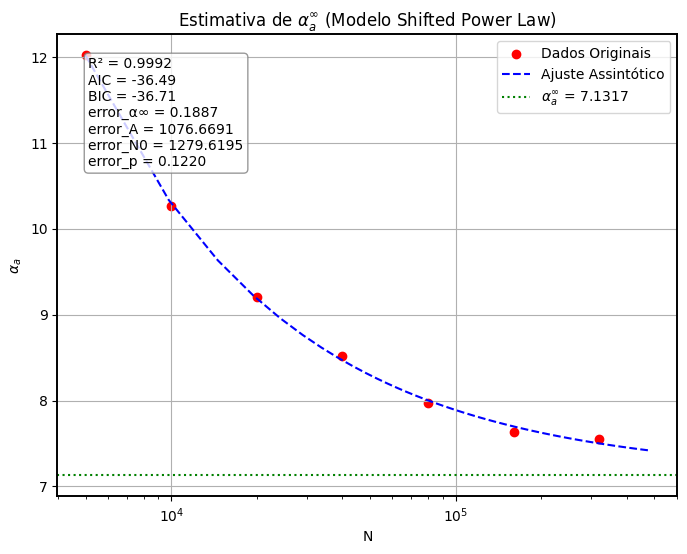

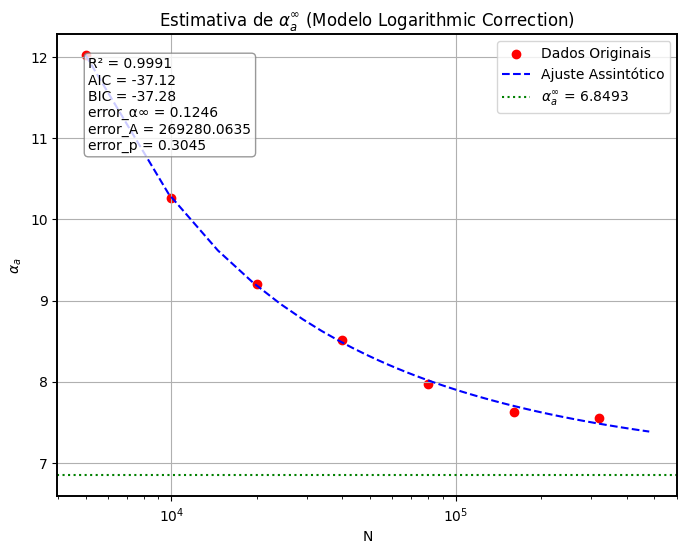

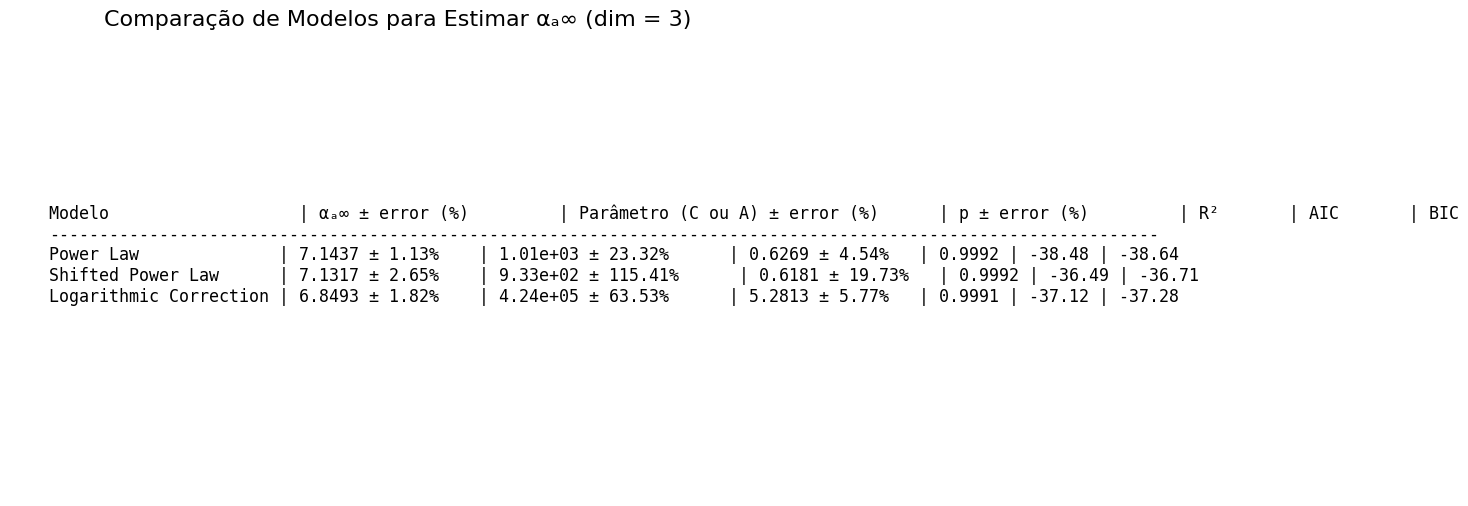

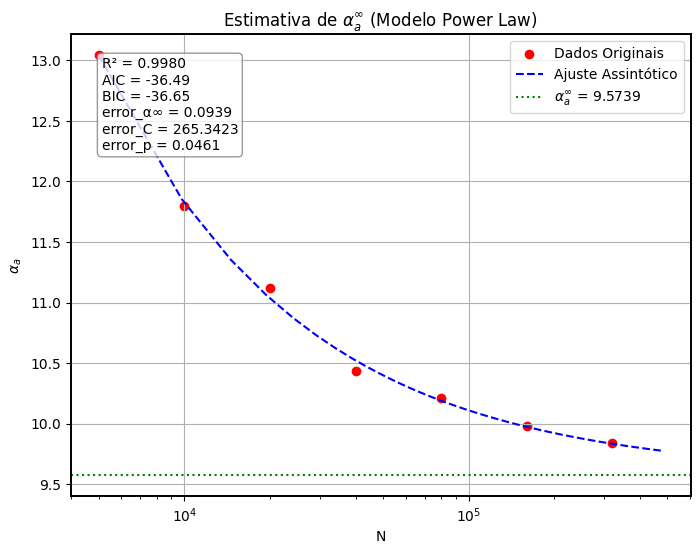

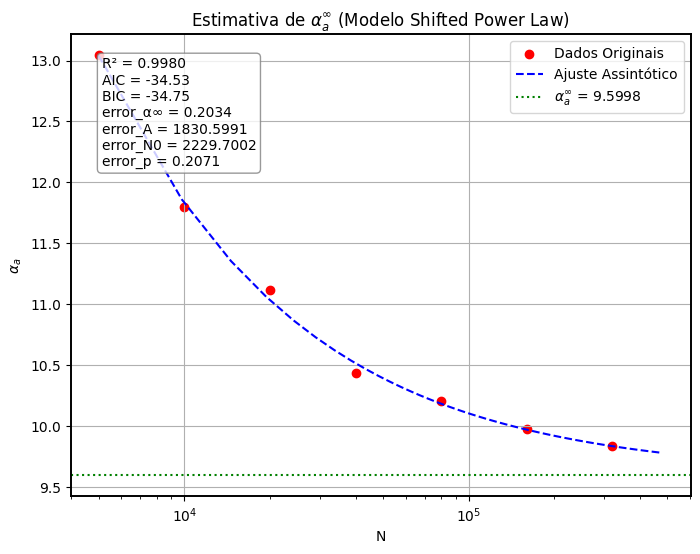

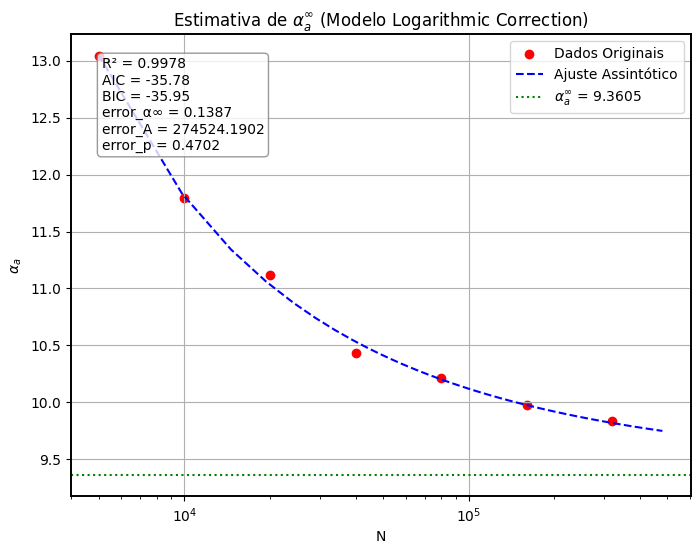

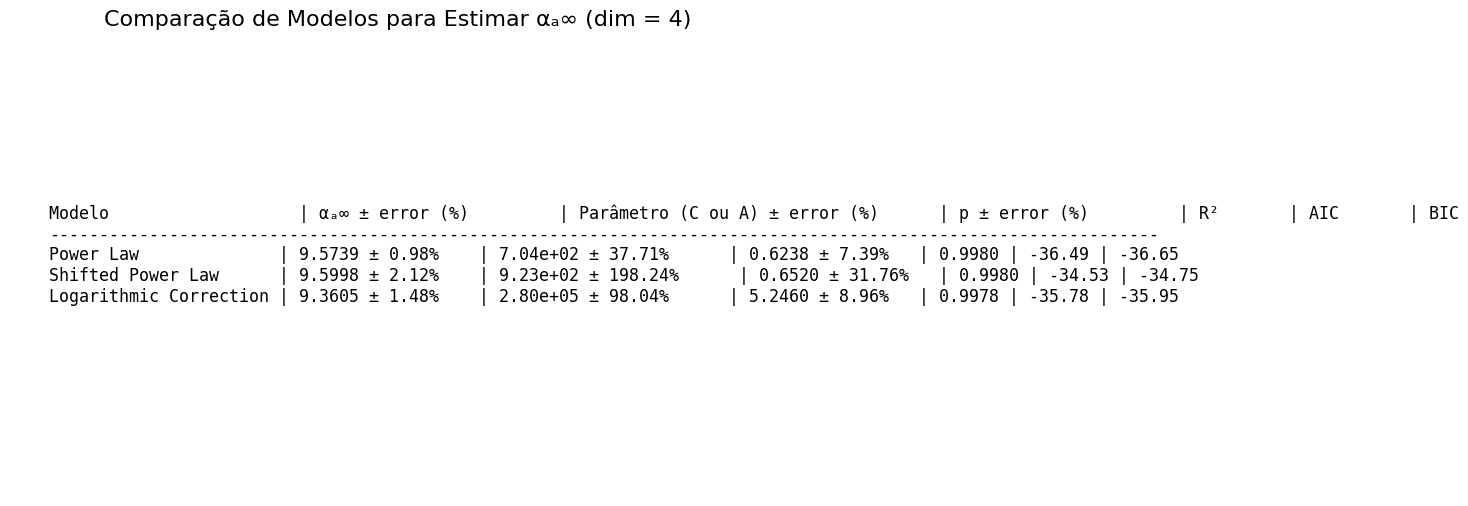

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Suponha que 'dim' seja uma lista com as dimensões e 'df_int' seu DataFrame com os dados.
# Exemplo:
# dim = [1, 2, 3, 4]
# df_int = pd.read_csv("seus_dados.csv")

for d in dim:
    df_d = df_int[df_int["dim"] == d]
    alpha_a_values = df_d["alpha_intercept"].values
    N_values = df_d["N"].values

    # Suponha que as funções abaixo já estejam definidas conforme o código anterior:
    # estimate_alpha_a_infinity_power, estimate_alpha_a_infinity_shifted, estimate_alpha_a_infinity_log

    # Chama cada função para obter os resultados
    res_power = estimate_alpha_a_infinity_power(N_values, alpha_a_values)
    res_shifted = estimate_alpha_a_infinity_shifted(N_values, alpha_a_values)
    res_log = estimate_alpha_a_infinity_log(N_values, alpha_a_values)

    # Desempacota os resultados para cada modelo
    (alpha_inf_power, C_power, p_power, error_alpha_inf_power, error_C_power, error_p_power,
     r_squared_power, AIC_power, BIC_power, _, _, _, _) = res_power

    (alpha_inf_shifted, A_shifted, N0_shifted, p_shifted, error_alpha_inf_shifted, error_A_shifted,
     error_N0_shifted, error_p_shifted, r_squared_shifted, AIC_shifted, BIC_shifted, _, _, _, _) = res_shifted

    (alpha_inf_log, A_log, p_log, error_alpha_inf_log, error_A_log, error_p_log,
     r_squared_log, AIC_log, BIC_log, _, _, _, _) = res_log

    # Cria uma figura para exibir a tabela comparativa
    plt.figure(figsize=(10, 6))
    plt.axis('off')
    plt.title(f"Comparação de Modelos para Estimar αₐ∞ (dim = {d})", fontsize=16)

    # Converte os erros para porcentagem (error/valor*100)
    err_alpha_power_pct = error_alpha_inf_power / alpha_inf_power * 100 if alpha_inf_power != 0 else 0
    err_C_power_pct     = error_C_power / C_power * 100 if C_power != 0 else 0
    err_p_power_pct     = error_p_power / p_power * 100 if p_power != 0 else 0

    err_alpha_shifted_pct = error_alpha_inf_shifted / alpha_inf_shifted * 100 if alpha_inf_shifted != 0 else 0
    err_A_shifted_pct     = error_A_shifted / A_shifted * 100 if A_shifted != 0 else 0
    err_p_shifted_pct     = error_p_shifted / p_shifted * 100 if p_shifted != 0 else 0

    err_alpha_log_pct = error_alpha_inf_log / alpha_inf_log * 100 if alpha_inf_log != 0 else 0
    err_A_log_pct     = error_A_log / A_log * 100 if A_log != 0 else 0
    err_p_log_pct     = error_p_log / p_log * 100 if p_log != 0 else 0

    # Cria uma string com os dados em formato de tabela.
    table_text = (
        "Modelo                   | αₐ∞ ± error (%)         | Parâmetro (C ou A) ± error (%)      | p ± error (%)         | R²       | AIC       | BIC\n"
        "---------------------------------------------------------------------------------------------------------------\n"
        f"Power Law              | {alpha_inf_power:.4f} ± {err_alpha_power_pct:.2f}%    | {C_power:.2e} ± {err_C_power_pct:.2f}%      | {p_power:.4f} ± {err_p_power_pct:.2f}%   | {r_squared_power:.4f} | {AIC_power:.2f} | {BIC_power:.2f}\n"
        f"Shifted Power Law      | {alpha_inf_shifted:.4f} ± {err_alpha_shifted_pct:.2f}%    | {A_shifted:.2e} ± {err_A_shifted_pct:.2f}%      | {p_shifted:.4f} ± {err_p_shifted_pct:.2f}%   | {r_squared_shifted:.4f} | {AIC_shifted:.2f} | {BIC_shifted:.2f}\n"
        f"Logarithmic Correction | {alpha_inf_log:.4f} ± {err_alpha_log_pct:.2f}%    | {A_log:.2e} ± {err_A_log_pct:.2f}%      | {p_log:.4f} ± {err_p_log_pct:.2f}%   | {r_squared_log:.4f} | {AIC_log:.2f} | {BIC_log:.2f}\n"
    )

    # Exibe a tabela no plot utilizando uma fonte monoespaçada para alinhamento
    plt.text(0.05, 0.5, table_text, fontsize=12, family="monospace", va="center", ha="left")
    plt.show()


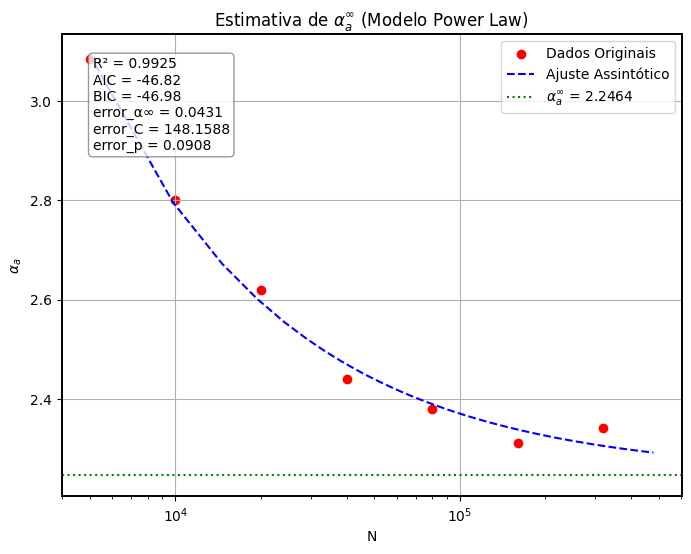

148.1587625579466 0.09075254545944565 0.9924797967200124 -46.81751157602784


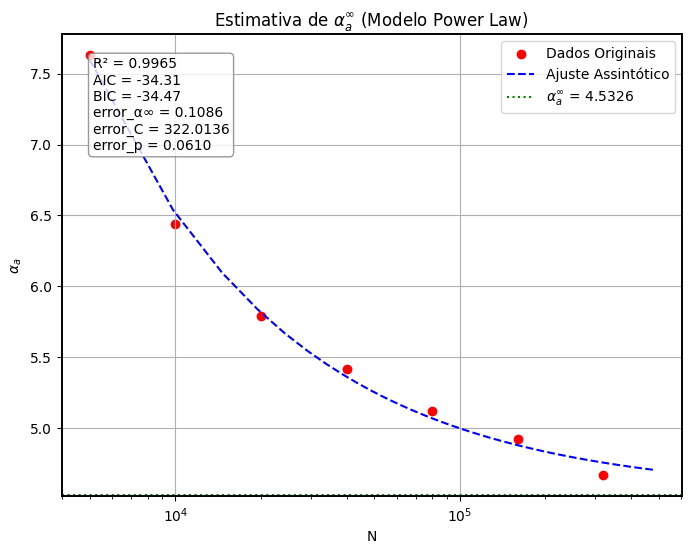

322.01364559936036 0.061018541363953446 0.9965310114373365 -34.31244539613697


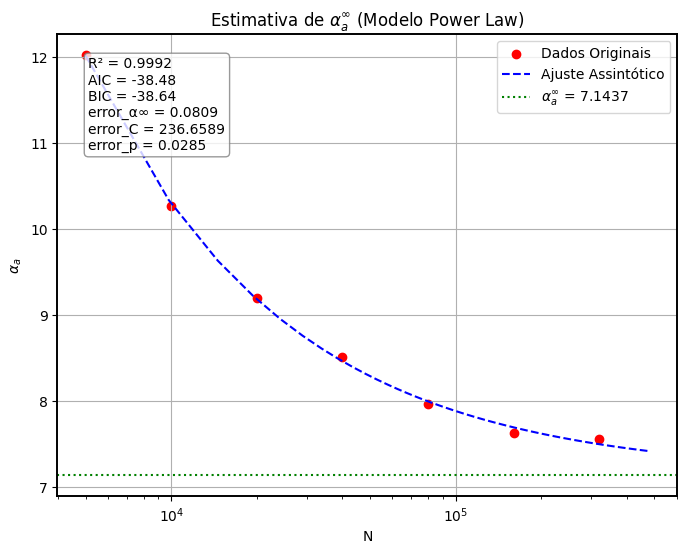

236.65894596865886 0.028488789547942345 0.9992406689528027 -38.47715790244769


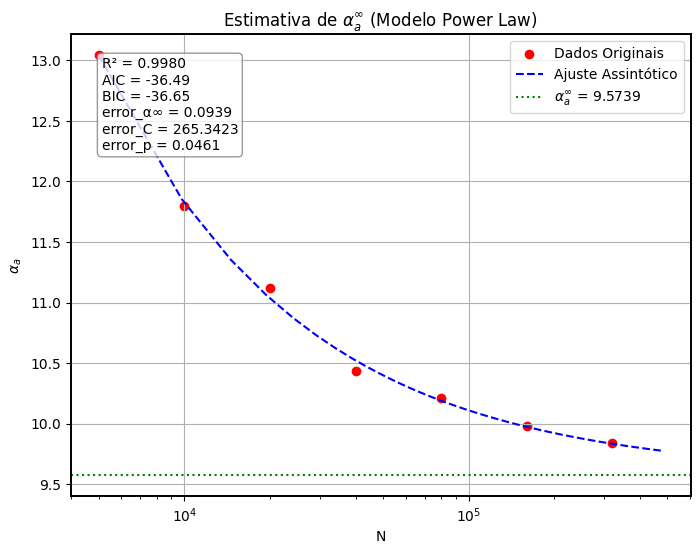

265.3422505070431 0.0460870897021539 0.9980077430034268 -36.48886361063981


In [38]:
results_R_trans = {"dim":[], "alpha_a_infinity":[], "erro_alpha_a":[],
                   "C":[], "erro_C":[],"p":[],"erro_p":[],
                   "r_squared":[]}
dim = [1,2,3,4]
N_values = [[] for _ in range(len(dim))]
alpha_a_values = [[] for _ in range(len(dim))]

N_FIT = [[] for _ in range(len(dim))]
ALPHA_FIT = [[] for _ in range(len(dim))]

count = 0
for d in dim:
    df_d = df_int[df_int["dim"]==d]
    x = df_d["alpha_intercept"]
    y = df_d["N"]

    T  = estimate_alpha_a_infinity_power(y, x)
    print(T[4],T[5],T[6],T[7])
    # results_R_trans["dim"].append(d)
    # results_R_trans["alpha_a_infinity"].append(alpha_A_inf)
    # results_R_trans["erro_alpha_a"].append(err_alpha_A)
    # results_R_trans["r_squared"].append(R2)
    
    # results_R_trans["C"].append(c)
    # results_R_trans["erro_C"].append(err_c)
    
    # results_R_trans["p"].append(P)
    # results_R_trans["erro_p"].append(err_P)
    
    # N_values[count].append(Nvalues)
    # alpha_a_values[count].append(alphaA)

    # N_FIT[count].append(N_fit)
    # ALPHA_FIT[count].append(alpha_fit)

    # count += 1
    

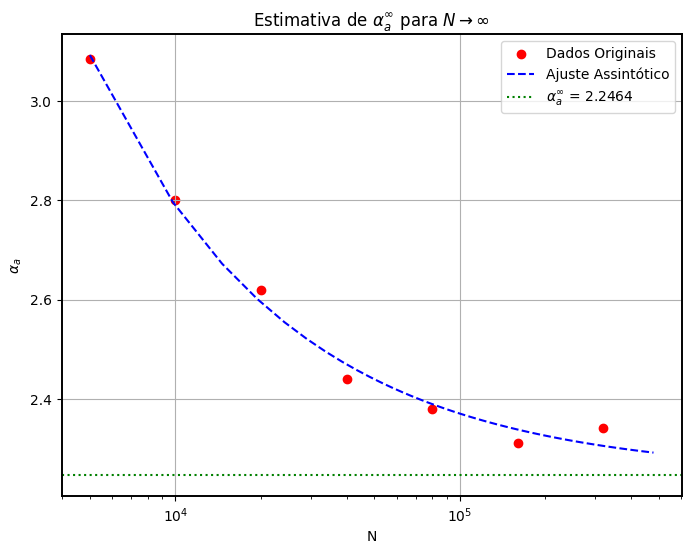

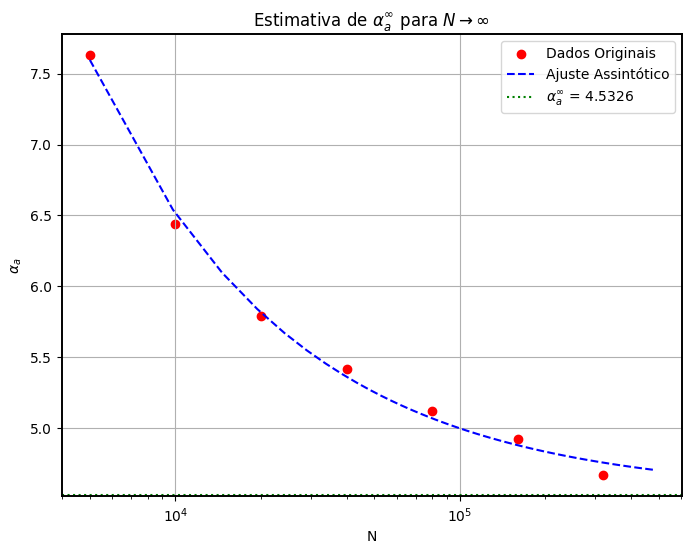

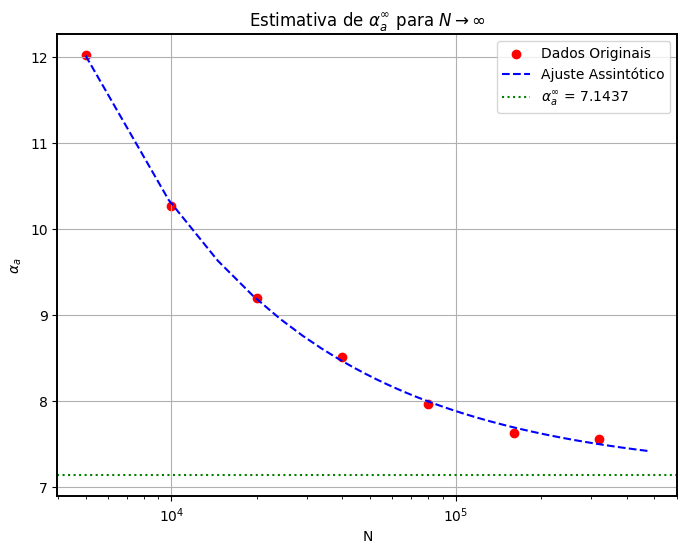

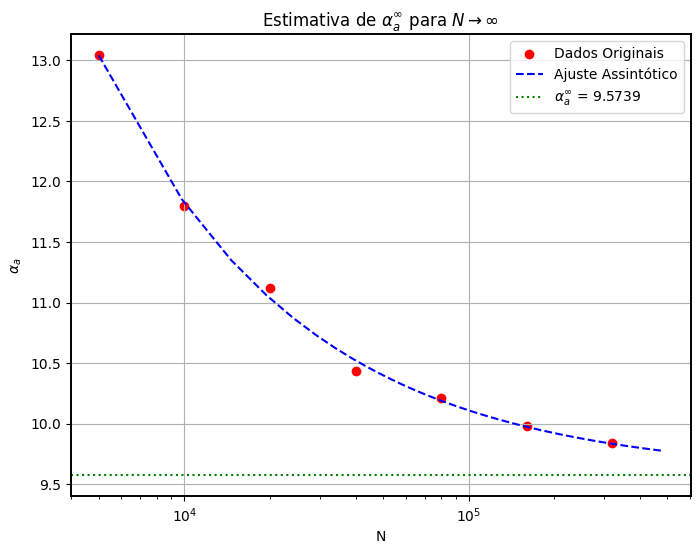

In [39]:
results_R_trans = {"dim":[], "alpha_a_infinity":[], "erro_alpha_a":[],
                   "C":[], "erro_C":[],"p":[],"erro_p":[],
                   "r_squared":[]}
dim = [1,2,3,4]
N_values = [[] for _ in range(len(dim))]
alpha_a_values = [[] for _ in range(len(dim))]

N_FIT = [[] for _ in range(len(dim))]
ALPHA_FIT = [[] for _ in range(len(dim))]

count = 0
for d in dim:
    df_d = df_int[df_int["dim"]==d]
    x = df_d["alpha_intercept"]
    y = df_d["N"]
    #estimate_alpha_a_infinity(y, x)
    
    #alpha_a_infinity, C, p, error_alpha_a_infinity, error_C ,error_p ,r_squared, N_values, alpha_a_values, N_fit, alpha_fit
    
    alpha_a_infinity, C, p, error_alpha_a_infinity, error_C ,error_p ,r_squared, Nv, alpha_aV, N_fit, alpha_fit  = estimate_alpha_a_infinity(y, x)
    
    
    #T  = estimate_alpha_a_infinity_power(y, x)
    results_R_trans["dim"].append(d)
    results_R_trans["alpha_a_infinity"].append(alpha_a_infinity)
    results_R_trans["erro_alpha_a"].append(error_alpha_a_infinity)
    results_R_trans["r_squared"].append(r_squared)
    
    results_R_trans["C"].append(C)
    results_R_trans["erro_C"].append(error_C)
    
    results_R_trans["p"].append(p)
    results_R_trans["erro_p"].append(error_p)
    
    N_values[count].append(Nv)
    alpha_a_values[count].append(alpha_aV)

    N_FIT[count].append(N_fit)
    ALPHA_FIT[count].append(alpha_fit)

    count += 1
    

In [54]:
import math

dfll = pd.DataFrame(data=results_R_trans)
dfll

def round_to_first_nonzero(value, error):
    """
    Arredonda o erro para 1 algarismo significativo (usando a posição do primeiro dígito não nulo)
    e arredonda o valor com a mesma quantidade de casas decimais.
    """
    if error == 0:
        return value, error
    # Determina a potência de 10 do primeiro dígito não nulo
    exponent = math.floor(math.log10(abs(error)))
    decimals = -exponent  # número de casas decimais para arredondar
    rounded_error = round(error, decimals)
    rounded_value = round(value, decimals)
    return rounded_value, rounded_error

# Aplica o arredondamento para os pares: (alpha_a_infinity, erro_alpha_a), (C, erro_C) e (p, erro_p)
dfll[['alpha_a_infinity', 'erro_alpha_a']] = dfll.apply(
    lambda row: pd.Series(round_to_first_nonzero(row['alpha_a_infinity'], row['erro_alpha_a'])),
    axis=1
)
dfll[['C', 'erro_C']] = dfll.apply(
    lambda row: pd.Series(round_to_first_nonzero(row['C'], row['erro_C'])),
    axis=1
)
dfll[['p', 'erro_p']] = dfll.apply(
    lambda row: pd.Series(round_to_first_nonzero(row['p'], row['erro_p'])),
    axis=1
)
dfll

dim  alpha_a_infinity  erro_alpha_a       C  erro_C     p  erro_p  \
0    1              2.25          0.04   200.0   100.0  0.64    0.09   
1    2              4.50          0.10   600.0   300.0  0.63    0.06   
2    3              7.14          0.08  1000.0   200.0  0.63    0.03   
3    4              9.57          0.09   700.0   300.0  0.62    0.05   

   r_squared  
0   0.992480  
1   0.996531  
2   0.999241  
3   0.998008

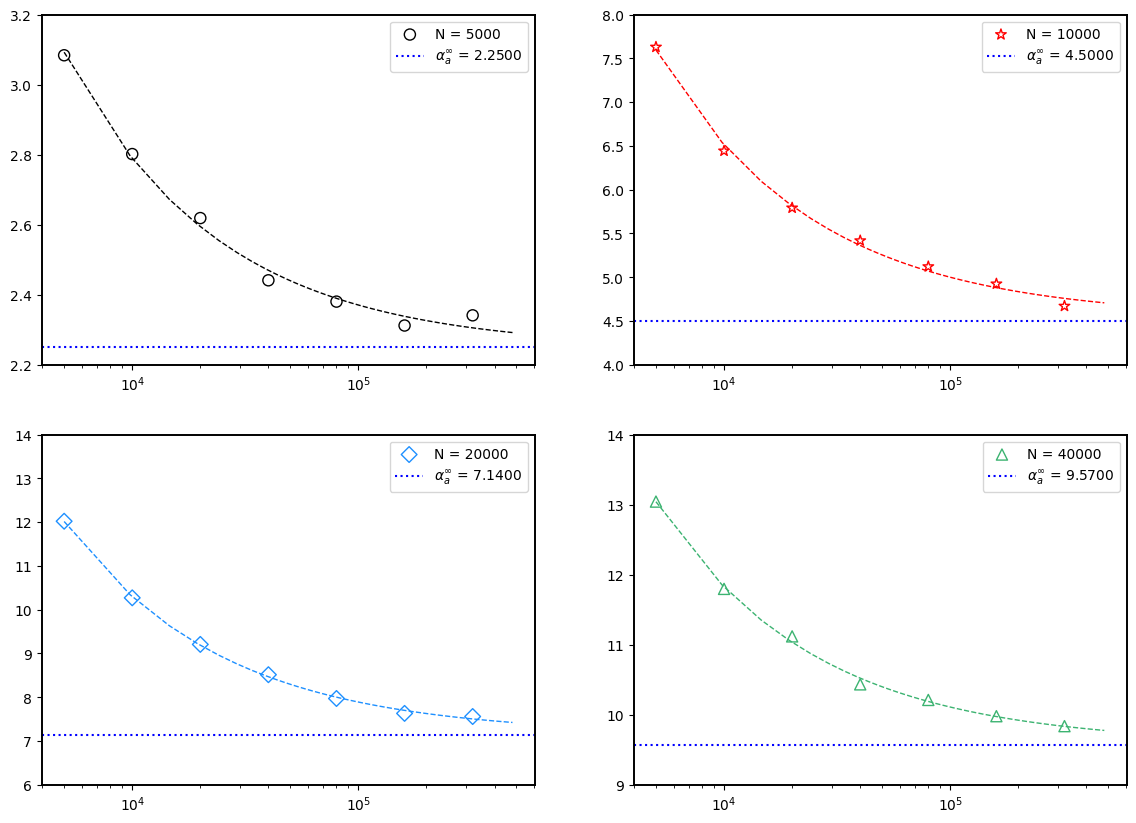

In [41]:
# Supondo que as variáveis N, N_FIT, ALPHA_FIT, N_values, alpha_a_values e dfll já estejam definidas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Facilita o acesso aos subplots com índice linear

labels = [f"N = {n}" for n in N]
markersize = 8
dimensions = [1, 2, 3, 4]
markers = ["o", "*", "D", "^"]
colors = ["#000000", "#FF0000", "#1E90FF", "#3CB371"]

# Define os limites do eixo y para cada subplot
y_limits = [[2.2, 3.2], [4.0, 8.0], [6.0, 14.0], [9.0, 14.0]]

for i, ax in enumerate(axes):
    
    idx = np.argsort(N_FIT[i])
    N_fit_sorted = np.array(N_FIT[i]).flatten()[idx.flatten()]
    alpha_fit_sorted = np.array(ALPHA_FIT[i]).flatten()[idx.flatten()]
    
    # Plota a curva de ajuste
    ax.plot(N_fit_sorted, alpha_fit_sorted, '--', linewidth=1.0, color=colors[i])
    # Plota os pontos
    ax.scatter(N_values[i], alpha_a_values[i], marker=markers[i],
               label=labels[i], s=markersize**2, facecolors='none', edgecolors=colors[i])
    # Plota a linha horizontal representando alpha_a infinito,
    # utilizando aspas simples para evitar conflito com a formatação do f-string
    ax.axhline(y=dfll['alpha_a_infinity'][i], color='b', linestyle=":",
               label=f"$\\alpha_a^\\infty$ = {dfll['alpha_a_infinity'][i]:.4f}")
    ax.set_xscale("log")
    # Define os limites do eixo y conforme a lista y_limits
    ax.set_ylim(y_limits[i])
    ax.legend()

plt.savefig("teste.pdf")
plt.show()


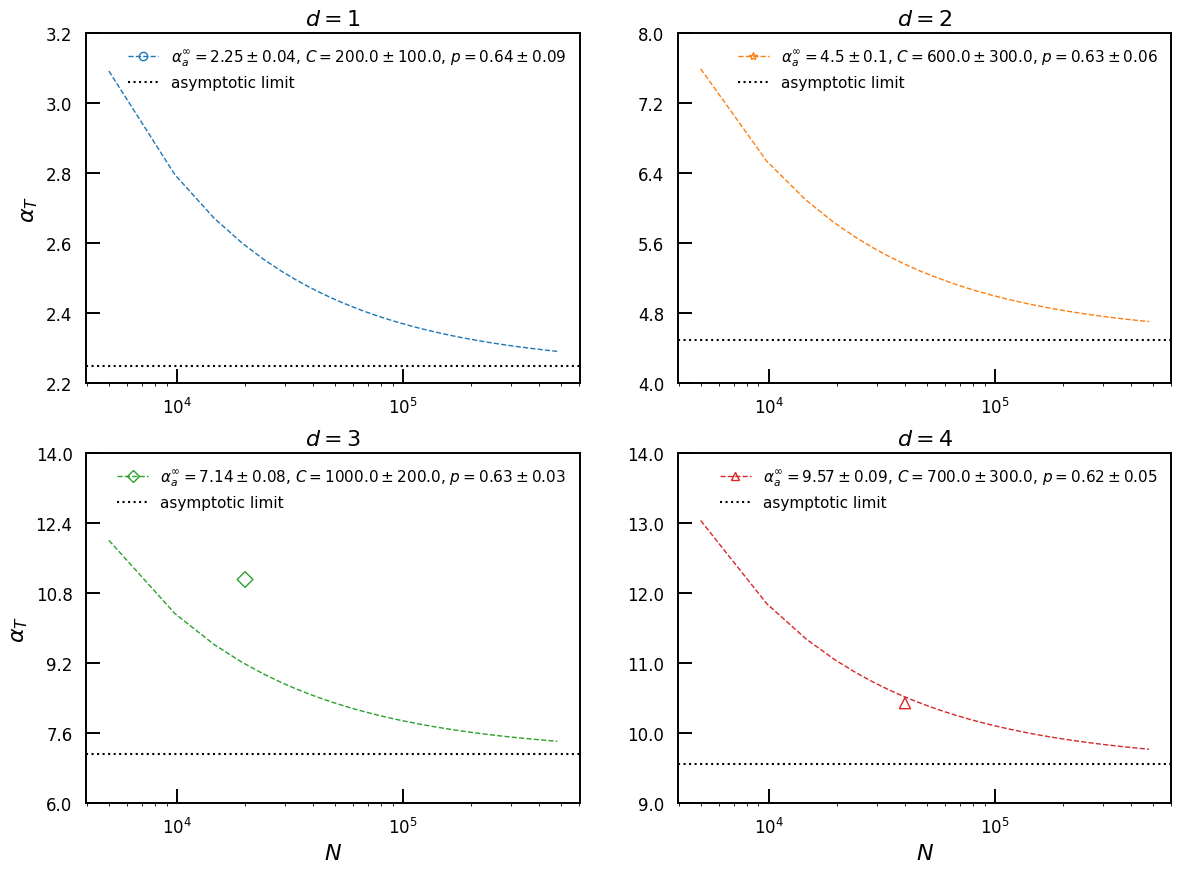

In [ ]:
from matplotlib.lines import Line2D
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Facilita o acesso aos subplots com índice linear

labels = [f"N = {n}" for n in N]
markersize = 8
dimensions = [1, 2, 3, 4]
markers = ["o", "*", "D", "^"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Define os limites do eixo y para cada subplot
y_limits = [[2.2, 3.2], [4.0, 8.0], [6.0, 14.0], [9.0, 14.0]]

for i, ax in enumerate(axes):
    
    # Ordena os dados para o ajuste
    idx = np.argsort(N_FIT[i])
    N_fit_sorted = np.array(N_FIT[i]).flatten()[idx.flatten()]
    alpha_fit_sorted = np.array(ALPHA_FIT[i]).flatten()[idx.flatten()]
    
    # Plota a curva de ajuste
    ax.plot(N_fit_sorted, alpha_fit_sorted, '--', linewidth=1.0, color=colors[i])
    # Plota os pontos
    ax.scatter(N_values[i], alpha_a_values[i], marker=markers[i],
               label=labels[i], s=markersize**2, facecolors='none', edgecolors=colors[i])
    # Plota a linha horizontal representando alpha_a infinito
    ax.axhline(y=dfll['alpha_a_infinity'][i], color='#000000', linestyle=":",
               label="asymptotic limit")
    
    ax.set_xscale("log")
    ax.set_ylim(y_limits[i])
    
    # Define 6 ticks igualmente espaçados no eixo y
    ticks_y = np.linspace(y_limits[i][0], y_limits[i][1], 6)
    ax.set_yticks(ticks_y)
    # Formata os rótulos dos ticks do eixo y para terem 1 casa decimal
    ax.set_yticklabels([f"{tick:.1f}" for tick in ticks_y])
    
    # Cria a legenda especial combinando os símbolos
    df_d = dfll[dfll["dim"] == dimensions[i]]
    # Extraímos os valores (assumindo que há um único valor por dimensão)
    a_inf, err_a_inf = df_d["alpha_a_infinity"].values, df_d["erro_alpha_a"].values
    C, err_C = df_d["C"].values, df_d["erro_C"].values
    p, err_p = df_d["p"].values, df_d["erro_p"].values
    
    special_label = (f"$\\alpha_a^\\infty = {a_inf[0]} \\pm {err_a_inf[0]}$, "
                     f"$C = {C[0]} \\pm {err_C[0]}$, "
                     f"$p = {p[0]} \\pm {err_p[0]}$")
    
    # Cria um handle combinando marker e linha de ajuste para a legenda especial
    special_handle = Line2D([0], [0], marker=markers[i], color=colors[i],
                            linestyle='--', linewidth=1.0, markerfacecolor='none',
                            label=special_label)
    
    # Cria um handle para a linha horizontal
    axh_line_handle = Line2D([0], [0], color='#000000', linestyle=":", label="asymptotic limit")
    
    ax.tick_params('both', width=1.4, length=10, labelsize=12, direction='in', pad=10)
    ax.set_title(f"$d = {dimensions[i]}$", size=16)
    
    # Adiciona label no eixo x para os subplots da linha inferior
    if i in [2, 3]:
        ax.set_xlabel(r"$N$", size=16)
    # Adiciona label no eixo y para os subplots da coluna da esquerda
    if i in [0, 2]:
        ax.set_ylabel(r"$\alpha_T$", size=16)
    
    # Define a legenda combinando os handles do special_handle e do axhline
    ax.legend(handles=[special_handle, axh_line_handle], fontsize=11, fancybox=True, framealpha=0.0)

plt.savefig("../../results/alpha_a/R_transition_N.pdf", dpi=300)
plt.show()

/tmp/ipykernel_52029/2083680183.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y.append(float(a_inf))
/tmp/ipykernel_52029/2083680183.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  err_y.append(float(err_a_inf))


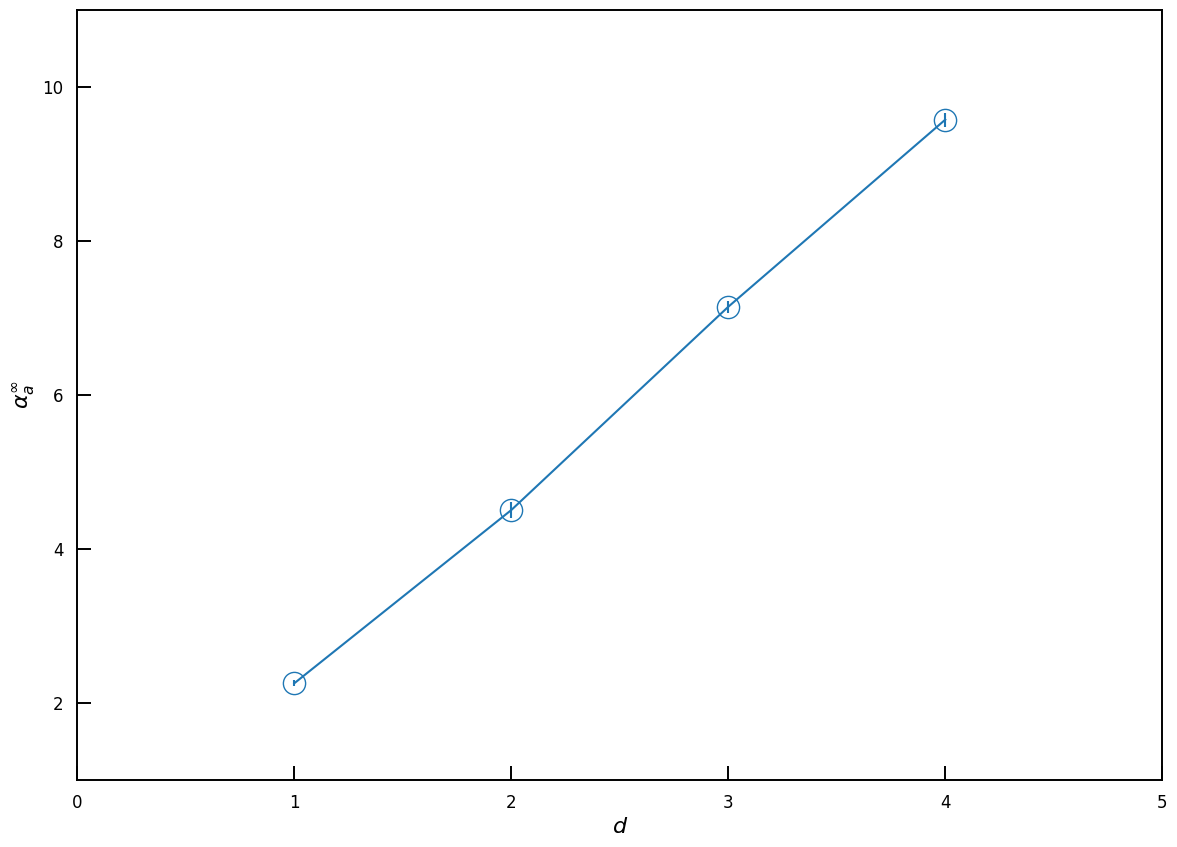

In [69]:
from matplotlib.lines import Line2D
import numpy as np

fig, ax = plt.subplots(figsize=(14, 10))


labels = [f"N = {n}" for n in N]
markersize = 8
dimensions = [1, 2, 3, 4]
markers = ["o", "*", "D", "^"]
markersize=16
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
x = []
y = []
err_y = []
for i in range(len(dimensions)):
    df_d = dfll[dfll["dim"] == dimensions[i]]
    # Extraímos os valores (assumindo que há um único valor por dimensão)
    a_inf, err_a_inf = df_d["alpha_a_infinity"].values, df_d["erro_alpha_a"].values
    x.append(dimensions[i])
    y.append(float(a_inf))
    err_y.append(float(err_a_inf))

ax.errorbar(x, y,
        yerr=err_y, linestyle='-', marker='o', markersize=markersize, markerfacecolor='none')
ax.set_xlim([0.0, 5.0])
ax.set_ylim([1.0, 11.0])
ax.set_xlabel("$d$",size=16)
ax.set_ylabel(r"$\alpha_a^{\infty}$",size=16)
ax.tick_params('both', width=1.4, length=10, labelsize=12, direction='in', pad=10)
plt.savefig("../../results/d_alpha_a_infty.pdf")
plt.show()


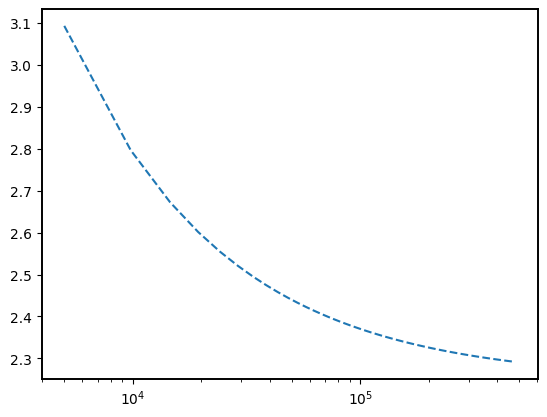

In [43]:
#print(ALPHA_FIT[0], N_FIT[0])
idx = np.argsort(N_FIT[0])
N_fit_sorted = np.array(N_FIT[0]).flatten()[idx.flatten()]
alpha_fit_sorted = np.array(ALPHA_FIT[0]).flatten()[idx.flatten()]
# print(idx)
# N_fit_sorted = np.array(N_FIT[0])[idx]

# alpha_fit_sorted = np.array(ALPHA_FIT[0])[idx]

#plt.scatter(N_FIT[1], ALPHA_FIT[1])
#plt.plot(N_FIT[1], ALPHA_FIT[1])
# for i in range(len(dimensions)):
#     plt.plot(N_FIT[i], ALPHA_FIT[i],  linewidth=2.0)
#plt.savefig("plot.pdf")
#plt.show()

# Opção 1: Flatten no array e no índice
N_fit_sorted = np.array(N_FIT[0]).flatten()[idx.flatten()]
alpha_fit_sorted = np.array(ALPHA_FIT[0]).flatten()[idx.flatten()]

plt.plot(N_fit_sorted, alpha_fit_sorted, '--')
plt.xscale("log")
plt.show()
#plt.plot(N_FIT[0], ALPHA_FIT[0],  linewidth=2.0)
#plt.show()
# Opção 2: Se N_FIT[0] tem shape (1, n), indexe na linha 0:
#N_fit_sorted = np.array(N_FIT[0])[0, idx.flatten()]
#alpha_fit_sorted = np.array(ALPHA_FIT[0])[0, idx.flatten()]




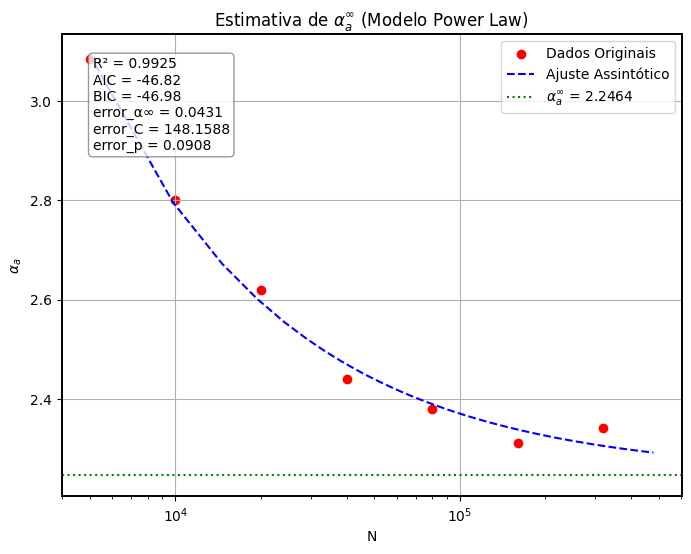

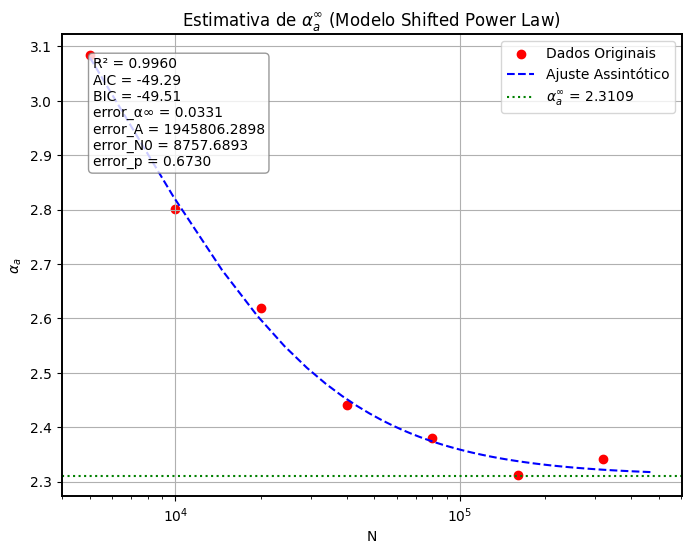

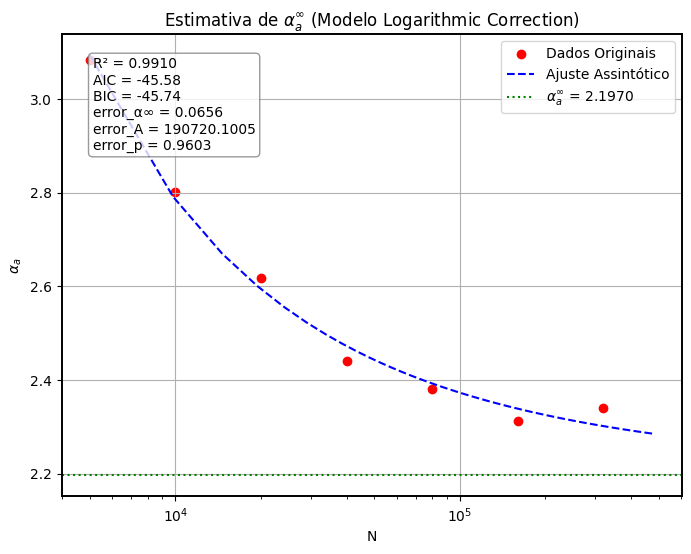

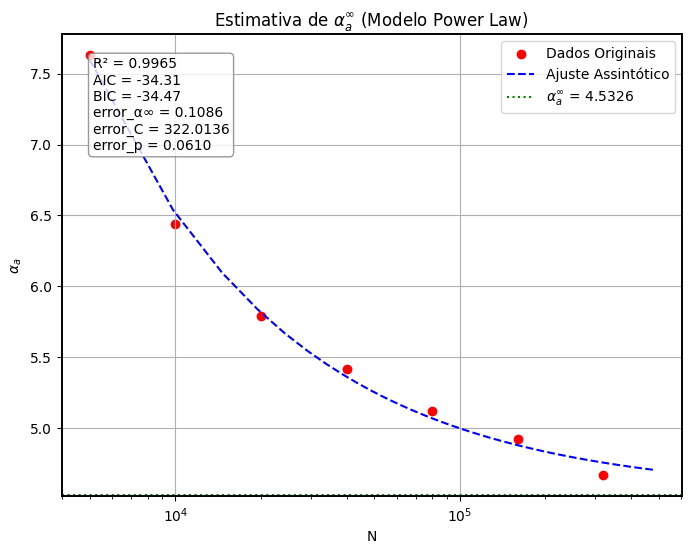

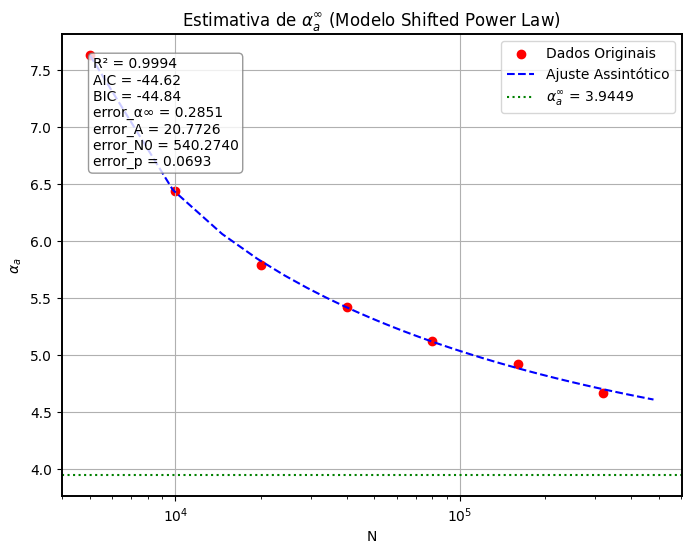

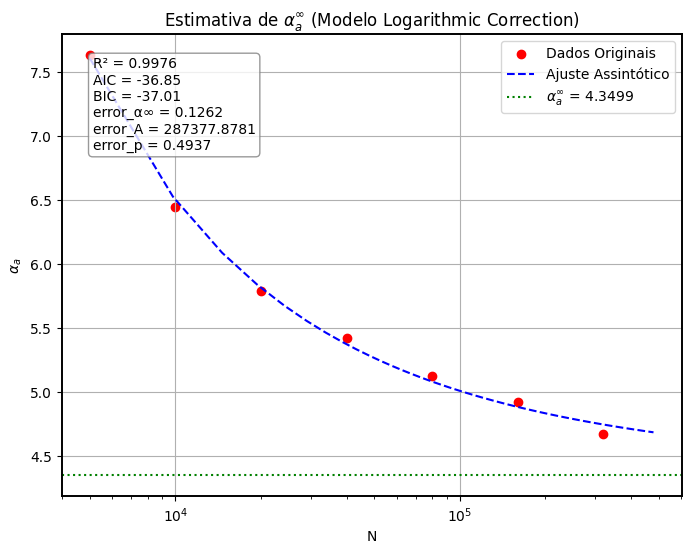

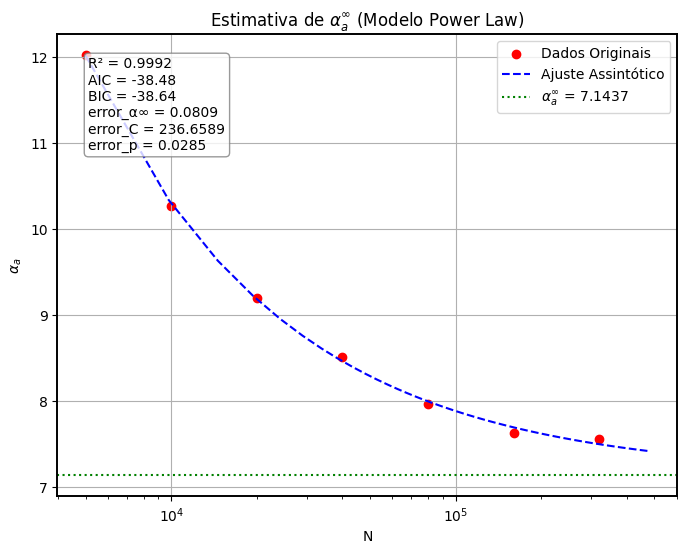

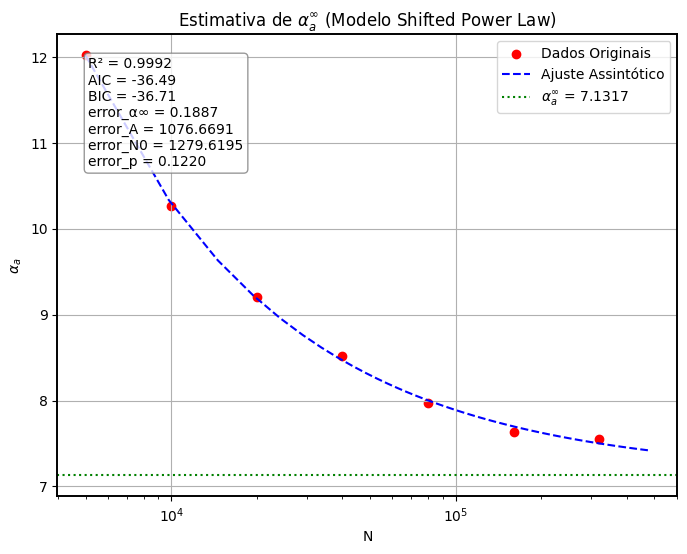

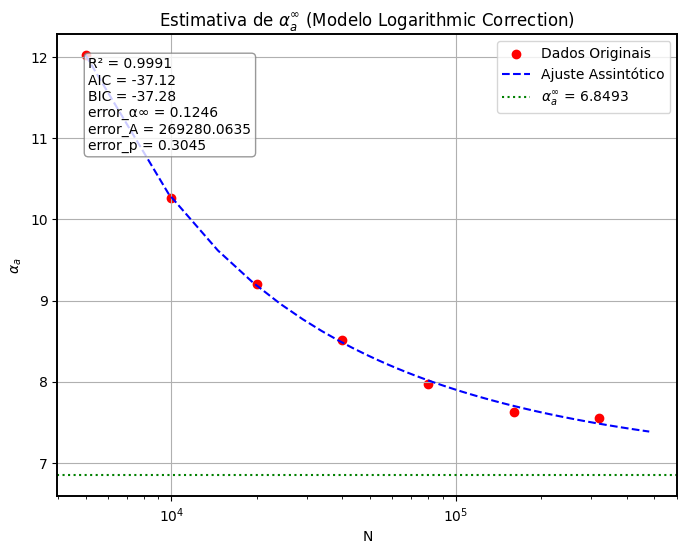

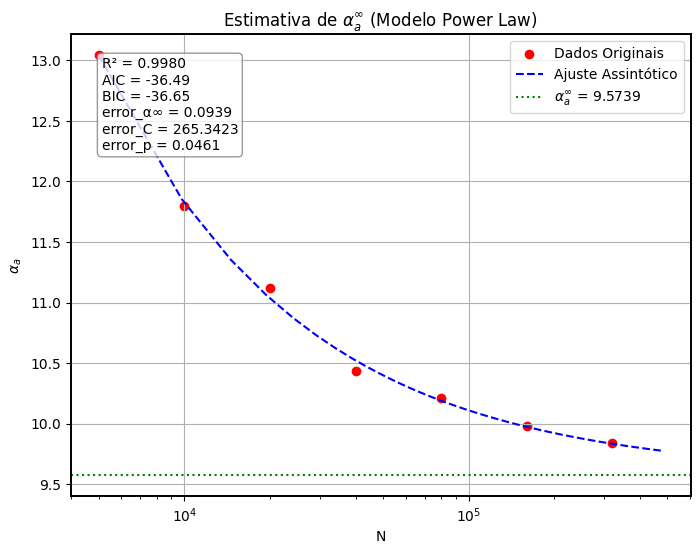

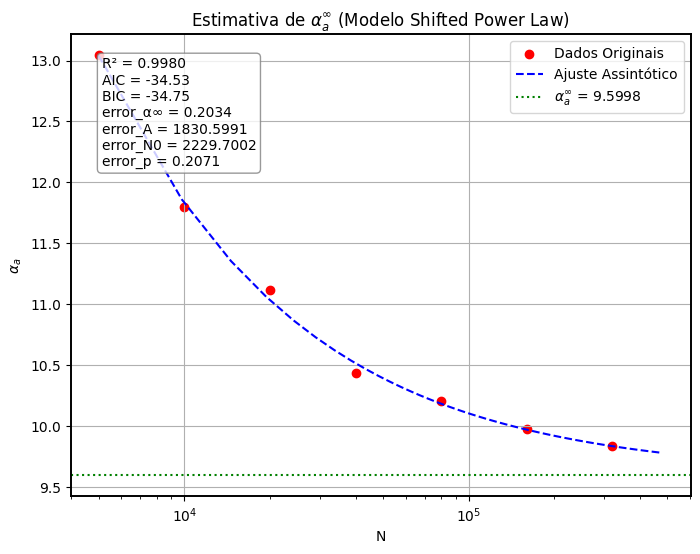

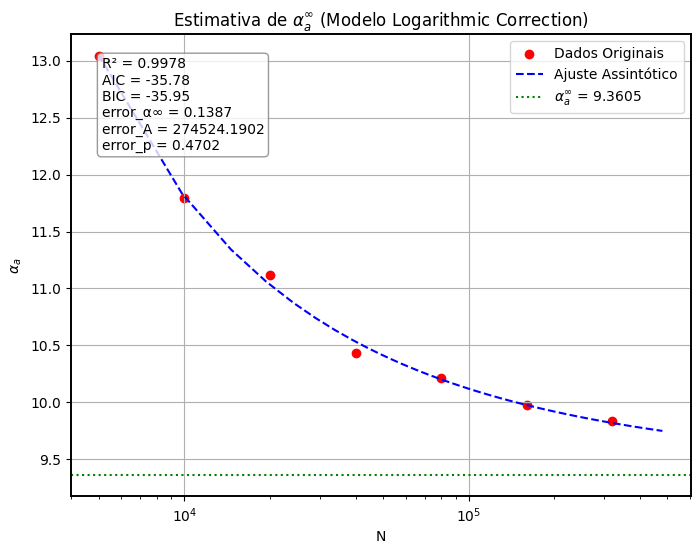

\begin{{table}}[h]
\centering
\caption{{Comparison of Models for Estimating $\alpha_a^\infty$}}
\begin{{tabular}}{{lccccccc}}
\hline
Dimension & Model & $\alpha_a^\infty \pm$ err & Parameter ($C$ or $A$) $\pm$ err & $p \pm$ err & $R^2$ & AIC & BIC \\
\hline
\multirow{3}{*}{1} & Power Law & 2.25 $\pm$ 0.04 & 200 $\pm$ 150 & 0.64 $\pm$ 0.09 & 0.9925 & -46.82 & -46.98 \\
 & Shifted Power Law & 2.31 $\pm$ 0.03 & 300000 $\pm$ 1900000 & 1.3 $\pm$ 0.7 & 0.9960 & -49.29 & -49.51 \\
 & Logarithmic Correction & 2.20 $\pm$ 0.07 & 100000 $\pm$ 190000 & 5.4 $\pm$ 1.0 & 0.9910 & -45.58 & -45.74 \\
\hline
\multirow{3}{*}{2} & Power Law & 4.53 $\pm$ 0.11 & 600 $\pm$ 300 & 0.63 $\pm$ 0.06 & 0.9965 & -34.31 & -34.47 \\
 & Shifted Power Law & 3.94 $\pm$ 0.29 & 39 $\pm$ 21 & 0.31 $\pm$ 0.07 & 0.9994 & -44.62 & -44.84 \\
 & Logarithmic Correction & 4.35 $\pm$ 0.13 & 280000 $\pm$ 290000 & 5.3 $\pm$ 0.5 & 0.9976 & -36.85 & -37.01 \\
\hline
\multirow{3}{*}{3} & Power Law & 7.14 $\pm$ 0.08 & 1010 $\pm$ 240 & 0

In [44]:
import math
import numpy as np
import matplotlib.pyplot as plt

def round_measurement(value, error):
    """
    Arredonda 'value' e 'error' com base no primeiro dígito não nulo do erro.
    Se error == 0, retorna as strings diretamente.
    Caso contrário, se o número de casas decimais calculado (decimals) for negativo,
    utiliza-se formato sem casas decimais; senão, usa o número de casas decimais determinado.
    """
    if error == 0:
        return f"{value}", f"{error}"
    order = math.floor(math.log10(abs(error)))
    first_digit = error / (10 ** order)
    # Se o primeiro dígito for menor que 3, usamos 2 algarismos significativos; caso contrário, 1.
    sig = 2 if first_digit < 3 else 1
    decimals = -order + (sig - 1)
    rounded_error = round(error, decimals)
    rounded_value = round(value, decimals)
    if decimals < 0:
        fmt = "{:.0f}"
    else:
        fmt = "{:." + str(decimals) + "f}"
    return fmt.format(rounded_value), fmt.format(rounded_error)

# Suponha que 'dim' seja uma lista com as dimensões e 'df_int' seja seu DataFrame.
# Exemplo:
# dim = [1, 2, 3, 4]
# df_int = pd.read_csv("your_data.csv")

# Inicializa a string da tabela LaTeX (duplique as chaves literais)
table_str = r"""\begin{{table}}[h]
\centering
\caption{{Comparison of Models for Estimating $\alpha_a^\infty$}}
\begin{{tabular}}{{lccccccc}}
\hline
Dimension & Model & $\alpha_a^\infty \pm$ err & Parameter ($C$ or $A$) $\pm$ err & $p \pm$ err & $R^2$ & AIC & BIC \\
\hline
"""

for d in dim:
    df_d = df_int[df_int["dim"] == d]
    alpha_a_values = df_d["alpha_intercept"].values
    N_values = df_d["N"].values

    # Chama as funções de ajuste (supondo que já estão definidas)
    res_power = estimate_alpha_a_infinity_power(N_values, alpha_a_values)
    res_shifted = estimate_alpha_a_infinity_shifted(N_values, alpha_a_values)
    res_log = estimate_alpha_a_infinity_log(N_values, alpha_a_values)

    # Desempacota os resultados para cada modelo
    (alpha_inf_power, C_power, p_power, error_alpha_inf_power, error_C_power, error_p_power,
     r_squared_power, AIC_power, BIC_power, _, _, _, _) = res_power

    (alpha_inf_shifted, A_shifted, N0_shifted, p_shifted, error_alpha_inf_shifted, error_A_shifted,
     error_N0_shifted, error_p_shifted, r_squared_shifted, AIC_shifted, BIC_shifted, _, _, _, _) = res_shifted

    (alpha_inf_log, A_log, p_log, error_alpha_inf_log, error_A_log, error_p_log,
     r_squared_log, AIC_log, BIC_log, _, _, _, _) = res_log

    # Aplica o arredondamento para cada modelo, obtendo strings formatadas
    alpha_inf_power_r, error_alpha_inf_power_r = round_measurement(alpha_inf_power, error_alpha_inf_power)
    C_power_r, error_C_power_r = round_measurement(C_power, error_C_power)
    p_power_r, error_p_power_r = round_measurement(p_power, error_p_power)

    alpha_inf_shifted_r, error_alpha_shifted_r = round_measurement(alpha_inf_shifted, error_alpha_inf_shifted)
    A_shifted_r, error_A_shifted_r = round_measurement(A_shifted, error_A_shifted)
    p_shifted_r, error_p_shifted_r = round_measurement(p_shifted, error_p_shifted)

    alpha_inf_log_r, error_alpha_log_r = round_measurement(alpha_inf_log, error_alpha_inf_log)
    A_log_r, error_A_log_r = round_measurement(A_log, error_A_log)
    p_log_r, error_p_log_r = round_measurement(p_log, error_p_log)

    # Monta a tabela para a dimensão d usando \multirow para agrupar as 3 linhas
    table_str += r"\multirow{{3}}{{*}}{{{dim}}} & Power Law & {alpha_inf_power_r} $\pm$ {error_alpha_inf_power_r} & {C_power_r} $\pm$ {error_C_power_r} & {p_power_r} $\pm$ {error_p_power_r} & {r_squared_power:.4f} & {AIC_power:.2f} & {BIC_power:.2f} \\".format(
        dim=d,
        alpha_inf_power_r=alpha_inf_power_r, error_alpha_inf_power_r=error_alpha_inf_power_r,
        C_power_r=C_power_r, error_C_power_r=error_C_power_r,
        p_power_r=p_power_r, error_p_power_r=error_p_power_r,
        r_squared_power=r_squared_power, AIC_power=AIC_power, BIC_power=BIC_power) + "\n"
    
    table_str += r" & Shifted Power Law & {alpha_inf_shifted_r} $\pm$ {error_alpha_shifted_r} & {A_shifted_r} $\pm$ {error_A_shifted_r} & {p_shifted_r} $\pm$ {error_p_shifted_r} & {r_squared_shifted:.4f} & {AIC_shifted:.2f} & {BIC_shifted:.2f} \\".format(
        alpha_inf_shifted_r=alpha_inf_shifted_r, error_alpha_shifted_r=error_alpha_shifted_r,
        A_shifted_r=A_shifted_r, error_A_shifted_r=error_A_shifted_r,
        p_shifted_r=p_shifted_r, error_p_shifted_r=error_p_shifted_r,
        r_squared_shifted=r_squared_shifted, AIC_shifted=AIC_shifted, BIC_shifted=BIC_shifted) + "\n"
    
    table_str += r" & Logarithmic Correction & {alpha_inf_log_r} $\pm$ {error_alpha_log_r} & {A_log_r} $\pm$ {error_A_log_r} & {p_log_r} $\pm$ {error_p_log_r} & {r_squared_log:.4f} & {AIC_log:.2f} & {BIC_log:.2f} \\".format(
        alpha_inf_log_r=alpha_inf_log_r, error_alpha_log_r=error_alpha_log_r,
        A_log_r=A_log_r, error_A_log_r=error_A_log_r,
        p_log_r=p_log_r, error_p_log_r=error_p_log_r,
        r_squared_log=r_squared_log, AIC_log=AIC_log, BIC_log=BIC_log) + "\n"
    
    table_str += r"\hline" + "\n"

table_str += r"\end{tabular}" + "\n" + r"\end{table}"

print(table_str)


In [45]:
import numpy as np
from scipy.optimize import curve_fit

def fit_models(x, y):
    """
    Ajusta três modelos aos dados x (N) e y (R_min), considerando que os valores de y são negativos.
    
    Modelos:
      1. Logarítmico modificado:
         R_min(N) = A + B * log(1 + N/C)
         (com a restrição de que C > 0 para evitar argumentos inválidos no logaritmo)
      
      2. Lei de potência com limite assintótico:
         R_min(N) = R_inf + (R0 - R_inf) * N^(-gamma)
      
      3. Modelo exponencial:
         R_min(N) = R_inf + (R0 - R_inf) * exp(-k * N)
    
    Retorna um dicionário contendo, para cada modelo:
      - 'params': os parâmetros ajustados,
      - 'errors': os erros dos parâmetros (raiz dos elementos diagonais da covariância),
      - 'R2': o coeficiente de determinação,
      - 'N_fit': valores densos de x para plotagem,
      - 'R_fit': valores do modelo ajustado para N_fit,
      - 'function': a função do modelo.
    """
    
    # Modelo 1: Logarítmico modificado
    def model1(N, A, B, C):
        return A + B * np.log(1 + N/C)
    
    # Modelo 2: Lei de potência com limite assintótico
    def model2(N, R_inf, R0, gamma):
        return R_inf + (R0 - R_inf) * N**(-gamma)
    
    # Modelo 3: Modelo exponencial
    def model3(N, R_inf, R0, k):
        return R_inf + (R0 - R_inf) * np.exp(-k * N)
    
    results = {}
    
    # Cria um vetor denso para plotagem da curva ajustada
    x_fit = np.linspace(np.min(x), np.max(x), 100)
    
    ### Modelo 1
    # Como os dados y são negativos, o palpite para A pode ser np.min(y) e para garantir que o argumento do log é válido, 
    # impomos C > 0 com bounds.
    p0_1 = [np.min(y), 0.1, np.median(x)]      # palpites iniciais para A, B, C
    bounds_1 = ([-np.inf, -np.inf, 1e-10], [np.inf, np.inf, np.inf])
    popt1, pcov1 = curve_fit(model1, x, y, p0=p0_1, bounds=bounds_1, maxfev=10000)
    perr1 = np.sqrt(np.diag(pcov1))
    y_fit1 = model1(x, *popt1)
    R2_1 = 1 - np.sum((y - y_fit1)**2) / np.sum((y - np.mean(y))**2)
    y_fit1_dense = model1(x_fit, *popt1)
    results['model1'] = {
        'params': popt1,
        'errors': perr1,
        'R2': R2_1,
        'N_fit': x_fit,
        'R_fit': y_fit1_dense,
        'function': model1
    }
    
    ### Modelo 2
    p0_2 = [np.min(y), np.max(y), 0.5]            # palpites iniciais para R_inf, R0, gamma
    popt2, pcov2 = curve_fit(model2, x, y, p0=p0_2, maxfev=10000)
    perr2 = np.sqrt(np.diag(pcov2))
    y_fit2 = model2(x, *popt2)
    R2_2 = 1 - np.sum((y - y_fit2)**2) / np.sum((y - np.mean(y))**2)
    y_fit2_dense = model2(x_fit, *popt2)
    results['model2'] = {
        'params': popt2,
        'errors': perr2,
        'R2': R2_2,
        'N_fit': x_fit,
        'R_fit': y_fit2_dense,
        'function': model2
    }
    
    ### Modelo 3
    p0_3 = [np.min(y), np.max(y), 1e-5]           # palpites iniciais para R_inf, R0, k
    popt3, pcov3 = curve_fit(model3, x, y, p0=p0_3, maxfev=10000)
    perr3 = np.sqrt(np.diag(pcov3))
    y_fit3 = model3(x, *popt3)
    R2_3 = 1 - np.sum((y - y_fit3)**2) / np.sum((y - np.mean(y))**2)
    y_fit3_dense = model3(x_fit, *popt3)
    results['model3'] = {
        'params': popt3,
        'errors': perr3,
        'R2': R2_3,
        'N_fit': x_fit,
        'R_fit': y_fit3_dense,
        'function': model3
    }
    
    return results


In [46]:
import numpy as np
from scipy.optimize import curve_fit

def fit_models(x, y):
    """
    Ajusta três modelos aos dados x (N) e y (R_min), considerando que os valores de y são negativos.
    
    Modelos:
      1. Logarítmico modificado:
         R_min(N) = A + B * log(1 + N/C)
         (com a restrição de que C > 0 para evitar argumentos inválidos no logaritmo)
      
      2. Lei de potência com limite assintótico:
         R_min(N) = R_inf + (R0 - R_inf) * N^(-gamma)
      
      3. Modelo exponencial:
         R_min(N) = R_inf + (R0 - R_inf) * exp(-k * N)
    
    Retorna um dicionário contendo, para cada modelo:
      - 'params': os parâmetros ajustados,
      - 'errors': os erros dos parâmetros (raiz dos elementos diagonais da covariância),
      - 'R2': o coeficiente de determinação,
      - 'N_fit': valores densos de x para plotagem,
      - 'R_fit': valores do modelo ajustado para N_fit,
      - 'function': a função do modelo.
    """
    
    # Modelo 1: Logarítmico modificado
    def model1(N, A, B, C):
        return A + B * np.log(1 + N/C)
    
    # Modelo 2: Lei de potência com limite assintótico
    def model2(N, R_inf, R0, gamma):
        return R_inf + (R0 - R_inf) * N**(-gamma)
    
    # Modelo 3: Modelo exponencial
    def model3(N, R_inf, R0, k):
        return R_inf + (R0 - R_inf) * np.exp(-k * N)
    
    results = {}
    
    # Cria um vetor denso para plotagem da curva ajustada
    x_fit = np.linspace(np.min(x), np.max(x), 100)
    
    ### Modelo 1
    # Como os dados y são negativos, o palpite para A pode ser np.min(y) e para garantir que o argumento do log é válido, 
    # impomos C > 0 com bounds.
    p0_1 = [np.min(y), 0.1, np.median(x)]      # palpites iniciais para A, B, C
    bounds_1 = ([-np.inf, -np.inf, 1e-10], [np.inf, np.inf, np.inf])
    popt1, pcov1 = curve_fit(model1, x, y, p0=p0_1, bounds=bounds_1, maxfev=10000)
    perr1 = np.sqrt(np.diag(pcov1))
    y_fit1 = model1(x, *popt1)
    R2_1 = 1 - np.sum((y - y_fit1)**2) / np.sum((y - np.mean(y))**2)
    y_fit1_dense = model1(x_fit, *popt1)
    results['model1'] = {
        'params': popt1,
        'errors': perr1,
        'R2': R2_1,
        'N_fit': x_fit,
        'R_fit': y_fit1_dense,
        'function': model1
    }
    
    ### Modelo 2
    p0_2 = [np.min(y), np.max(y), 0.5]            # palpites iniciais para R_inf, R0, gamma
    popt2, pcov2 = curve_fit(model2, x, y, p0=p0_2, maxfev=10000)
    perr2 = np.sqrt(np.diag(pcov2))
    y_fit2 = model2(x, *popt2)
    R2_2 = 1 - np.sum((y - y_fit2)**2) / np.sum((y - np.mean(y))**2)
    y_fit2_dense = model2(x_fit, *popt2)
    results['model2'] = {
        'params': popt2,
        'errors': perr2,
        'R2': R2_2,
        'N_fit': x_fit,
        'R_fit': y_fit2_dense,
        'function': model2
    }
    
    ### Modelo 3
    p0_3 = [np.min(y), np.max(y), 1e-5]           # palpites iniciais para R_inf, R0, k
    popt3, pcov3 = curve_fit(model3, x, y, p0=p0_3, maxfev=10000)
    perr3 = np.sqrt(np.diag(pcov3))
    y_fit3 = model3(x, *popt3)
    R2_3 = 1 - np.sum((y - y_fit3)**2) / np.sum((y - np.mean(y))**2)
    y_fit3_dense = model3(x_fit, *popt3)
    results['model3'] = {
        'params': popt3,
        'errors': perr3,
        'R2': R2_3,
        'N_fit': x_fit,
        'R_fit': y_fit3_dense,
        'function': model3
    }
    
    return results


In [47]:
dimensions = [1, 2, 3, 4]
df_d = df_min[df_min["dim"]==dimensions[0]]
N, R_min = df_d["N"].values, df_d["R_min"].values

resultados = fit_models(N, R_min)

In [48]:
params = resultados['model1']['params']
errors = resultados['model1']['errors']
R2 = resultados['model1']['R2']

print("Modelo 1 - Logarítmico modificado:")
for i, (param, err) in enumerate(zip(params, errors)):
    err_pct = (err / abs(param)) * 100 if param != 0 else float('nan')
    print(f"Parâmetro {i+1}: {param:.4f} ± {err:.4f} ({err_pct:.2f}%)")
print("R²:", R2)


Modelo 1 - Logarítmico modificado:
Parâmetro 1: -0.2840 ± 9741.1230 (3429667.26%)
Parâmetro 2: 0.0138 ± 0.0022 (16.00%)
Parâmetro 3: 0.0047 ± 3342.5151 (70409474.92%)
R²: 0.9769774178420652


In [49]:
params = resultados['model2']['params']
errors = resultados['model2']['errors']
R2 = resultados['model2']['R2']

print("Modelo 2 - Lei de potência com limite assintótico:")
for i, (param, err) in enumerate(zip(params, errors)):
    err_pct = (err / abs(param)) * 100 if param != 0 else float('nan')
    print(f"Parâmetro {i+1}: {param:.4f} ± {err:.4f} ({err_pct:.2f}%)")
print("R²:", R2)


Modelo 2 - Lei de potência com limite assintótico:
Parâmetro 1: -0.0078 ± 0.0053 (67.98%)
Parâmetro 2: -0.7898 ± 0.1284 (16.26%)
Parâmetro 3: 0.2554 ± 0.0249 (9.74%)
R²: 0.9991768018241581


In [50]:
params = resultados['model3']['params']
errors = resultados['model3']['errors']
R2 = resultados['model3']['R2']

print("Modelo 3 - Modelo exponencial:")
for i, (param, err) in enumerate(zip(params, errors)):
    err_pct = (err / abs(param)) * 100 if param != 0 else float('nan')
    print(f"Parâmetro {i+1}: {param:.8f} ± {err:.8f} ({err_pct:.2f}%)")
print("R²:", R2)


Modelo 3 - Modelo exponencial:
Parâmetro 1: -0.04297418 ± 0.00325232 (7.57%)
Parâmetro 2: -0.10164039 ± 0.00606303 (5.97%)
Parâmetro 3: 0.00003274 ± 0.00000860 (26.26%)
R²: 0.9659162791899004


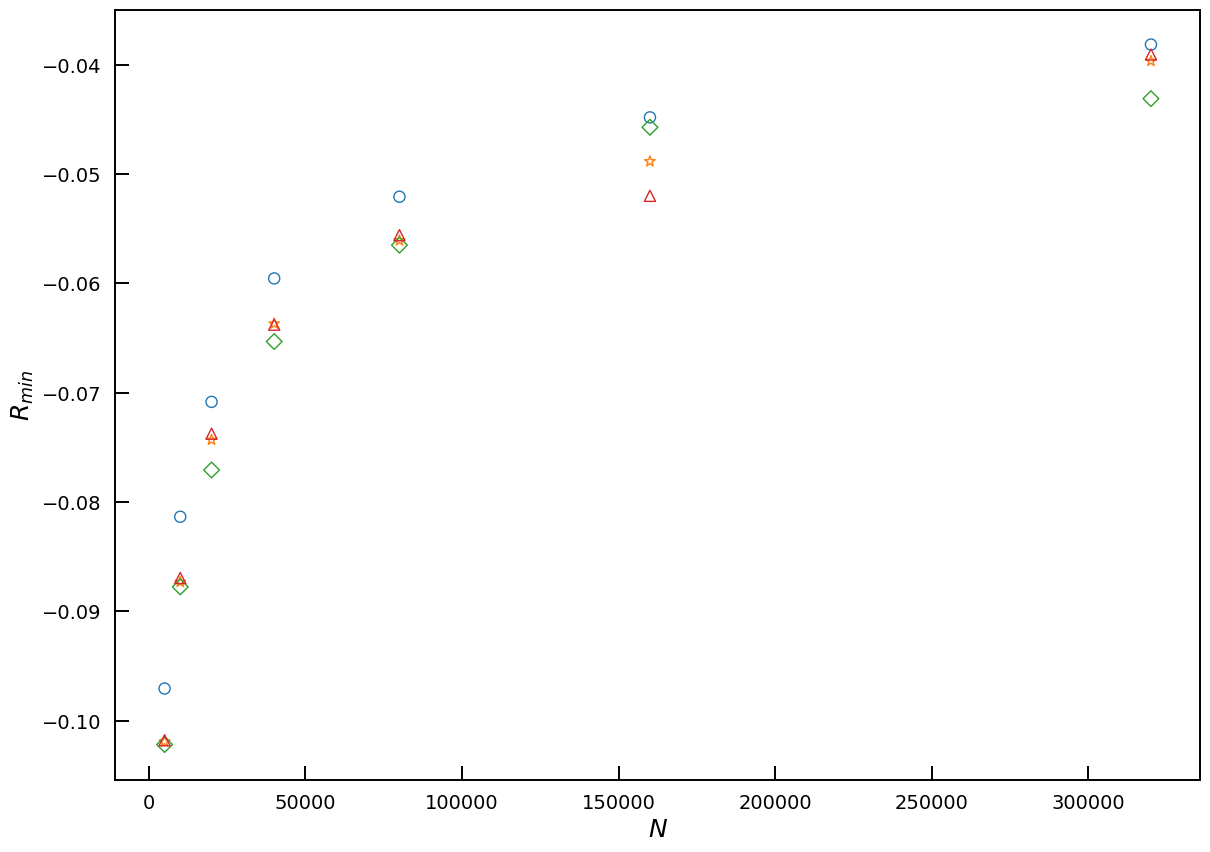

In [51]:
fig, ax = plt.subplots(figsize=(14, 10))
labels = [f"N = {n}" for n in N]
markersize = 8
dimensions = [1, 2, 3, 4]
markers = ["o", "*", "D", "^"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

for i in range(len(dimensions)):
    df_d = df_min[df_min["dim"]==dimensions[i]]
    ax.scatter(df_d["N"], df_d["R_min"], marker=markers[i],
            label=labels[i], s=markersize**2, facecolors='none', edgecolors=colors[i])

ax.set_xlabel(r"$N$", size=18)
ax.set_ylabel(r"$R_{min}$", size=18)
ax.tick_params('both', width=1.4, length=10, labelsize=14, direction='in', pad=10)
#ax.set_xscale("log")
plt.savefig("olhe.pdf")
plt.show()

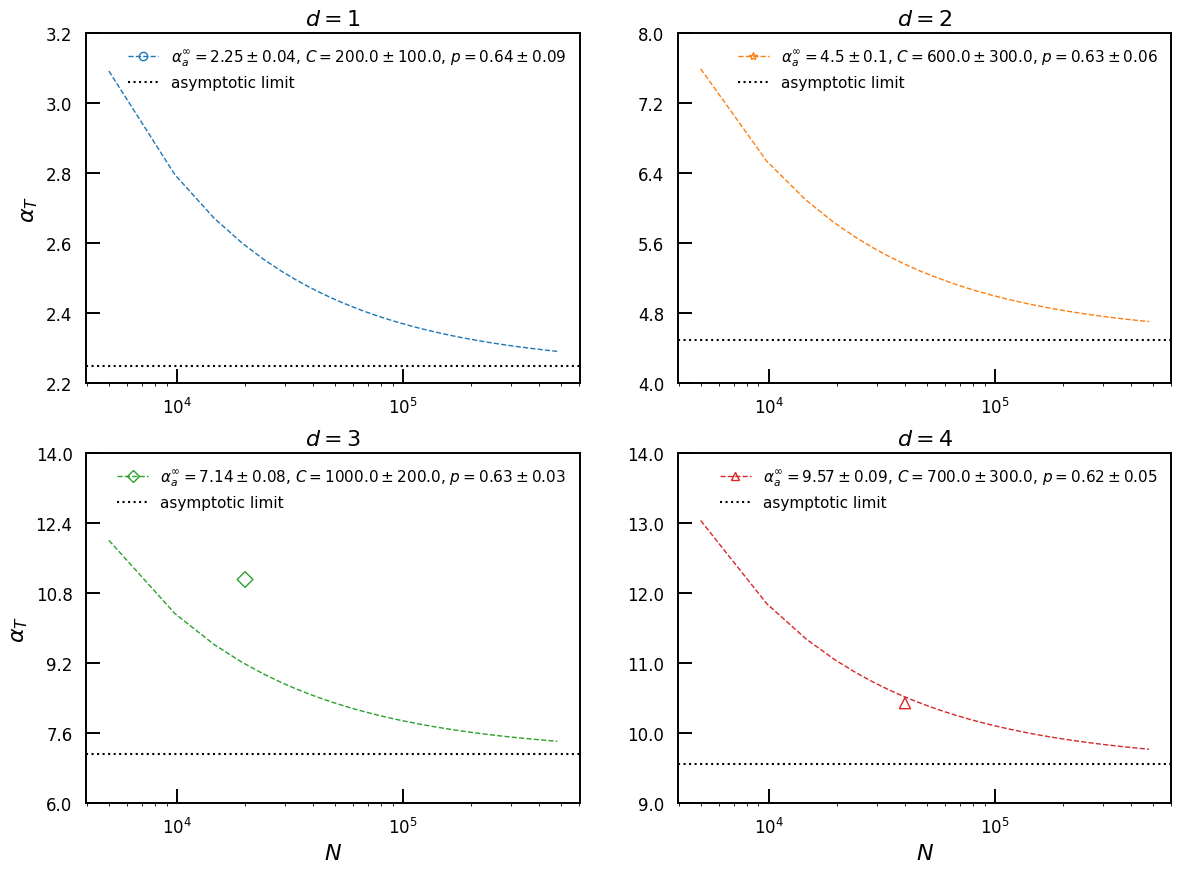

In [52]:
from matplotlib.lines import Line2D
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Facilita o acesso aos subplots com índice linear

labels = [f"N = {n}" for n in N]
markersize = 8
dimensions = [1, 2, 3, 4]
markers = ["o", "*", "D", "^"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Define os limites do eixo y para cada subplot
y_limits = [[2.2, 3.2], [4.0, 8.0], [6.0, 14.0], [9.0, 14.0]]

for i, ax in enumerate(axes):
    
    # Ordena os dados para o ajuste
    idx = np.argsort(N_FIT[i])
    N_fit_sorted = np.array(N_FIT[i]).flatten()[idx.flatten()]
    alpha_fit_sorted = np.array(ALPHA_FIT[i]).flatten()[idx.flatten()]
    
    # Plota a curva de ajuste
    ax.plot(N_fit_sorted, alpha_fit_sorted, '--', linewidth=1.0, color=colors[i])
    # Plota os pontos
    ax.scatter(N_values[i], alpha_a_values[i], marker=markers[i],
               label=labels[i], s=markersize**2, facecolors='none', edgecolors=colors[i])
    # Plota a linha horizontal representando alpha_a infinito
    ax.axhline(y=dfll['alpha_a_infinity'][i], color='#000000', linestyle=":",
               label="asymptotic limit")
    
    ax.set_xscale("log")
    ax.set_ylim(y_limits[i])
    
    # Define 6 ticks igualmente espaçados no eixo y
    ticks_y = np.linspace(y_limits[i][0], y_limits[i][1], 6)
    ax.set_yticks(ticks_y)
    # Formata os rótulos dos ticks do eixo y para terem 1 casa decimal
    ax.set_yticklabels([f"{tick:.1f}" for tick in ticks_y])
    
    # Cria a legenda especial combinando os símbolos
    df_d = dfll[dfll["dim"] == dimensions[i]]
    # Extraímos os valores (assumindo que há um único valor por dimensão)
    a_inf, err_a_inf = df_d["alpha_a_infinity"].values, df_d["erro_alpha_a"].values
    C, err_C = df_d["C"].values, df_d["erro_C"].values
    p, err_p = df_d["p"].values, df_d["erro_p"].values
    
    special_label = (f"$\\alpha_a^\\infty = {a_inf[0]} \\pm {err_a_inf[0]}$, "
                     f"$C = {C[0]} \\pm {err_C[0]}$, "
                     f"$p = {p[0]} \\pm {err_p[0]}$")
    
    # Cria um handle combinando marker e linha de ajuste para a legenda especial
    special_handle = Line2D([0], [0], marker=markers[i], color=colors[i],
                            linestyle='--', linewidth=1.0, markerfacecolor='none',
                            label=special_label)
    
    # Cria um handle para a linha horizontal
    axh_line_handle = Line2D([0], [0], color='#000000', linestyle=":", label="asymptotic limit")
    
    ax.tick_params('both', width=1.4, length=10, labelsize=12, direction='in', pad=10)
    ax.set_title(f"$d = {dimensions[i]}$", size=16)
    
    # Adiciona label no eixo x para os subplots da linha inferior
    if i in [2, 3]:
        ax.set_xlabel(r"$N$", size=16)
    # Adiciona label no eixo y para os subplots da coluna da esquerda
    if i in [0, 2]:
        ax.set_ylabel(r"$\alpha_T$", size=16)
    
    # Define a legenda combinando os handles do special_handle e do axhline
    ax.legend(handles=[special_handle, axh_line_handle], fontsize=11, fancybox=True, framealpha=0.0)
plt.savefig("../../results/alpha_a/R_transition_N.pdf", dpi=300)
plt.show()
